# **Аналитическое исследование по датасету: "final_task: 4500 компьютеров".**

![](https://image.jimcdn.com/app/cms/image/transf/dimension=234x10000:format=png/path/s0440d365de3931cb/image/ieda5e5eee5b07281/version/1486308413/image.png)


## Описание датасета и задания

Кейс.

Клиент занимается сборкой и продажей персональных компьютеров (за исключением мини-ПК и моноблоков). В связи с ростом популярности интернет-магазинов, таких как Wildberries, Ozon, OnlineTrade и т. п., за последние несколько лет, а также с целью привлечения большего числа клиентов при одновременном снижении затрат на содержание собственного магазина, доставку и рекламу товаров он планирует выйти на онлайн-рынок. В связи с этим клиент хотел бы узнать, от чего зависит цена, а также популярность персональных компьютеров, выкладываемых на онлайн-площадках, чтобы в дальнейшем планировать к сборке востребованные по техническим характеристикам компьютеры и продавать их по конкурентной цене.

Специалистом по сбору данных был выгружен файл в формате csv с одного из популярных онлайн-магазинов, содержащий информацию о товарах категории «Компьютеры и моноблоки» размерностью 4500 строк.


***Информация, содержащаяся в датасете:***
1.   Идентификационный номер товара (product_id).
2.   Наименование товара (title).
3.   Цена товара (price)   
4.   Количество продаж (sales).
5.   Отзывы о товаре (feedback).
6.   Продавец (seller).
7.   Рейтинг продавца (seller_rating).
8.   Характеристика процессора (Процессор).
9.   Тип и объем оперативной памяти (Оперативная память).
10.  Типе и объем жесткого диска (Жесткий диск).
11.  Наименование видеокарточки (Видеопроцессор).
12.  Наименование операционной системы (Операционная система).
13.  Продолжительность гарантийного срока (Гарантийный срок).
14.  Страна производства товара (Страна производства)

***Задача:***
Проанализировать полученные данные и представить аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения своих бизнес-задач.

**В части 1 задания необходимо:**
1.   Выполнить чистку и предобработку данных в целом по датасету.
2.   Выполнить чистку и предобработку данных в разрезе признаков.
**В части 2 задания необходимо:**
1.   Выполнить неграфический и графический анализ количественных признаков.
2.   Выполнить неграфический и графический анализ категориальных признаков.
3.   Выполнить анализ взаимосвязи двух количественных признаков.
4.   Выполнить анализ взаимосвязи двух категориальных признаков.
5.   Выполнить анализ взаимосвязи количественного и категориального признаков.
**В части 3 задания необходимо:**
1.   Выполнить предварительную обработку данных (построение гистограмм, описательные статистики, проверка нормальности по критерию Шапиро-Уилка).
2.   Выполнить анализ сравнения групп.
3.   Выполнить корреляционный анализ

## 1. Часть 1. Оценка размеров датасета, проверка на дубликаты, чистка и предобработка данных, выбор признаков для анализа.

### 1.1 Загрузка библиотек. Подгрузка данных в питон и начало работы с ними

Импорт необходимых библиотек

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm

pd.options.display.max_rows = 8

Подгрузка датасета с GoogleDisc

In [ ]:
#https://drive.google.com/file/d/1pn0E69BNCMRoXBL4OvgDmw9d4P3bw7GX/view?usp=drive_link
!gdown --id 1pn0E69BNCMRoXBL4OvgDmw9d4P3bw7GX

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1pn0E69BNCMRoXBL4OvgDmw9d4P3bw7GX
To: /content/final_task.csv
100% 3.97M/3.97M [00:00<00:00, 96.7MB/s]


#### *1.1.1 Общая предобработка датасета*

Открытие датасета final_task.csv и сохранение его в переменную dataset

In [ ]:
dataset = pd.read_csv("final_task.csv")

Обзор таблицы с помощью метода head()

In [ ]:
dataset.head(3)

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."


Оценка размеров датасета с помощью атрибута shape

In [ ]:
dataset.shape

(4500, 16)

Информация о датасете с помощью метода info()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

Проверка датасета на наличие дубликатов с помощью метода duplicated()

In [ ]:
dataset.duplicated().sum()

490

In [ ]:
dataset[dataset.duplicated()][:3]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
6,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,Купили более 40 раз,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
13,19877489,Игровой Компьютер Robotcomp ТУ 160 V2,98470₽,Купили более 5 раз,6 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
18,19882754,Игровой Компьютер Robotcomp M1620 V3,71829₽,Купили более 50 раз,25 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


Проверка на наличие полных дубликатов строк в датасете

In [ ]:
index_list = [5,6,12,13,17,18]
dataset.loc[index_list]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
5,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,Купили более 40 раз,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
6,19355097,Игровой Компьютер Robotcomp M-16 V1,55625₽,Купили более 40 раз,12 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
12,19877489,Игровой Компьютер Robotcomp ТУ 160 V2,98470₽,Купили более 5 раз,6 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
13,19877489,Игровой Компьютер Robotcomp ТУ 160 V2,98470₽,Купили более 5 раз,6 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
17,19882754,Игровой Компьютер Robotcomp M1620 V3,71829₽,Купили более 50 раз,25 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
18,19882754,Игровой Компьютер Robotcomp M1620 V3,71829₽,Купили более 50 раз,25 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


Проверка признака на наличие дубликатов с помощью метода duplicated()

In [ ]:
dataset['product_id'].duplicated().sum()

490

Удаление дубликатов методом drop_duplicates()

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

Учитывая, что всего строк в датасете значилось 4500, из низ дубликатов - 490, уникальных значений должно остаться 4010. Осуществим проверку признака на наличие уникальных значений с помощью метода unigue().

In [ ]:
len(dataset['product_id'].unique())

4010

Для целей последующего анализа не потребуются столбцы датасета с указанием габаритов товара. Кроме того, не являются техническими характеристиками такми признаки как: "Страна производства", "Гарантийный срок", "Операционная система". Указанные признаки содержатся в 5-х последних столбцах. С целью их удаления проще воспользоваться срезом. Оставим 11 необходимых столбцов и удалим 5 последних столбцов из датасета.

In [ ]:
ds_col = dataset.columns[:11]
dataset = dataset[ds_col]
dataset[:3]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено


Проверка наличия в датасете пустых строк с помощью метода isna()

In [ ]:
dataset.isna().sum()

product_id               0
title                    0
price                    1
sales                 2975
                      ... 
Процессор                0
Оперативная память       0
Жесткий диск             0
Видеопроцессор           0
Length: 11, dtype: int64

Проверка пустых значений в графе "sales"

In [ ]:
dataset[dataset['sales'].isna()][:3]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено
81,36404916,Игровой компьютер Robotcomp M16 2.0 Magic Red ...,79385₽,NaN,0 отзывов,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core 12400F', 'Количе...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050


Наличие пустых значений в столбцах с текстовой информацией не окажет влияние на последующие расчеты и может не приниматься во внимание. Однако, наличие пустых значений в столбце "sales" свидетельствует об отсутствии продаж компьютеров в данной комплектации. Также, в столбце "price" в одной строке отсутствует информация о цене, что не позволит провести расчет. Следовательно, пустые строки в графах "sales", "price" не несут информации и подлежат удалению  без ущерба для дальнейшего анализа (применяется метод dropna()).

In [ ]:
dataset.dropna(subset=['sales', 'price'], inplace=True)
dataset.isna().sum()

<ipython-input-780-c6470266604c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['sales', 'price'], inplace=True)


product_id            0
title                 0
price                 0
sales                 0
                     ..
Процессор             0
Оперативная память    0
Жесткий диск          0
Видеопроцессор        0
Length: 11, dtype: int64

После удаления строк нарушена последовательность индекса, поэтому следует назначить новый индексный столбец датафрейма, используя метод reset_index()

In [ ]:
dataset.reset_index(drop=True, inplace=True)
dataset.index

RangeIndex(start=0, stop=1034, step=1)

#### *Выводы по блоку*
1.  Датасет содержит 16 признаков и 4500 наблюдений.
2.  В датасете присутствуют 490 строк-дубликатов, подлежащих исключению.
3.  Для целей последующего анализа не потребуются столбцы датасета с указанием габаритов товара. Кроме того, не являются техническими характеристиками такие признаки как: "Страна производства", "Гарантийный срок", "Операционная система", которые также подлежат исключению из датасета.
4.  Наличие пустых значений в столбце "sales" в количестве 2975 наблюдений свидетельствует об отсутствии продаж компьютеров в данной комплектации. Также, в столбце "price" в одной строке отсутствует информация о цене, что не позволит провести расчет. Следовательно, пустые строки в графах "sales", "price" не несут информации и подлежат удалению без ущерба для дальнейшего анализа.




#### *1.1.2 Наименование товара*

Обработка признака наименование товара ("title").

Клиент занимается сборкой и продажей персональных компьютеров (за исключением мини-ПК и моноблоков). Таким образом, с целью корректного выполнения кейса необходимо исключить из датасета наблюдения, не относящиеся к компьютерам.

In [ ]:
dataset[~dataset['title'].str.contains('компьютер', case=False, regex=True)]['title'].unique()

array(['Системный блок OFFICE 120 WB 0710623 J1800/4Gb/2Tb+SSD120Gb/300W/DOS',
       'Мощный ПК Robotcomp Анаконда 2.0 V2',
       'Мощный ПК Robotcomp Анаконда 2.0 V3',
       'Мини-ПК (неттоп)/ Beelink GK mini/ 8Гб/256Гб/ Windows 10',
       'Кабель для интернета 3м, 20 м патч корд 3м, 20 м',
       'Десктоп Acer Veriton EN2580 Intel Core i3-1115G4, 8Gb, SSD 256Gb, CR,KB,M,Black,no OS(DT.VV4ER.006)',
       'Мини ПК 4k Beelink GK Mini 8/256 G',
       'Патч корд - сетевой кабель для интернета',
       'Карта памяти microSD 8 Гб с USB картридером',
       'LAN кабель для  интернета cat5e RJ45 1Гбит/ патч корд серый',
       'LAN кабель для  интернета cat5e RJ45/витая пара 1,5 м',
       'Увлажняющий крем для лица с гиалур',
       'Игровой Системный блок в сборе с RX 580 на 8GB',
       'Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120',
       'Basic10WO.AMD E1.DDR3 8Гб.SSD120Гб+HDD1000Гб/Windows7+офис',
       ' Wi-fi USB-адаптер Разъём Переходник',
       "моноблок PRITTEC Платфор

In [ ]:
dataset[~dataset['title'].str.contains('компьютер', case=False, regex=True)]['title'].nunique()

168

Из полученных 168 строк исключаются наблюдения в количестве 69 строк, относящиеся к компьютерам (например "Игровой ПК").

In [ ]:
list_del_name_from_title = ['Мини-ПК (неттоп)/ Beelink GK mini/ 8Гб/256Гб/ Windows 10', 'Кабель для интернета 3м, 20 м патч корд 3м, 20 м', 'Мини ПК 4k Beelink GK Mini 8/256 G', 'Патч корд - сетевой кабель для интернета', 'Карта памяти microSD 8 Гб с USB картридером', 'LAN кабель для  интернета cat5e RJ45 1Гбит/ патч корд серый', 'LAN кабель для  интернета cat5e RJ45/витая пара 1,5 м', 'Увлажняющий крем для лица с гиалур', 'Игровой Системный блок в сборе с RX 580 на 8GB', 'Chip computers Basic4, AMD E1, DDR3 4Гб, SSD 120', 'Basic10WO.AMD E1.DDR3 8Гб.SSD120Гб+HDD1000Гб/Windows7+офис', ' Wi-fi USB-адаптер Разъём Переходник', "моноблок PRITTEC Платформа моноблока Prittec H24-TH410 23.8'' FHD1920x1080Supported Intel CometLake", 'Рамка крепления кулера AM2,AM3,AM3+,FM1,FM2', 'Рамка крепления кулера AM4', 'Подставка для системного блока/подставка под системный блок', 'Батарейка CMOS CR2032 с коннектором', 'Термопаста GD900, 15 грамм (термопаста для процессора)', 'Type-c HUB 8-1, хаб, Mac и Windows, USB 3.1, rj45', 'Адаптер для установки SSD M.2 (NVMe) в слот PCI-E', 'Splitter 4-pin сплиттер для кулеров 12В, 1-10-molex', 'Серверный процессор Xeon 2689 2011', ' Процессор XEON 2650 v2 2011', 'Материнская плата GAMING X79-2011-DDR3', 'Неттоп Beelink GK mini 8/256Gb Win10', 'синхронизатор блоков питания ( двух )', 'Мини ПК 4k Beelink GK Mini 8/256 G, 2 HDMI', 'Эмулятор монитора (виртуальный дисплей) для майнинга HDMI-4K UHD Silver', 'Пылевой фильтр для кулера вентилятора 120 мм', 'Bitmain AntMiner S9i  14-14.5 Th/s ', 'Асик Avalon 821 10.5-11.5 Th/s 2018 год Asic/ Miner/ Antminer/ Mining', 'Асик Bitmain Antminer S9 БУ 13-14 TH/s 2018 год', 'Мини ПК Beelink T4 Pro 4/64Гб', 'Игровая мышь, Мышь беспроводная DRAGON-BLACK, черный', ' i7/GТХ-1060/16GB/SSD-512/Монитор-24"', 'Intel 4 ядра/GT-730/4GB/SSD-256/Монитор-19"', 'LAN кабель для подключения интернета  патч корд серый', 'LAN кабель для подключения интернета патч корд ', 'Комплект сильно охлаждающих 3-х радиаторов для Raspberry PI', 'Блок питания 5V, 3A, Micro USB для Raspberry PI 3 и PI 2', 'Алюминиевый корпус с двойными вентиляторами Raspberry Pi 4B', 'Intel 4 ядра/GT-640/4GB/SSD-128/Монитор-19"', 'Батарейка BIOS CMOS CR2016 с коннектором', " Intel 8 ядер/GTX-660/8GB/SSD-128/HDD-500/Монитор-22'", 'Блок питания 2000W для майнинга. майнинг ферма !', 'Мини ПК Beelink T4 PRO 4/64 GB', 'Штекер питания 5,5 х 2,5 х 10 мм ', 'Блок питания 12вольт 2 ампер Сетевой блок', 'Стандарт', 'POS моноблок сенсорный с плоским экраном', 'Мини ПК HP t5740w Intel N280 Windows', 'HP ProDesk 400 G5 DM', 'Мини ПК Beelink GK35', 'Мини ПК Beelink GK mini 8/128Gb', 'Мини ПК Beelink GK Mini 8/256Gb', 'POS-терминал Poscenter Wise', 'POS система RS609 сенсорный моноблок', 'Мини ПК Beelink Mini S 8/128 Gb', 'Мини ПК Beelink Mini S 8/256 Gb', 'POS-моноблок МойPOS MMB-2119 X 3160 без подставки', 'Мини ПК Wintel PRO Z8350 2/32Gb', 'ПК IRU Office 310H5SM MT', 'ПК IRU Game 510H5GM MT', 'ПК IRU Game 510B5GMA', 'Оперативная память Crucial 8GB DDR4 DIMM CT8G4DFRA266', 'Геймпад ZET GAMING Ardor разноцветный', 'Мини ПК Azerty AZ-0008 (Intel i7 2x2.9GHz, 8Gb, 256Gb SSD)', 'Органайзер держатель для проводов на скотче 5 ячеек', 'Органайзер держатель для проводов на скотче 2 ячейки', 'флэшкарта 32gb', "intel 4/GT-440/4GB/SSD-128/Монитор-19'", 'Мини ПК Wintel PRO Z8350 4/64Gb', 'оперативная память Transcend 8 ГБ DDR4 ', 'HeroBox', 'Larkbox Pro', 'Воздуходувка портативная беспроводная', 'Мини-ПК, Beelink U59 Pro, 16/512 Гб', 'Мини ПК Beelink Mini S 8/128Гб для дома, для офиса', 'Мини ПК Beelink Mini S 8/256Гб для дома, для офиса', 'Мини ПК Beelink U59 Pro 8/512Гб', 'Мини ПК Pegatron SAISHIAT2 Celeron J1800', 'Мини ПК Intel Celeron N5095 JK01 8+128Gb', 'M119', 'Игровой ПК', 'Azerty AZ-0101/i5-12400F/1Tb SSD NVMe/32 Gb/RTX3070 8Gb', 'Подставка под системный блок из массива сосны', 'Сенсорный терминал PayTor Libra-150, 15”', 'Временно недоступен', 'Блок питания 12 Вольт 5 Ампер ', 'Игровой системный блок I5-3470/8GB/240GB/GTX 1660 SUPER 6GB', 'Игровой системный блок I5-3470/16GB/500GB/GTX 1660 SUPER 6GB', 'Игровой системный блок I3-12100F/16GB/SSD 500GB/RTX 3060', 'Игровой системный блок I5-3470/16GB/240GB/GTX 1660 TI 6GB', 'Игровой системный блок I7-3770/16GB/500GB/RTX 3050 8GB', 'Игровой системный блок I7-4770/16GB/1000GB/RTX 3060', 'Игровой системный блок i7-4770/8GB/240GB/RTX 3060', 'Игровой системный блок I5-10400F/32GB/1000GB/RTX 3060', 'Блок питания 12v2a', 'Микрокомпьютер Orange Pi 3 LTS RAM 2G EMMC 8G с HDMI + WIFI']
len(list_del_name_from_title)

99

Фильтрация датасета списком наблюдений, которые подлежат исключению из датасета по условию кейса.

In [ ]:
dataset = dataset[~dataset['title'].isin(list_del_name_from_title)]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 1033
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          896 non-null    int64  
 1   title               896 non-null    object 
 2   price               896 non-null    object 
 3   sales               896 non-null    object 
 4   feedbacks           896 non-null    object 
 5   seller              844 non-null    object 
 6   seller_rating       844 non-null    float64
 7   Процессор           896 non-null    object 
 8   Оперативная память  896 non-null    object 
 9   Жесткий диск        896 non-null    object 
 10  Видеопроцессор      896 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 84.0+ KB


Сброс индекса после удаления ненужных наблюдений и восстановление его последовательных значений.

In [ ]:
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
#dataset.drop_duplicates(inplace=True)
#dataset.duplicated().sum()

#### *Выводы по блоку*
1.  C целью корректного выполнения кейса исключены из датасета наблюдения в количестве 99 строк, не относящиеся к компьютерам.
2.  Выполнен сброс индекса после удаления ненужных наблюдений и восстановление его последовательных значений.


#### *1.1.3 Цена*

Обработка признака цена ("price"): Исключаются символы "₽".

In [ ]:
dataset['price'] = dataset['price'].replace('\₽','', regex=True).astype(int)
dataset['price'][:3]

0    10805
1    39237
2    76188
Name: price, dtype: int64

In [ ]:
dataset.duplicated().sum()

0

#### *Выводы по блоку*
1.  C целью корректного выполнения последующих расчетов осуществлена обработка признака цена ("price"): Исключены символы "₽" с приведением значений к типу "int".



#### *1.1.4 Продажи*

Обработка признака количество продаж ("sales"): Получение цифрового значения из столбца "sales" путем исключения строковых символов.

In [ ]:
def clear_sales(sales):
  return sales.split()[2]

In [ ]:
dataset['num_sales'] = dataset['sales'].apply(clear_sales)

С целью последующих расчетов приведем значение признака "num_sales" к типу "int"

In [ ]:
dataset['num_sales'] = dataset['num_sales'].astype(int)
dataset[:3]

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,num_sales
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,400
1,19347937,Офисный Компьютер Robotcomp Казначей V1,39237,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,10
2,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,200


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          896 non-null    int64  
 1   title               896 non-null    object 
 2   price               896 non-null    int64  
 3   sales               896 non-null    object 
 4   feedbacks           896 non-null    object 
 5   seller              844 non-null    object 
 6   seller_rating       844 non-null    float64
 7   Процессор           896 non-null    object 
 8   Оперативная память  896 non-null    object 
 9   Жесткий диск        896 non-null    object 
 10  Видеопроцессор      896 non-null    object 
 11  num_sales           896 non-null    int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 84.1+ KB


Корректировка последовательности и удаление ненужных столбцов из датасета, таких как "feedback", "seller" и "seller_rating", которые не связаны с задачей кейса.

In [ ]:
dataset.duplicated().sum()

0

In [ ]:
col = ['title', 'price', 'num_sales', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор']
dataset = dataset[col]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               896 non-null    object
 1   price               896 non-null    int64 
 2   num_sales           896 non-null    int64 
 3   Процессор           896 non-null    object
 4   Оперативная память  896 non-null    object
 5   Жесткий диск        896 non-null    object
 6   Видеопроцессор      896 non-null    object
dtypes: int64(2), object(5)
memory usage: 49.1+ KB


In [ ]:
dataset.duplicated().sum()

61

In [ ]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

<ipython-input-798-9067cb8c14c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop_duplicates(inplace=True)


0

#### *Выводы по блоку*
1.  Выполнена обработка признака "количество продаж" ("sales"): Получение цифрового значения из столбца "sales" путем исключения строковых символов.
2.  С целью последующих расчетов приведены значение признака "num_sales" к типу "int".
3.  Осуществлены корректировка последовательности и удаление ненужных столбцов из датасета, таких как "feedback", "seller" и "seller_rating", которые не связаны с задачей кейса.

#### *1.1.5 Процессор*

Обработка признака "Процессор". Ознакомление для дальнейшей предобработки.

In [ ]:
dataset['Процессор'].unique()

array(["{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '10'}",
       "{'Процессор_тип': 'Intel Core i3', 'Количество ядер процессора': '4'}",
       "{'Процессор_тип': 'AMD Ryzen 5', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип': 'AMD Athlon', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Intel Core i7', 'Количество ядер процессора': '12'}",
       "{'Процессор_тип': 'Intel Core i9', 'Количество ядер процессора': '16'}",
       "{'Процессор_тип': 'AMD Ryzen 3', 'Количество ядер процессора': '2'}",
       "{'Процессор_тип': 'Gemini Lake Refresh J4115', 'Количество ядер процессора': '4'}",
       "{'Процессор_тип': 'не заполнено', 'Количество ядер процессора': '4 ядра'}",
       "{'Процессор_тип': 'Intel Core 12400F', 'Количество ядер процессора': '6'}",
       "{'Процессор_тип'

Признак "Процессор" содержит разнотипные данные, которые могут иметь различие в степени влияния на целевой показатель "price". Для корректного проведения последующего анализа необходимо разделение признака "Процессор" на составляющие по типу процессора и количеству ядер. Информация о типе процессора помещается в столбец "type_proc", а о количестве ядер в "num_core".

In [ ]:
#Функция обработки (получения наименования процессора) и запись данных в столбец Тип процессора
def split_text_type_proc(text):
  return text.split(',')[0].split(',')[0].split(':')[1].lstrip().replace("'", "")

In [ ]:
#Функция обработки (получения количества ядер процессора) и запись данных в столбец Кол-во_ядер
def split_text_core_proc(text):
  return text.split(',')[1].split()[3].replace("}", "").replace("'", "")

In [ ]:
dataset['type_proc'] = dataset['Процессор'].apply(split_text_type_proc)
dataset.sample(2)

<ipython-input-802-8c3e835d2d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['type_proc'] = dataset['Процессор'].apply(split_text_type_proc)


,title,price,num_sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,type_proc
195,Компьютер Roo24 AMD Ryzen 3 1200/1030,32916,5,"{'Процессор_тип': 'AMD Ryzen 3', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GT 1030,AMD Ryzen 3
711,"Компьютер RGB, Системный Блок, ПК Intel i5",24464,5,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '500 Gb', 'Объем нако...",Intel HD Graphics 2000,Intel Core i5


In [ ]:
dataset['num_core'] = dataset['Процессор'].apply(split_text_core_proc)
dataset.sample(2)

<ipython-input-803-5d8d6bc74835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['num_core'] = dataset['Процессор'].apply(split_text_core_proc)


,title,price,num_sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,type_proc,num_core
234,Игровой Компьютер Robotcomp Аллигатор 3050 V1 ...,62388,5,"{'Процессор_тип': 'AMD Ryzen 5', 'Количество я...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,AMD Ryzen 5,6
97,Игровой Компьютер Robotcomp М16 2.0 V1 Plus,67436,5,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Intel Core i5,6


Подсчет количества незаполненных значений по графе "Тип процессора"

In [ ]:
dataset[dataset['type_proc']=="не заполнено"]['type_proc'].count()

101

Фильтрация строк датасета по критерию заполненности (исключаются незаполненные строки)

In [ ]:
dataset = dataset[dataset['type_proc']!="не заполнено"]

Проверка выполненной фильтрации

In [ ]:
dataset['type_proc'].unique()

array(['Intel Celeron', 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5',
       'AMD Athlon', 'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
       'Gemini Lake Refresh J4115', 'Intel Core 12400F', 'Intel Pentium',
       'Intel J4125', '6010', 'AMD Ryzen 7', 'Intel Xeon', 'AMD A6',
       '8 ядер', 'Intel J3455', 'Intel 4 ядра', 'AMD E1-6010',
       'Intel N5095', 'AMD RYZEN 4600g Vega7 арт. 100343717',
       'Intel N5105', 'AMD Ryzen 6',
       'AMD RYZEN 4600g Vega7 арт. 143553804', 'AMD Ryzen 9',
       'AMD Radeon RX 570', 'Intel E3'], dtype=object)

В перечне типов процессоров имеется некорректное значение "8 ядер", которое подлежит проверке и по возможности - изменению или исключению.

In [ ]:
dataset[dataset['type_proc']=='8 ядер']

,title,price,num_sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,type_proc,num_core
224,Компьютер для игр и учебы 8GB/SSD-512/Монитор-22',36675,5,"{'Процессор_тип': '8 ядер', 'Количество ядер п...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA,8 ядер,8


Фильтрация датасета по параметрам цены и количества ядер

In [ ]:
dataset[(dataset['price']>30000)&(dataset['price']<40000)&(dataset['num_core']=='8')]

,title,price,num_sales,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,type_proc,num_core
224,Компьютер для игр и учебы 8GB/SSD-512/Монитор-22',36675,5,"{'Процессор_тип': '8 ядер', 'Количество ядер п...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA,8 ядер,8
413,"Компьютер, Системный Блок, ПК Intel i7",30360,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
433,"Компьютер, Системный Блок, ПК Intel i7",32470,10,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
687,"Компьютер RGB, Системный Блок, ПК Intel i7",30947,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
...,...,...,...,...,...,...,...,...,...
699,"Компьютер RGB, Системный Блок, ПК Intel i7",30793,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
704,"Компьютер RGB, Системный Блок, ПК Intel i7",31873,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
707,"Компьютер RGB, Системный Блок, ПК Intel i7",32953,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '1000 Gb', 'Объем нак...",Intel HD Graphics 2000,Intel Core i7,8
709,"Компьютер RGB, Системный Блок, ПК Intel i7",32799,5,"{'Процессор_тип': 'Intel Core i7', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': '500 Gb', 'Объем нако...",Intel HD Graphics 2000,Intel Core i7,8


В данном ценовом диапазоне с 8 ядрами имеются лишь процессоры "intel Core i7". Таким образом вполне логично скорректировать запись "8 ядер" на "intel Core i7".

In [ ]:
dataset['type_proc'][267]='Intel Core i7'

Просмотр уникальных значений признака "num_core"

In [ ]:
dataset['num_core'].unique()

array(['2', '6', '10', '4', '12', '16', '8', 'не', '14', '24'],
      dtype=object)

Исключение нецифровых значений из колонки признака

In [ ]:
dataset = dataset[(dataset['num_core']!="не")&(dataset['num_core']!="бита")]

Проверка корректности выполненной фильтрации

In [ ]:
dataset['num_core'].unique()

array(['2', '6', '10', '4', '12', '16', '8', '14', '24'], dtype=object)

Приведение значений к типу "int" для последующих вычислений.

In [ ]:
dataset['num_core'] = dataset['num_core'].astype(int)

<ipython-input-813-6b94de34f2c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['num_core'] = dataset['num_core'].astype(int)


Переопределение и исключение лишних столбцов

In [ ]:
col = ['title', 'price', 'num_sales', 'type_proc', 'num_core', 'Оперативная память', 'Жесткий диск', 'Видеопроцессор']
dataset = dataset[col]
dataset[:3]

,title,price,num_sales,type_proc,num_core,Оперативная память,Жесткий диск,Видеопроцессор
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,Intel Celeron,2,"{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics
1,Офисный Компьютер Robotcomp Казначей V1,39237,10,Intel Core i5,6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630
2,Игровой Компьютер Robotcomp М16 2.0 V1,76188,200,Intel Core i5,6,"{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660


#### *Выводы по блоку*
1.  Признак "Процессор" содержит разнотипные данные, которые могут иметь различие в степени влияния на целевой показатель "price". Для корректного проведения последующего анализа необходимо разделение признака "Процессор" на составляющие по типу процессора и количеству ядер. Информация о типе процессора помещена в столбец "type_proc", а о количестве ядер в "num_core".
2.  Признак имееет 101 наблюдение с атрибутом "не заполнено", подлежащим исключению из датасета.
3.  В перечне наименований типов процессоров имеется некорректное значение "8 ядер". В данном ценовом диапазоне с 8 ядрами имеются лишь процессоры "intel Core i7". Таким образом на этапе предобработки скорректирована запись "8 ядер" на "intel Core i7".
4.  С целью очистки и нормализации данных выполнена необходимая предобработка значений признака (исключены текстовые символы и лишние столбцы, переопределена последовательность столбцов, выполнено приведение типов значений к "int").


#### *1.1.6 Оперативная память*

Обработка признака "Оперативная память". Графа подлежит разделению по двум признакам: "Тип памяти" при этом будет создан столбец "type_memory" и "Объем памяти" со столбцом "vol_memory".

In [ ]:
#Функция обработки (получения типа оперативной памяти) и запись данных в столбец Тип памяти
def split_text_type_memory(text):
  return text.split(',')[0].split(':')[1].lstrip().replace("'", "")

In [ ]:
dataset['Оперативная память'][5].split(',')[0].split(':')[1].lstrip().replace("'", "")

'DDR 4'

In [ ]:
dataset['type_memory'] = dataset['Оперативная память'].apply(split_text_type_memory)

In [ ]:
dataset['type_memory'].unique()

array(['DDR 3', 'DDR 4', 'не заполнено', 'DDR 5'], dtype=object)

In [ ]:
dataset[dataset['type_memory']=='не заполнено']['type_memory'].count()

7

In [ ]:
dataset[dataset['type_memory']=='не заполнено']

,title,price,num_sales,type_proc,num_core,Оперативная память,Жесткий диск,Видеопроцессор,type_memory
111,Компьютер IRU Home 120,11540,5,6010,2,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,не заполнено
289,Игровой компьютер Xeon/GTS-250/4GB/SSD-128/HDD...,30800,5,Intel 4 ядра,4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,не заполнено
290,"Игровой e5 2420 v2/gtx-750/8GB/ssd-512Монитор-22""",48800,5,Intel Xeon,8,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,не заполнено
309,"Intel 4 ядра/GT-610/4G/SSD-128/Монитор-19""",25600,10,Intel Xeon,4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GT 610,не заполнено
332,i3/8GB/SSD-128GB/НDD-250GB/Монитор 19',31920,10,Intel 4 ядра,4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,не заполнено
580,Мини ПК Intel N5095 8+128Gb/системный блок для...,14256,5,Intel Celeron,4,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,не заполнено
891,Игровой компьютер /8GB/SSD-256/HDD-500/Монитор...,41600,5,Intel E3,8,"{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': '500 гб', 'Объем нако...",NVIDIA GeForce GTX 750,не заполнено


Незаполненых значений по признаку "type_memory" имеется 8 строк, 5 из которых не заполнены также по признаку "Видеопроцессор". С целью исключения некоректности анализа указанные строки подлежат удалению из датасета.

In [ ]:
dataset = dataset[dataset['type_memory']!='не заполнено']

In [ ]:
dataset[dataset['type_memory']!='не заполнено']['type_memory'].count()

724

In [ ]:
#Функция обработки (получения объема памяти) и запись данных в столбец Объем памяти
def split_text_volume_memory(text):
  return text.split(',')[1].split(':')[1].lstrip().replace("'", "").replace("}","")
#dataset['Оперативная память'][0].split(',')[1].split(':')[1].lstrip().replace("'", "").replace("}","")

In [ ]:
dataset['vol_memory'] = dataset['Оперативная память'].apply(split_text_volume_memory)

In [ ]:
dataset['vol_memory'].unique()

array(['4 ГБ', '8', '16', '16 ГБ', '32', '6 ГБ', '8 ГБ', '32 ГБ', '16ГБ',
       '4', '64', '16 гб', '64 ГБ', '32 гб', '8 гб', '16 Гб', '16 Gb'],
      dtype=object)

In [ ]:
#Функция обработки (очистки) и запись данных в столбец Объем памяти
def symbol_del(text):
  list_del = ["ГБ", "гб", "Гб", "Gb", " "]
  for i in list_del:
    text=text.replace(i, "")
  return text

In [ ]:
dataset['vol_memory'] = dataset['vol_memory'].apply(symbol_del)

In [ ]:
dataset['vol_memory'].unique()

array(['4', '8', '16', '32', '6', '64'], dtype=object)

In [ ]:
dataset[dataset['vol_memory']=="None"]['vol_memory'].count()

0

In [ ]:
dataset = dataset[dataset['vol_memory']!="None"]

In [ ]:
dataset['vol_memory'] = dataset['vol_memory'].astype(int)

#### *Выводы по блоку*
1.  Признак "Оперативная память" подлежит разделению по двум признакам: "Тип памяти" при этом создан столбец "type_memory" и "Объем памяти" со столбцом "vol_memory".
2.  Незаполненых значений по признаку "type_memory" имеется 8 строк, 5 из которых не заполнены также по признаку "Видеопроцессор". С целью исключения некоректности анализа указанные строки удалены из датасета.
3.  Выполнено приведение типов значений к "int".

#### *1.1.7 Жесткий диск*

Обработка признака "Жесткий диск". Признак содержит разнотипные значения, подлежащие разделению для целей последующего анализа.

In [ ]:
dataset['Жесткий диск'][:2]

0    {'Объем накопителя HDD': None, 'Объем накопите...
1    {'Объем накопителя HDD': None, 'Объем накопите...
Name: Жесткий диск, dtype: object

In [ ]:
#Функция обработки (получения размера диска HDD) и запись данных в столбец Диск HDD
def strip_HDD_disk(text):
  return text.split(',')[0].split(':')[1].strip().replace("'", "")

In [ ]:
dataset['Диск HDD'] = dataset['Жесткий диск'].apply(strip_HDD_disk)

In [ ]:
dataset['Диск HDD'].unique()

array(['None', '1000 Гб', '2000 Гб', '1 Тб', '1 тб', '2000Gb', '1Tb',
       '2TB', '1 TB', '0', 'нет', 'нет; без HDD', 'без HDD', '500 Gb',
       '1000 Gb', '500', '500 Гб', '2 ТБ', '500 гб', '512 Гб',
       'Отсутствует', 'отсутствует', '1000', '250 гб', '4000 Гб; 4000'],
      dtype=object)

In [ ]:
#Функция обработки (очистки) и запись данных в столбец Диск HDD
def symbol_del_HDD1(text):
  list_del_HDD1 = ["1 Тб", "1 тб", "1Tb", "1 TB"]
  for i in list_del_HDD1:
    text=text.replace(i, "1000")
  return text

In [ ]:
dataset['Диск HDD'] = dataset['Диск HDD'].apply(symbol_del_HDD1)

In [ ]:
dataset['Диск HDD'].unique()

array(['None', '1000 Гб', '2000 Гб', '1000', '2000Gb', '2TB', '0', 'нет',
       'нет; без HDD', 'без HDD', '500 Gb', '1000 Gb', '500', '500 Гб',
       '2 ТБ', '500 гб', '512 Гб', 'Отсутствует', 'отсутствует', '250 гб',
       '4000 Гб; 4000'], dtype=object)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск HDD) и запись данных в столбец Диск HDD
def symbol_del_HDD2(text):
  list_del_HDD2 = ["2TB", "2 TB", "2 ТБ"]
  for i in list_del_HDD2:
    text=text.replace(i, "2000")
  return text

In [ ]:
dataset['Диск HDD'] = dataset['Диск HDD'].apply(symbol_del_HDD2)

In [ ]:
dataset['Диск HDD'].unique()

array(['None', '1000 Гб', '2000 Гб', '1000', '2000Gb', '2000', '0', 'нет',
       'нет; без HDD', 'без HDD', '500 Gb', '1000 Gb', '500', '500 Гб',
       '500 гб', '512 Гб', 'Отсутствует', 'отсутствует', '250 гб',
       '4000 Гб; 4000'], dtype=object)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск HDD) и запись данных в столбец Диск HDD
def symbol_replace_HDD(text):
  list_replace = ['None', 'нет', "нет; без HDD", 'без HDD', 'Отсутствует', 'отсутствует']
  for i in list_replace:
    text=text.replace(i, "0")
  return text

In [ ]:
dataset['Диск HDD'] = dataset['Диск HDD'].apply(symbol_replace_HDD)

In [ ]:
dataset['Диск HDD'].unique()

array(['0', '1000 Гб', '2000 Гб', '1000', '2000Gb', '2000', '0; 0',
       '500 Gb', '1000 Gb', '500', '500 Гб', '500 гб', '512 Гб', '250 гб',
       '4000 Гб; 4000'], dtype=object)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск HDD) и запись данных в столбец Диск HDD
def symbol_replace_HDD1(text):
  list_replace = ['Гб', 'Gb', 'гб', " "]
  for i in list_replace:
    text=text.replace(i, "")
  return text

In [ ]:
dataset['Диск HDD'] = dataset['Диск HDD'].apply(symbol_replace_HDD1)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск HDD) и запись данных в столбец Диск HDD
def strip_s(text):
  return text.split(';')[0]

In [ ]:
dataset['Диск HDD'] = dataset['Диск HDD'].apply(strip_s)

Проверка уникальных значений после выполненных преобразований.

In [ ]:
dataset['Диск HDD'].unique()

array(['0', '1000', '2000', '500', '512', '250', '4000'], dtype=object)

In [ ]:
dataset['Диск HDD'].astype(int)

0         0
1         0
2         0
3         0
       ... 
892       0
893       0
894    4000
895    1000
Name: Диск HDD, Length: 724, dtype: int64

In [ ]:
dataset.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core',
       'Оперативная память', 'Жесткий диск', 'Видеопроцессор', 'type_memory',
       'vol_memory', 'Диск HDD'],
      dtype='object')

Изменение порядка столбцов в датасете и исключение лишнего признака "Жесткий диск" после его разделения на признаки "type_proc", "num_core".

In [ ]:
col = ['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory', 'vol_memory', 'Жесткий диск',
       'Видеопроцессор', 'Диск HDD']
dataset = dataset[col]

In [ ]:
dataset.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            885, 886, 887, 888, 889, 890, 892, 893, 894, 895],
           dtype='int64', length=724)

Сброс индексации после выполненной ранее фильтрации.

In [ ]:
dataset.reset_index(drop=True, inplace=True)

In [ ]:
#Функция обработки (получения размера диска SSD) и запись данных в столбец Диск SSD
def strip_SSD_disk(text):
  return text.split(',')[1].split(':')[1].strip().replace("}","").replace("'", "")

In [ ]:
dataset['Диск SSD'] = dataset['Жесткий диск'].apply(strip_SSD_disk)

In [ ]:
dataset['Диск SSD'].unique()

array(['None', '480 ГБ', '960 Гб', '512 Гб', '2 Тб', '240 Гб',
       '1000GB PCI-E', '128 Гб', '480Gb', '240Gb', '120 ГБ', '128GB',
       '256Gb', '120GB', '512Gb', '500GB', '960Gb', '512', '256 Гб',
       '256', '480 GB', '120 GB', '240 GB', '120', '512Гб арт. 100343717',
       '1000 Гб', '250 ГБ', '480', '1240 гб', '1480 гб', '1000 гб',
       '500 Гб', '1 Тб', '512 GB', '2000', '120 Gb', '480 Gb', '240 Gb',
       '2000 гб', '512 гб', '1024 Гб', '1 тб', '512 ГБ M.2 PCIe', '128',
       '240', '512Гб арт. 143553804', '480 гб', '240 гб', '500 гб',
       '512 Gb'], dtype=object)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск SSD) и запись данных в столбец Диск SSD
def symbol_replace_SSD(text):
  list_replace = ['1 Тб', '1 тб']
  for i in list_replace:
    text=text.replace(i, "1000")
  return text

In [ ]:
dataset['Диск SSD'] = dataset['Диск SSD'].apply(symbol_replace_SSD)

In [ ]:
dataset['Диск SSD'].unique()

array(['None', '480 ГБ', '960 Гб', '512 Гб', '2 Тб', '240 Гб',
       '1000GB PCI-E', '128 Гб', '480Gb', '240Gb', '120 ГБ', '128GB',
       '256Gb', '120GB', '512Gb', '500GB', '960Gb', '512', '256 Гб',
       '256', '480 GB', '120 GB', '240 GB', '120', '512Гб арт. 100343717',
       '1000 Гб', '250 ГБ', '480', '1240 гб', '1480 гб', '1000 гб',
       '500 Гб', '1000', '512 GB', '2000', '120 Gb', '480 Gb', '240 Gb',
       '2000 гб', '512 гб', '1024 Гб', '512 ГБ M.2 PCIe', '128', '240',
       '512Гб арт. 143553804', '480 гб', '240 гб', '500 гб', '512 Gb'],
      dtype=object)

In [ ]:
dataset['Диск SSD'] = dataset['Диск SSD'].replace('2 Тб', "2000")

In [ ]:
#Функция обработки (получения размера диска SSD) и запись данных в столбец Диск SSD
def strip_SSD_disk1(text):
  return text.split()[0]

In [ ]:
dataset['Диск SSD'] = dataset['Диск SSD'].apply(strip_SSD_disk1)

In [ ]:
dataset['Диск SSD'].unique()

array(['None', '480', '960', '512', '2000', '240', '1000GB', '128',
       '480Gb', '240Gb', '120', '128GB', '256Gb', '120GB', '512Gb',
       '500GB', '960Gb', '256', '512Гб', '1000', '250', '1240', '1480',
       '500', '1024'], dtype=object)

In [ ]:
#Функция обработки (дальнейшей очистки значений в столбце Диск SSD) и запись данных в столбец Диск SSD
def symbol_replace_SSD1(text):
  list_replace = ['GB', 'Gb', 'Гб']
  for i in list_replace:
    text=text.replace(i, "")
  return text

In [ ]:
dataset['Диск SSD'] = dataset['Диск SSD'].apply(symbol_replace_SSD1)

In [ ]:
dataset['Диск SSD'] = dataset['Диск SSD'].replace("None", "0")

In [ ]:
dataset['Диск SSD'].unique()

array(['0', '480', '960', '512', '2000', '240', '1000', '128', '120',
       '256', '500', '250', '1240', '1480', '1024'], dtype=object)

In [ ]:
dataset['Диск SSD'].astype(int)

0         0
1       480
2       960
3       480
       ... 
720     120
721     256
722    2000
723     512
Name: Диск SSD, Length: 724, dtype: int64

In [ ]:
dataset.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Жесткий диск', 'Видеопроцессор', 'Диск HDD', 'Диск SSD'],
      dtype='object')

In [ ]:
col = ['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory', 'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор']
dataset = dataset[col]

В датасете имеется строка наблюдения по компьютеру с отсутствующими дисками.  Данное обстоятельство может повлечь некорректную оценку, поэтому данное наблюдение подлежит исключению из датасета.

In [ ]:
dataset[(dataset['Диск HDD']=='0')&(dataset['Диск SSD']=='0')]

,title,price,num_sales,type_proc,num_core,type_memory,vol_memory,Диск HDD,Диск SSD,Видеопроцессор
0,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805,400,Intel Celeron,2,DDR 3,4,0,0,Intel HD Graphics


In [ ]:
dataset = dataset.drop(dataset.index[[0]])

In [ ]:
dataset.reset_index(drop=True, inplace=True)

In [ ]:
dataset.index

RangeIndex(start=0, stop=723, step=1)

#### *Выводы по блоку*
1.  Признак "Жесткий диск" содержит разнотипные значения, которые разделены для целей последующего анализа на признаки "Диск HDD", "Диск SSD" с указанием значений объема памяти по каждому признаку.
2. Изменение порядка столбцов в датасете и исключение лишнего признака "Жесткий диск" после его разделения на признаки "Диск HDD", "Диск SSD".
3.  В датасете имеется строка наблюдения под индексом "0" по компьютеру с отсутствующими дисками. Данное обстоятельство может повлечь некорректную оценку, поэтому данное наблюдение исключено из датасета.
4.  Выполнен сброс индексации после исключения строк после выполненной фильтрации.




#### *1.1.8 Видеопроцессор*

Обработка признака "Видеопроцессор"

In [ ]:
dataset['Видеопроцессор'].unique()

array(['Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
       'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce GT 1030',
       'intel UHD Graphics 750', 'Intel HD Graphics 6000',
       'Intel HD Graphics 610', 'не заполнено', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'NVIDIA GeForce GT 730',
       'NVIDIA Quadro T400', 'NVIDIA GeForce GTX 1050',
       'NVIDIA GeForce GT 740', 'Intel HD Graphics',
       'NVIDIA GeForce RTX 2060', 'AMD Radeon RX 580', 'AMD Radeon R5',
       'Intel UHD Graphics 610', 'NVIDIA', 'Intel HD Graphics 500',
       'NVIDIA GeForce GTX 1630', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'Intel HD Graphics 4000', 'AMD',
       'Intel UHD Graphics', 'Intel UHD Graphics 605',
       'Intel UHD Graphics 600', 'AMD Radeon RX 6600',
       'Intel HD Graphics 2500', 'NVIDIA Ge

#### *Выводы по блоку*
Проведение предобработки по данному признаку не требовалось.

### **Выводы по разделу**

**Выводы по разделу "Предобработка данных".**
1.  Размер датасета составляет 4500 наблюдений и 16 признаков.
2.  В датасете выявлено наличие полных дубликатов в количестве 490 строк, которые были удалены на этапе предобработки.
3.  Из датасета исключены 2 столбца с указанием габаритов товара как не несущие полезной информации для целей последующего анализа.
4.  При подготовке количественных признаков для предстоящих расчетов выявлено наличие пустых значений в столбцах "sales" в количестве 2975 строк и "price" в количестве 1 строки. Наличие пустых значений в столбце "sales" свидетельствует об отсутствии продаж компьютеров в данной комплектации, вместе с тем, в столбце "price" установлено отсутствие информации о цене. Следовательно, для корректости проведения  последующих расчетов пустые строки в графах "sales", "price", которые не несут полезной информации - удалены без ущерба для дальнейшего анализа.
5.  Из датасета исключены 99 наблюдений, не относящиеся к компьютерам.
6.  Выполнена обработка признака "price"с целью исключения символов "₽".
7.  Из датасета удалены признаки "feedback", "seller" и "seller_rating", которые не связаны с задачей кейса.
8.  Признак "Процессор" разделен на составляющие по типу процессора и количеству ядер. Информация о типе процессора помещена в столбец "type_proc", а о количестве ядер в "num_core". По завершению обработки признак "Процессор" удален из датасета.
9.  Признак "Оперативная память" разделен по двум признакам: "Тип памяти" с  созданием столбца "type_memory" и "Объем памяти" со столбцом "vol_memory". По завершению обработки признак "Оперативная память" удален из датасета.
10. Признак "Жесткий диск" разделен по четырем показателям: по 2 типам жестких дисков (HDD и SSD) и 2 разным значениям, соответствующим объемам этих типов дисков. Обработанная информация помещена в 2 признака: "Диск HDD" и "Диск SSD" с количественной информацией по их объемам. По завершению обработки признак "Жесткий диск" удален из датасета.
11. Все всех этапах по мере необходимости выполнялась корректировка последовательности, сброс индексации после удаления строк, приведение типов данных.

## 2. Часть 2. Выполнение неграфического и графического анализа количественных признаков, анализа категориальных признаков, выполнение анализа взаимосвязи двух количественных признаков, двух категориальных признаков, количественного и категориального признаков.

### 2.1 Неграфический и графический анализ количественных признаков.

Выполнение неграфического и графического анализ количественных признаков

#### *2.1.1 price*

Сохранение Series ['price'] в переменную price_comp

In [ ]:
price_comp = dataset['price']

Проверка пустых значений по признаку.

In [ ]:
price_comp.isna().sum()

0

Расчет максимального и минимального значения цены ('price') с помощью методов max() и min() соответственно. Вывод значения на печать.

In [ ]:
max_value = price_comp.max()
min_value = price_comp.min()
print('Наибольшее значение признака: ', max_value, 'Наименьшее значение признака: ', min_value)

Наибольшее значение признака:  214954 Наименьшее значение признака:  12500


Расчет среднего значения признака с помощью метода mean(). Вывод значения на печать.

In [ ]:
mean_value = price_comp.mean()
print('Средние значение признака: ', mean_value)

Средние значение признака:  56853.417704011066


Расчет медианного значения признака с помощью метода median(). Вывод значения на печать.

In [ ]:
median_value = price_comp.median()
print('Медиана признака: ', median_value)

Медиана признака:  44935.0


Расчет процентилей (10, 25, 50, 75, 90) с помощью метода quantile(). Вывод значений на печать

In [ ]:
percentile_10_value = price_comp.quantile(0.10)
percentile_25_value = price_comp.quantile(0.25)
percentile_50_value = price_comp.quantile(0.50)
percentile_75_value = price_comp.quantile(0.75)
percentile_90_value = price_comp.quantile(0.90)
print('10-й процентиль признака: ', percentile_10_value)
print('25-й процентиль признака: ', percentile_25_value)
print('50-й процентиль признака: ', percentile_50_value)
print('75-й процентиль признака: ', percentile_75_value)
print('90-й процентиль признака: ', percentile_90_value)

10-й процентиль признака:  22535.2
25-й процентиль признака:  32123.0
50-й процентиль признака:  44935.0
75-й процентиль признака:  74872.0
90-й процентиль признака:  107631.40000000001


Вывод показателей описательной статистики с помощью метода describe()

In [ ]:
price_comp.describe()

count       723.000000
mean      56853.417704
std       36135.007197
min       12500.000000
25%       32123.000000
50%       44935.000000
75%       74872.000000
max      214954.000000
Name: price, dtype: float64

Построение диаграммы "ящик с усами" с помощью метода boxplot()

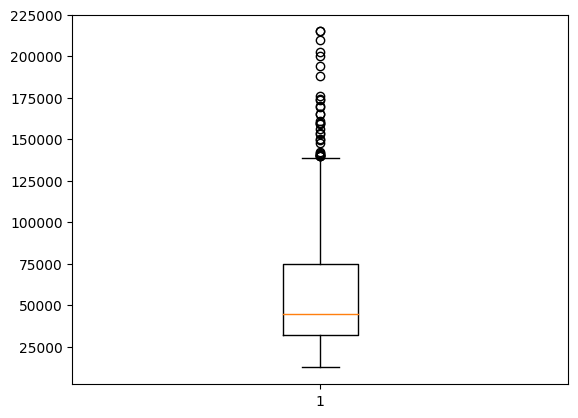

In [ ]:
plt.boxplot(price_comp)
plt.show()

Диаграмма с многочисленными выбросами. Это связано с большой удаленностью малых частот значений признака от среднего значения.
<br>Построение гистограммы с помощью метода hist(), для просмотра распределения признака.

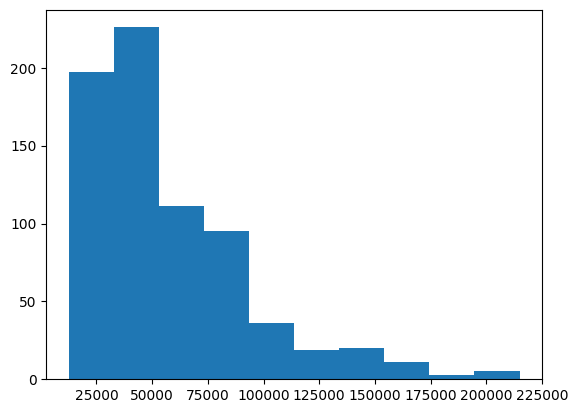

In [ ]:
plt.hist(price_comp)
plt.show()

Гистограмма указывает на достаточно большой размах в данных и достаточную равномерность распредения значений в выборке, что подтверждается и показателями описательной статистики (min и max, std).
Следует применить ограничения 10 процентилем снизу и 90 процентилем сверху, с тем, чтобы обработать часть выбросов, и заново построить "ящик с усами".

In [ ]:
price_comp_2 = dataset[
    (price_comp>=percentile_10_value)&
    (price_comp<=percentile_90_value)]['price']

In [ ]:
price_comp_2.value_counts()

74872    4
32851    3
65115    3
23279    3
        ..
37925    1
33485    1
65617    1
47211    1
Name: price, Length: 502, dtype: int64

In [ ]:
price_comp_2.describe()

count       577.000000
mean      51117.306759
std       21245.882466
min       22676.000000
25%       33778.000000
50%       44935.000000
75%       66755.000000
max      107521.000000
Name: price, dtype: float64

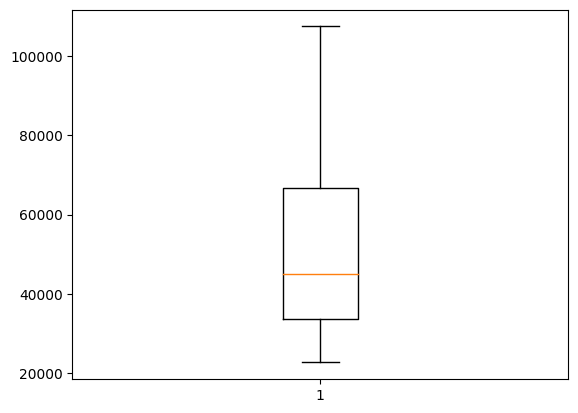

In [ ]:
plt.boxplot(price_comp_2)
plt.show()

Построение гистограммы с параметром bins=20 для лучшей визуализации.

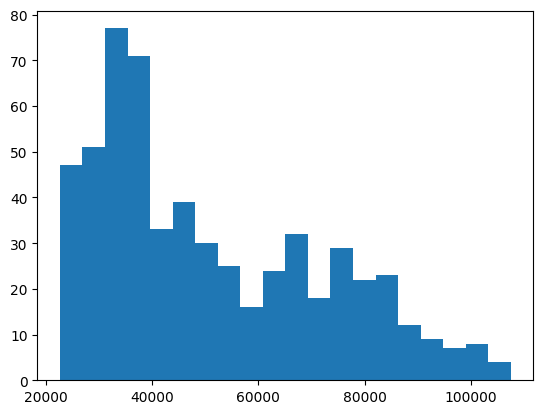

In [ ]:
plt.hist(price_comp_2, bins=20)
plt.show()

In [ ]:
price_comp_2.value_counts()

74872    4
32851    3
65115    3
23279    3
        ..
37925    1
33485    1
65617    1
47211    1
Name: price, Length: 502, dtype: int64

#### ***Выводы по признаку***

**Выводы по признаку цена ("price")**
1.   О максимальных и минимальных значениях признака (оценка размаха значений).
<br>Наибольшее значение признака:  214954 Наименьшее значение признака:  12500. Размах вариации значений составляет 202454.
2.   О нулевых значениях (их наличие, нужна ли предобработка).
<br>Нулевые значения по признаку отсутствуют.
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
<br>Средние значение признака:  57109.3, Медиана признака:  44989.0. Различия величин медианны и среднего связаны с неоднородностью выборки, в частности с увеличением размаха в значениях на интервале выше медианы.
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
<br>10-й процентиль признака:  23108.2
25-й процентиль признака:  32448.0
50-й процентиль признака:  44989.0
75-й процентиль признака:  74872.0
90-й процентиль признака:  107659.0
Таким образом, 90% данных не превышают цену компьютера в 107659 руб.
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).
<br>
Диаграмма boxplot, построенная на необработанных значениях имеет многочисленные выбросы. Это связано с большой удаленностью малых частот значений признака от среднего значения.
Гистограмма указывает на достаточно большой размах в данных и достаточную равномерность распредения значений в выборке, что подтверждается и показателями описательной статистики (min и max, std).

#### *2.1.2. sales*

Сохранение Series ['num_sales'] в переменную sales_comp

In [ ]:
sales_comp = dataset['num_sales']

Проверка пустых значений по признаку.

In [ ]:
sales_comp.isna().sum()

0

Расчет максимального и минимального значения количества продаж (num_sales) с помощью методов max() и min() соответственно. Вывод значений на печать.

In [ ]:
max_value = sales_comp.max()
min_value = sales_comp.min()
print('Наибольшее значение признака: ', max_value, 'Наименьшее значение признака: ', min_value)

Наибольшее значение признака:  800 Наименьшее значение признака:  5


Расчет среднего значения признака с помощью метода mean(). Вывод значения на печать.

In [ ]:
mean_value = sales_comp.mean()
print('Средние значение признака: ', mean_value)

Средние значение признака:  19.75795297372061


Расчет медианного значения признака с помощью метода median(). Вывод значения на печать.

In [ ]:
median_value = sales_comp.median()
print('Медиана признака: ', median_value)

Медиана признака:  5.0


Расчет процентилей (10, 25, 50, 75, 90) с помощью метода quantile(). Вывод значений на печать.

In [ ]:
percentile_10_value = sales_comp.quantile(0.10)
percentile_20_value = sales_comp.quantile(0.20)
percentile_25_value = sales_comp.quantile(0.25)
percentile_50_value = sales_comp.quantile(0.50)
percentile_75_value = sales_comp.quantile(0.75)
percentile_80_value = sales_comp.quantile(0.80)
percentile_90_value = sales_comp.quantile(0.90)
print('10-й процентиль денежных поступлений: ', percentile_10_value)
print('20-й процентиль денежных поступлений: ', percentile_20_value)
print('25-й процентиль денежных поступлений: ', percentile_25_value)
print('50-й процентиль денежных поступлений: ', percentile_50_value)
print('75-й процентиль денежных поступлений: ', percentile_75_value)
print('80-й процентиль денежных поступлений: ', percentile_80_value)
print('90-й процентиль денежных поступлений: ', percentile_90_value)

10-й процентиль денежных поступлений:  5.0
20-й процентиль денежных поступлений:  5.0
25-й процентиль денежных поступлений:  5.0
50-й процентиль денежных поступлений:  5.0
75-й процентиль денежных поступлений:  10.0
80-й процентиль денежных поступлений:  10.0
90-й процентиль денежных поступлений:  30.0


Просмотр показателей описательной статистики с помощью метода describe().

In [ ]:
sales_comp.describe()

count    723.000000
mean      19.757953
std       62.788753
min        5.000000
25%        5.000000
50%        5.000000
75%       10.000000
max      800.000000
Name: num_sales, dtype: float64

Построение диаграммы "ящик с усами" с помощью метода boxplot().

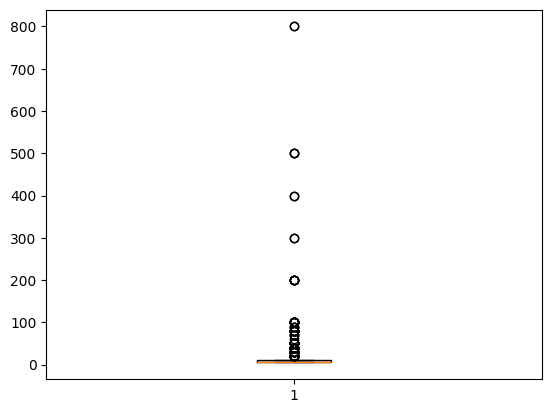

In [ ]:
plt.boxplot(sales_comp)
plt.show()

Диаграмма с многочисленными выбросами. Это связано с большой удаленностью малых частот значений признака от среднего значения.
<br>Построение гистограммы с помощью метода hist(), для просмотра распределения признака.

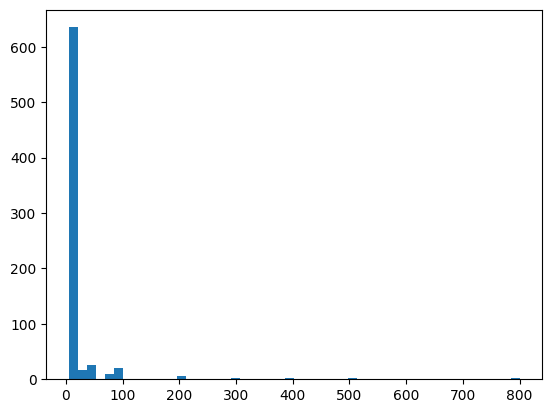

In [ ]:
plt.hist(sales_comp, bins=50)
plt.show()

Гистограмма показывает, на достаточно большой размах и неравномерность распределения значений в выборке, что подтверждается и показателями описательной статистики (min и max). С целью обработки части выбросов необходимо ограничение  занчений признака 10 процентилем снизу и 90 процентилем сверху. Затем, для графического анализа следует заново построить диаграмму "ящик с усами".

In [ ]:
sales_comp_2 = dataset[
    (sales_comp>=percentile_10_value)&
    (sales_comp<=percentile_90_value)]['num_sales']

In [ ]:
sales_comp_2.value_counts()

5     511
10     87
20     37
30     16
Name: num_sales, dtype: int64

Частоты значений 20 и 30 достаточно малы в выборке (37 и 17 соответственно) и в совокупности составляют менее 10% наблюдений.

In [ ]:
sales_comp_2.describe()

count    651.000000
mean       7.135177
std        5.193503
min        5.000000
25%        5.000000
50%        5.000000
75%        5.000000
max       30.000000
Name: num_sales, dtype: float64

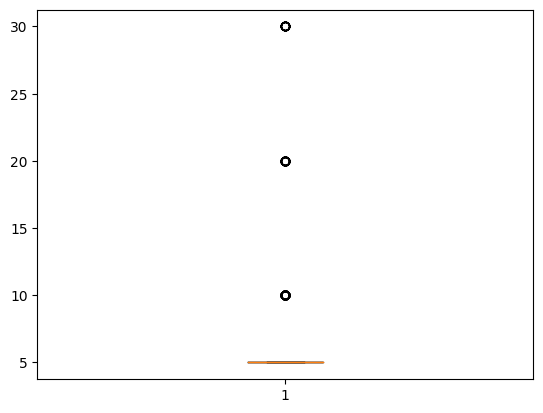

In [ ]:
plt.boxplot(sales_comp_2)
plt.show()

Новое построение гистограммы c параметром bins=20 для лучшей визуализации.

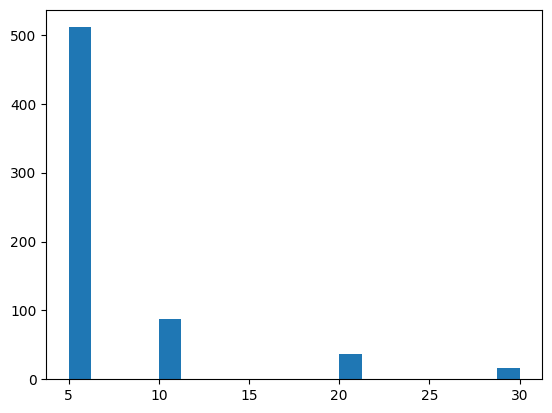

In [ ]:
plt.hist(sales_comp_2, bins=20)
plt.show()

In [ ]:
sales_comp_2 = dataset[sales_comp<sales_comp.quantile(0.85)]['num_sales']; sales_comp_2

0      10
3       5
5      10
6       5
       ..
719     5
720     5
721     5
722     5
Name: num_sales, Length: 598, dtype: int64

In [ ]:
sales_comp_2.value_counts()

5     511
10     87
Name: num_sales, dtype: int64

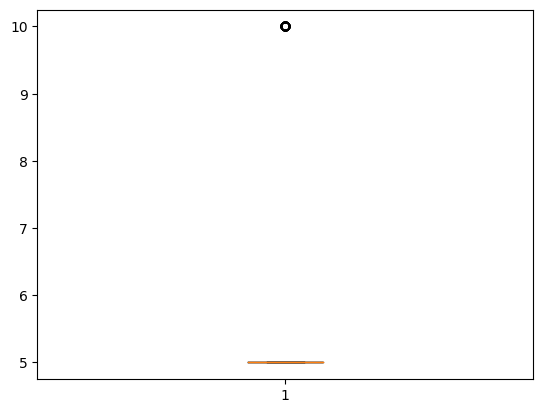

In [ ]:
plt.boxplot(sales_comp_2)
plt.show()

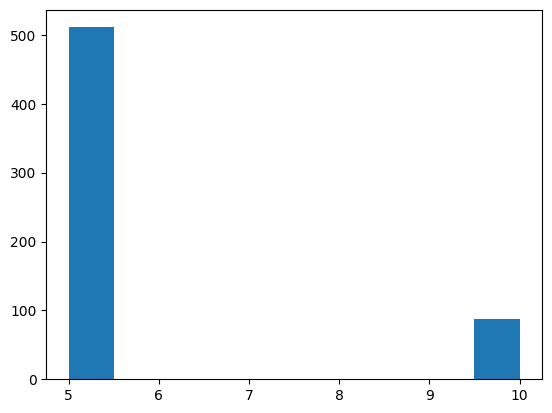

In [ ]:
plt.hist(sales_comp_2)
plt.show()

#### ***Выводы по признаку***

**Выводы по признаку количество продаж ("sales"):**
1.   О максимальных и минимальных значениях признака (оценка размаха значений).
<br>Наибольшее значение признака:  800 Наименьшее значение признака: 5. Размах вариации значений составляет 795.
2.   О нулевых значениях (их наличие, нужна ли предобработка).
<br>Нулевые значения по признаку отсутствуют.
3.   О средних величинах (среднее, медиана, их отличия, возможные причины).
<br>Средние значение признака:  18.7, Медиана признака:  5.
Различия величин медианны и среднего значения связаны с неоднородностью выборки, в частности с увеличением размаха в значениях на интервале выше медианы.
4.   О процентилях (сколько процентов данных не превышают то или иное значение).
<br>10-й процентиль денежных поступлений:  5.0
20-й процентиль денежных поступлений:  5.0
25-й процентиль денежных поступлений:  5.0
50-й процентиль денежных поступлений:  5.0
75-й процентиль денежных поступлений:  10.0
80-й процентиль денежных поступлений:  10.0
90-й процентиль денежных поступлений:  30.0
Таким образом, 90% данных не превышают уровень 30 продаж. Однако, частоты значений 20 и 30 достаточно малы в выборке (37 и 17 соответственно) и в совокупности составляют менее 10% наблюдений.
5.   О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).
<br>
Диаграмма boxplot, построенная на необработанных значениях имеет многочисленные выбросы. Это связано с большой удаленностью малых частот значений признака от среднего значения.
Гистограмма указывает на достаточно большой размах в данных и достаточную равномерность распредения значений в выборке, что подтверждается и показателями описательной статистики (min и max, std).



### **Выводы по разделу**

***Выводы по признакам "price" и "sales".***
1.  Диаграмма boxplot, построенная на необработанных значениях имеет многочисленные выбросы. Это связано с большой удаленностью малых частот значений признака от среднего значения.
2.  Гистограмма указывает на достаточно большой размах в данных и имеющуюся равномерность распредения значений в выборке, что подтверждается и показателями описательной статистики (min и max, std).
3.  Различия величин медианны и среднего значения связаны с неоднородностью выборки, в частности, с увеличением размаха в значениях на интервале выше медианы. Все это позволяет сделать вывод о наличии многочисленных выбросов в рассмотренных признаках.
4. 10-й процентиль признака: 23108.2 25-й процентиль признака: 32448.0 50-й процентиль признака: 44989.0 75-й процентиль признака: 74872.0 90-й процентиль признака: 107659.0 Таким образом, до 90% не данных не превышают цену компьютера в 107659 руб.
5.  С учетом исключения выбросов по признаку "price" следует вывод о том, что цены на основную массу реализуемых компьютеры находятся в интервале от 23000 до 75000 рублей.
6.  С учетом исключения выбросов по признаку "sales" следует вывод о том, что количество продаж основной массы реализуемых компьютеры находятся в интервале от 5 до 10 единиц.


### 2.2 Неграфический и графический анализ категориальных признаков

Выполнение неграфического и графического анализа категориальных признаков.

#### *2.2.1 Тип процессора*



Оценка описательных статистик признака с помощью метода describe()





In [ ]:
dataset['type_proc'].describe()

count               723
unique               25
top       Intel Core i5
freq                232
Name: type_proc, dtype: object

Получение уникальных значений признака с помощью метода unique()

In [ ]:
dataset['type_proc'].unique()

array(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'AMD Athlon',
       'Intel Core i7', 'Intel Core i9', 'AMD Ryzen 3',
       'Gemini Lake Refresh J4115', 'Intel Core 12400F', 'Intel Pentium',
       'Intel J4125', 'AMD Ryzen 7', 'Intel Xeon', 'AMD A6', '8 ядер',
       'Intel J3455', 'AMD E1-6010', 'Intel N5095',
       'AMD RYZEN 4600g Vega7 арт. 100343717', 'Intel N5105',
       'Intel Celeron', 'AMD Ryzen 6',
       'AMD RYZEN 4600g Vega7 арт. 143553804', 'AMD Ryzen 9',
       'AMD Radeon RX 570'], dtype=object)

Проведение неграфического структурного анализа с помощью метода value_counts()

In [ ]:
dataset['type_proc'].value_counts().head(5)

Intel Core i5    232
Intel Core i3    140
AMD Ryzen 5      136
Intel Core i7     94
AMD Athlon        32
Name: type_proc, dtype: int64

In [ ]:
dataset['type_proc'].value_counts().tail(5)

Intel N5105                             1
AMD Ryzen 6                             1
AMD RYZEN 4600g Vega7 арт. 143553804    1
AMD Ryzen 9                             1
AMD Radeon RX 570                       1
Name: type_proc, dtype: int64

Сохранение результатов работы метода value_counts() в переменную type_proc_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для сортирки значений столбчатой диаграммы сверху вниз: наибольшее - сверху, наименьшее - снизу).

In [ ]:
type_proc_counts = dataset['type_proc'].value_counts().sort_values(ascending=True)

Построение горизонтальной столбчатой диаграммы с помощью метода barh()

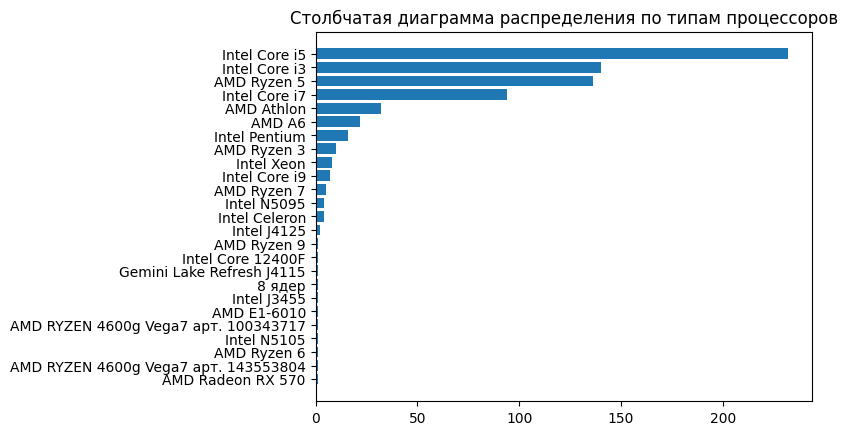

In [ ]:
plt.barh(type_proc_counts.index, type_proc_counts.values)
plt.title('Столбчатая диаграмма распределения по типам процессоров')
plt.show()

Выделение топ-5 классов, по которым наибольшие частоты наблюдений и сохранение результата в переменную type_proc_counts_top_5.

In [ ]:
type_proc_counts_top_5 = dataset['type_proc'].value_counts()[:5].sort_values(ascending=True)
type_proc_counts_top_5

AMD Athlon        32
Intel Core i7     94
AMD Ryzen 5      136
Intel Core i3    140
Intel Core i5    232
Name: type_proc, dtype: int64

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой).

P.s. При анализе категориальных признаков, в случае, если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая.

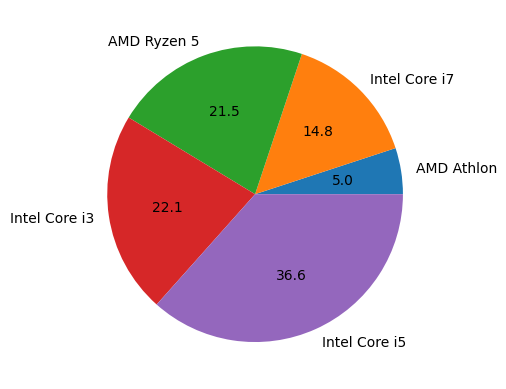

In [ ]:
plt.pie(type_proc_counts_top_5.values, labels=type_proc_counts_top_5.index, autopct='%.1f')
plt.show()

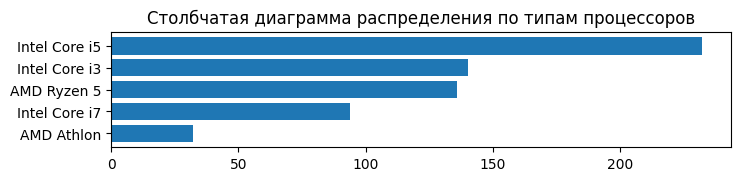

In [ ]:
f = plt.subplots(figsize=(8, 1.5))
plt.barh(type_proc_counts_top_5.index, type_proc_counts_top_5.values)
plt.title('Столбчатая диаграмма распределения по типам процессоров')
plt.show()

####***Выводы по признаку:***
1.   О количестве уникальных значений признака.
<br> В признаке имеется 723 наблюдения, из них 25 уникальных значений.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
<br>Наиболее часто встечающееся наблюдение - Тип процессора Intel Core i5,  встречается в признаке с частотой 242.
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
<br>В признаке имеется достаточно большой размах в данных и равномерность распредения значений в выборке. 5 первых наблюдений в признаке по наибольшей частоте от 242 до 38: Intel Core i5, Intel Core i3, AMD Ryzen 5, Intel Core i7, AMD Athlon, 5 последних наблюдений в признаке имеют частоту 1: Intel N5105, AMD Ryzen 6, AMD RYZEN 4600g Vega7, AMD Ryzen 9, AMD Radeon RX 570.           
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
<br>Гистограмма указывает на достаточно большой размах в данных и имеющуюся равномерность распредения значений в выборке.
На круговой диаграмме ТОП-5 значений наблюдается следующее распределение долей:
Intel Core i5 -35.2%, Intel Core i3 - 23.7%, AMD Ryzen 5 - 21.5%, Intel Core i7 - 14.2%, AMD Athlon - 5.5%.

#### *2.2.2 Тип памяти*



Оценка описательных статистик признака с помощью метода describe()

In [ ]:
dataset['type_memory'].describe()

count       723
unique        3
top       DDR 4
freq        605
Name: type_memory, dtype: object

Получение уникальных значений признака с помощью метода unique()

In [ ]:
dataset['type_memory'].unique()

array(['DDR 4', 'DDR 3', 'DDR 5'], dtype=object)

Проведение неграфического структурного анализа с помощью метода value_counts()

In [ ]:
dataset['type_memory'].value_counts()

DDR 4    605
DDR 3    116
DDR 5      2
Name: type_memory, dtype: int64

Сохранение результатов работы метода value_counts() в переменную type_memory_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для сортирки значений столбчатой диаграммы сверху вниз: наибольшее - сверху, наименьшее - снизу).

In [ ]:
type_memory_counts = dataset['type_memory'].value_counts().sort_values(ascending=True)

Построение горизонтальной столбчатой диаграммы с помощью метода barh()

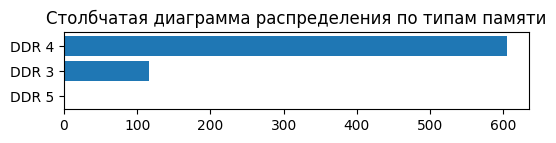

In [ ]:
f = plt.subplots(figsize=(6, 1))
plt.barh(type_memory_counts.index, type_memory_counts.values)
plt.title('Столбчатая диаграмма распределения по типам памяти')
plt.show()

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой).

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

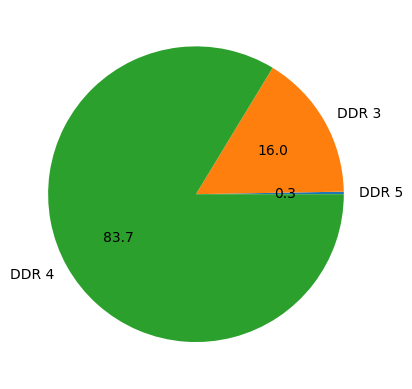

In [ ]:
plt.pie(type_memory_counts.values, labels=type_memory_counts.index, autopct='%.1f')
plt.show()

####***Выводы по признаку:***
1.   О количестве уникальных значений признака.
<br> В признаке имеется 723 наблюдения, из них 3 уникальных значения.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
<br>Наиболее часто встечающееся наблюдение - DDR4,  встречается в признаке с частотой 665.
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
<br>В признаке имеется достаточно большой разрыв значений по частоте (DDR 4 -   665, DDR3 - 116, DDR5 - 2).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
<br>Гистограмма указывает на достаточно большой отрыв частоты DDR4 в данных.
На круговой диаграмме распределение долей следующее:
DDR4 -84.9%, DDR3 - 14.8%, DDR5 - 0.3%.

#### *2.2.3 Диск HDD*



Оценка описательных статистик признака с помощью метода describe()

In [ ]:
dataset['Диск HDD'].describe()

count     723
unique      7
top         0
freq      521
Name: Диск HDD, dtype: object

Получение уникальных значений признака с помощью метода unique()

In [ ]:
dataset['Диск HDD'].unique()

array(['0', '1000', '2000', '500', '512', '250', '4000'], dtype=object)

Проведение неграфического структурного анализа с помощью метода value_counts()

In [ ]:
dataset['Диск HDD'].value_counts()

0       521
1000    141
500      43
2000     15
512       1
250       1
4000      1
Name: Диск HDD, dtype: int64

Сохранение результатов работы метода value_counts() в переменную disc_hdd_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для сортирки значений столбчатой диаграммы сверху вниз: наибольшее - сверху, наименьшее - снизу).

In [ ]:
disc_hdd1_counts = dataset['Диск HDD'].value_counts()[:3].sort_values(ascending=True)

In [ ]:
disc_hdd2_counts = dataset['Диск HDD'].value_counts().sort_values(ascending=True)

Построение горизонтальной столбчатой диаграммы с помощью метода barh().

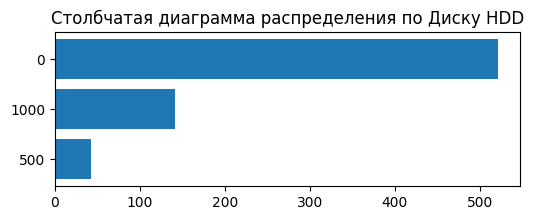

In [ ]:
f = plt.subplots(figsize=(6, 2))
plt.barh(disc_hdd1_counts.index, disc_hdd1_counts.values)
plt.title('Столбчатая диаграмма распределения по Диску HDD')
plt.show()

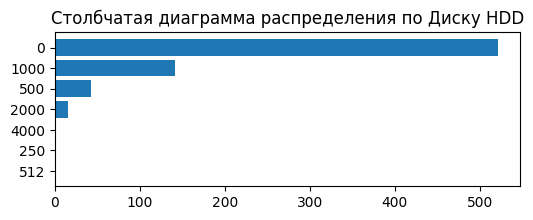

In [ ]:
f = plt.subplots(figsize=(6, 2))
plt.barh(disc_hdd2_counts.index, disc_hdd2_counts.values)
plt.title('Столбчатая диаграмма распределения по Диску HDD')
plt.show()

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой).

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

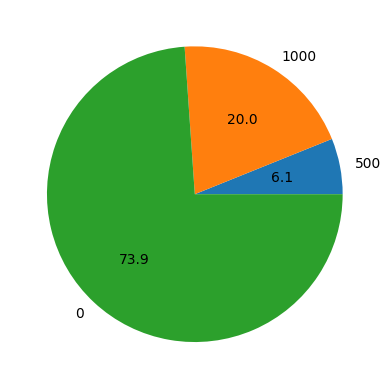

In [ ]:
plt.pie(disc_hdd1_counts.values, labels=disc_hdd1_counts.index, autopct='%.1f')
plt.show()

####***Выводы по признаку:***
1.   О количестве уникальных значений признака.
<br> В признаке имеется 723 наблюдения, из них 7 уникальных значения.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
<br>Наиболее часто встечающееся наблюдение - 0 (отсутствие у продаваемых компьютеров диска HDD),  встречается в признаке с частотой 521.
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
<br>В признаке имеется достаточно большой разрыв значений по частоте (0 -   521, 1000 - 141, 500 - 43).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
<br>Гистограмма указывает на достаточно большой отрыв частоты 0 в данных.
На круговой диаграмме распределение долей следующее:
0 - 73.9%, 1000 - 20.0%, 500 - 6.1%.


#### *2.2.4 Диск SSD*



Оценка описательных статистик признака с помощью метода describe().

In [ ]:
dataset['Диск SSD'].describe()

count     723
unique     15
top       480
freq      247
Name: Диск SSD, dtype: object

Получение уникальных значений признака с помощью метода unique().

In [ ]:
dataset['Диск SSD'].unique()

array(['480', '960', '512', '2000', '240', '1000', '128', '120', '256',
       '500', '0', '250', '1240', '1480', '1024'], dtype=object)

Проведение неграфического структурного анализа с помощью метода value_counts().

In [ ]:
dataset['Диск SSD'].value_counts()

480     247
512     109
240     100
960      65
       ... 
250       3
1480      3
1024      3
1240      1
Name: Диск SSD, Length: 15, dtype: int64

Сохранение результатов работы метода value_counts() в переменную disc_ssd_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для сортирки значений столбчатой диаграммы сверху вниз: наибольшее - сверху, наименьшее - снизу).

In [ ]:
disc_ssd_counts = dataset['Диск SSD'].value_counts()[:5].sort_values(ascending=True)

Построение горизонтальной столбчатой диаграммы с помощью метода barh().

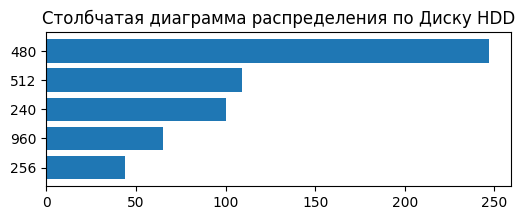

In [ ]:
f = plt.subplots(figsize=(6, 2))
plt.barh(disc_ssd_counts.index, disc_ssd_counts.values)
plt.title('Столбчатая диаграмма распределения по Диску HDD')
plt.show()

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой).

P.s. При анализе категориальных признаков если категорий не больше 5, то предпочтительна круговая диаграмма, в ином случае - столбчатая

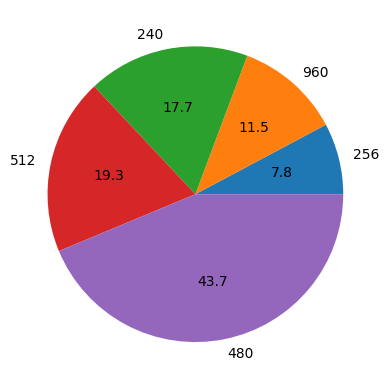

In [ ]:
plt.pie(disc_ssd_counts.values, labels=disc_ssd_counts.index, autopct='%.1f')
plt.show()

####***Выводы по признаку:***
1.   О количестве уникальных значений признака.
<br> В признаке имеется 723 наблюдения, из них 3 уникальных значения.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
<br>Наиболее часто встечающееся наблюдение - 480,  встречается в признаке с частотой 247.
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
<br>В признаке имеется достаточно большой разрыв значений по частоте (480 -   247, 512 - 109, 240 - 100).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
<br>Гистограмма указывает на достаточно большой отрыв частоты 480 в данных.
На круговой диаграмме распределение долей следующее:
480 -43.7%, 512 - 19.3%, 240 - 17.7%.

#### *2.2.5 Видеопроцессор*

Оценка описательных статистик признака с помощью метода describe().


In [ ]:
dataset['Видеопроцессор'].describe()

count                   723
unique                   44
top       AMD Radeon Vega 7
freq                     90
Name: Видеопроцессор, dtype: object

Получение уникальных значений признака с помощью метода unique().

In [ ]:
dataset['Видеопроцессор'].unique()

array(['Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
       'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce GT 1030',
       'intel UHD Graphics 750', 'Intel HD Graphics 6000',
       'Intel HD Graphics 610', 'не заполнено', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'NVIDIA GeForce GT 730',
       'NVIDIA Quadro T400', 'NVIDIA GeForce GTX 1050',
       'NVIDIA GeForce GT 740', 'Intel HD Graphics',
       'NVIDIA GeForce RTX 2060', 'AMD Radeon RX 580', 'AMD Radeon R5',
       'Intel UHD Graphics 610', 'NVIDIA', 'Intel HD Graphics 500',
       'NVIDIA GeForce GTX 1630', 'AMD Radeon RX 6500',
       'Intel HD Graphics 2000', 'Intel HD Graphics 4000', 'AMD',
       'Intel UHD Graphics', 'Intel UHD Graphics 605',
       'Intel UHD Graphics 600', 'AMD Radeon RX 6600',
       'Intel HD Graphics 2500', 'NVIDIA Ge

Проведение неграфического структурного анализа с помощью метода value_counts().

In [ ]:
dataset['Видеопроцессор'].value_counts().head(5)

AMD Radeon Vega 7          90
NVIDIA GeForce RTX 3050    83
Intel HD Graphics 2000     83
NVIDIA GeForce GT 1030     76
NVIDIA GeForce RTX 3060    74
Name: Видеопроцессор, dtype: int64

In [ ]:
dataset['Видеопроцессор'].value_counts().tail(5)

NVIDIA Quadro T400         1
AMD                        1
Intel HD Graphics 610      1
Intel HD Graphics 500      1
NVIDIA GeForce GTX 1060    1
Name: Видеопроцессор, dtype: int64

Сохранение результатов работы метода value_counts() в переменную videoproc_counts, отсортировав значения с помощью метода sort_values(), передав в него параметр (ascending=True) (это необходимо для сортирки значений столбчатой диаграммы сверху вниз: наибольшее - сверху, наименьшее - снизу).

In [ ]:
videoproc_counts = dataset['Видеопроцессор'].value_counts().sort_values(ascending=True)

Построение горизонтальной столбчатой диаграммы с помощью метода barh().

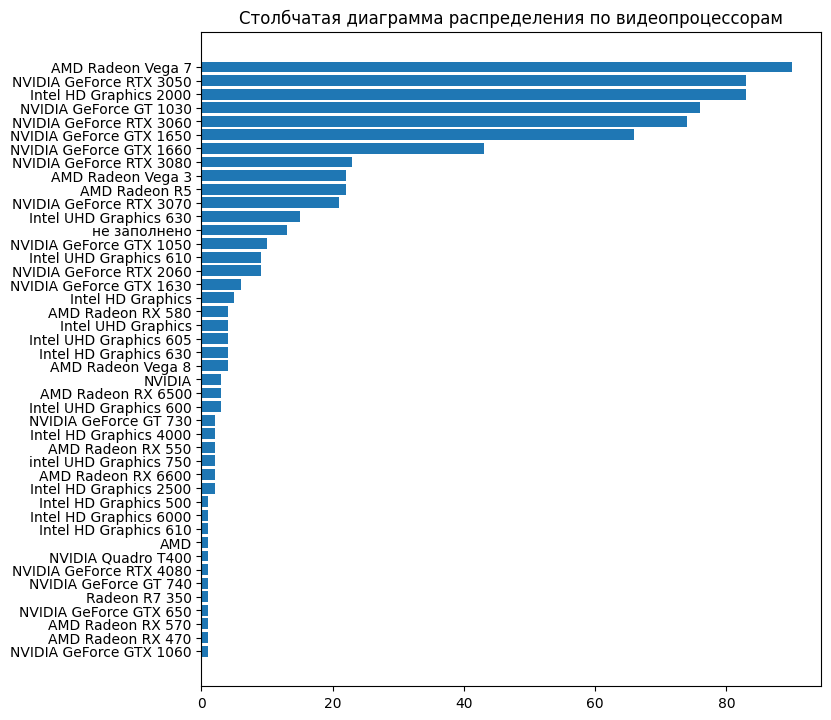

In [ ]:
fig = plt.subplots(figsize=(8, 8.5))
plt.barh(videoproc_counts.index, videoproc_counts.values)
plt.title('Столбчатая диаграмма распределения по видеопроцессорам')
plt.show()

In [ ]:
base = dataset['Видеопроцессор'].value_counts()[:7].sum()/100
ind = 0
print("№", "\t", "Частота", "\t", "%", "\t", "Видеопроцессор")
print("---------------------------------------------------")
for i in dataset['Видеопроцессор'].value_counts()[:7]:
  print(ind+1,"\t", i, "\t\t", round(dataset['Видеопроцессор'].value_counts()[:7][ind]/base,2), "\t", dataset['Видеопроцессор'].value_counts()[:7].index[ind] )
  ind +=1

№ 	 Частота 	 % 	 Видеопроцессор
---------------------------------------------------
1 	 90 		 17.48 	 AMD Radeon Vega 7
2 	 83 		 16.12 	 NVIDIA GeForce RTX 3050
3 	 83 		 16.12 	 Intel HD Graphics 2000
4 	 76 		 14.76 	 NVIDIA GeForce GT 1030
5 	 74 		 14.37 	 NVIDIA GeForce RTX 3060
6 	 66 		 12.82 	 NVIDIA GeForce GTX 1650
7 	 43 		 8.35 	 NVIDIA GeForce GTX 1660


Значимых 6 типов видепороцессоров. Выделение топ-6 классов, по которым наибольшие частоты наблюдений и сохранение результата в переменную videoproc_counts_top_6.

In [ ]:
videoproc_counts_top_6 = dataset['Видеопроцессор'].value_counts()[:6].sort_values(ascending=True)
videoproc_counts_top_6

NVIDIA GeForce GTX 1650    66
NVIDIA GeForce RTX 3060    74
NVIDIA GeForce GT 1030     76
NVIDIA GeForce RTX 3050    83
Intel HD Graphics 2000     83
AMD Radeon Vega 7          90
Name: Видеопроцессор, dtype: int64

Построение круговой диаграммы с помощью метода pie(), добавив подписи данных с помощью параметра labels и подписи значений с помощью параметра autopct='%.1f' (проценты с одним знаком после запятой).

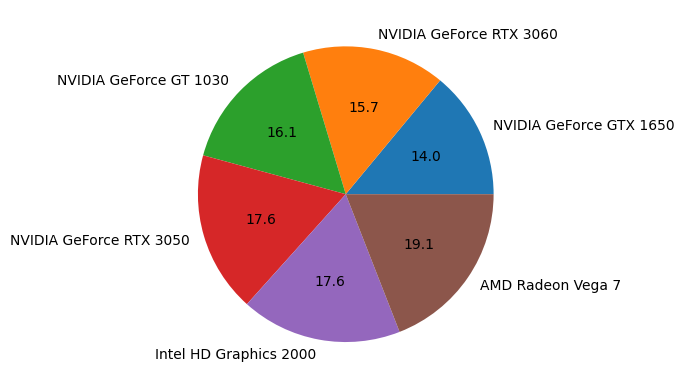

In [ ]:
plt.pie(videoproc_counts_top_6.values, labels=videoproc_counts_top_6.index, autopct='%.1f')
plt.show()

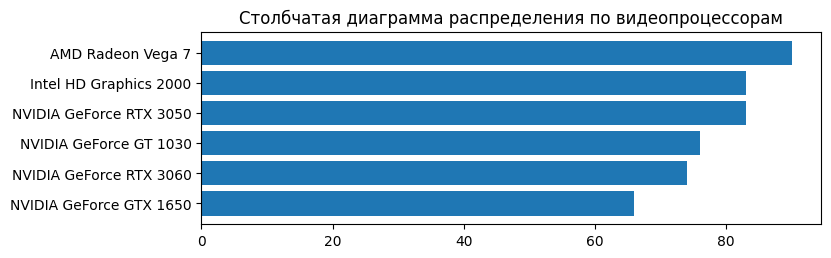

In [ ]:
fig = plt.subplots(figsize=(8, 2.5))
plt.barh(videoproc_counts_top_6.index, videoproc_counts_top_6.values)
plt.title('Столбчатая диаграмма распределения по видеопроцессорам')
plt.show()

####***Выводы по признаку:***
1.   О количестве уникальных значений признака.
<br> В признаке имеется 783 наблюдения, из них 44 уникальных значений.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
<br>Наиболее часто встечающееся наблюдение - AMD Radeon Vega 7,  встречается в признаке с частотой 97.
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
<br>В признаке имеется достаточно умеренный размах в данных и достаточная равномерность распредения значений в выборке. 5 первых наблюдений в признаке по наибольшей частоте от 97 до 78: AMD Radeon Vega 7, NVIDIA GeForce RTX 3050, NVIDIA GeForce GT 1030, Intel HD Graphics 2000, NVIDIA GeForce RTX 3060, 5 последних наблюдений в признаке имеют частоту 1: NVIDIA Quadro T400,  AMD, Intel HD Graphics 610, Intel HD Graphics 500, NVIDIA GeForce GTX 1060
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).
<br>Гистограмма указывает на достаточно большой размах в данных и достаточную равномерность плотности распредения значений в выборке.
На круговой диаграмме ТОП-5 значений распределение долю следующее: AMD Radeon Vega 7 -19.7%, NVIDIA GeForce RTX 3050 - 17.9%, NVIDIA GeForce GT 1030 - 17.7%, Intel HD Graphics 2000 - 16.3%, NVIDIA GeForce RTX 3060 - 15.3%. Как видно, доли видеопроцессоров приблизительно равные.

### **Выводы по разделу**


***Выводы по признакам раздела:***

1.  В категориальных признаках имеется 783 наблюдений, из которых  признаки "Тип процессора" и "Видеопроцессор" имеют достаточно большое количество уникальных значений (20-44).
2.  Сосредоточение и наибольшая концентрация частот по всем признакам наблюдается в основном по 4-6 наиболее крупным группам значений, что подтверждается как описательными статистиками так и графической визуализацией.
3.  Наиболее часто встечающееся наблюдение в признаке "Тип процессора" - Intel Core i5,  встречается в признаке с частотой 242. В признаке "Тип процессора"  имеется 5 наблюдений с наибольшей частотой от 242 до 38: Intel Core i5, Intel Core i3, AMD Ryzen 5, Intel Core i7, AMD Athlon.
4.  Наиболее часто встечающееся наблюдение по признаку "Тип памяти" - DDR4, встречается в признаке с частотой 665. В признаке имеется достаточно большой разрыв значений по частоте (DDR 4 - 665, DDR3 - 116, DDR5 - 2).
5.  Наиболее часто встечающееся наблюдение по признаку "Диск HDD" - 0 (отсутствие у продаваемых компьютеров диска HDD), встречается в признаке с частотой 521. В признаке имеется достаточно большой разрыв значений по частоте (0 - 521, 1000 (ГБ) - 141, 500 (ГБ) - 43).
6.  Наиболее часто встечающееся наблюдение в признаке "Диск SSD" - 480 (ГБ), встречается в признаке с частотой 247. В признаке имеется достаточно большой разрыв значений по частоте (480 (ГБ) - 247, 512 (ГБ) - 109, 240 (ГБ) - 100).
7.  Наиболее часто встечающееся наблюдение в признаке "Видепроцессор" - AMD Radeon Vega 7, встречается в признаке с частотой 97. В признаке имеется достаточно умеренный размах в данных и равномерность распредения значений в выборке. 5 первых наблюдений в признаке по наибольшей частоте от 97 до 78: AMD Radeon Vega 7, NVIDIA GeForce RTX 3050, NVIDIA GeForce GT 1030, Intel HD Graphics 2000, NVIDIA GeForce RTX 3060.





### 2.3 Анализ взаимосвязи двух количественных признаков

Выполнение анализа взаимосвязи двух количественных признаков

#### *2.3.1. price - num_sales*

Построение диаграммы совместного распределения двух количественных переменных с помощью функции jointplot(), передав параметры size и alpha для улучшения визуализации

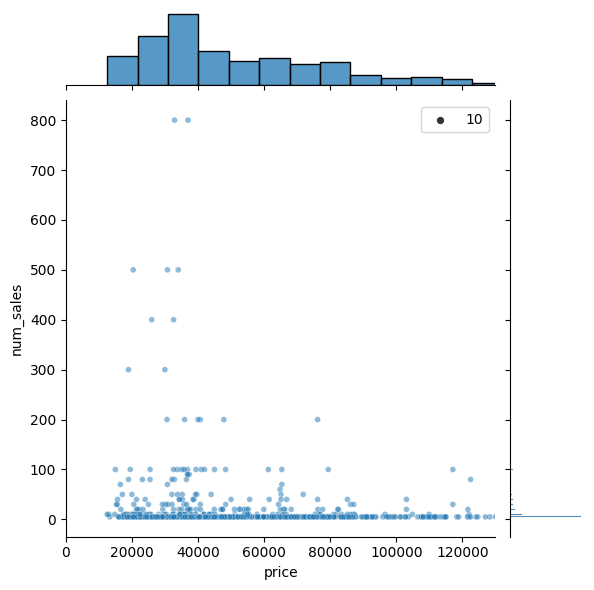

In [ ]:
sns.jointplot(x=dataset['price'], y=dataset['num_sales'], size=10, alpha=0.5)
plt.axis(xmin=0, xmax=130000)
plt.show()

Построение диаграммы рассеяния, используя функцию PairGrid(), map() и метод scatterplot, с параметром alpha для улучшения визуализации.

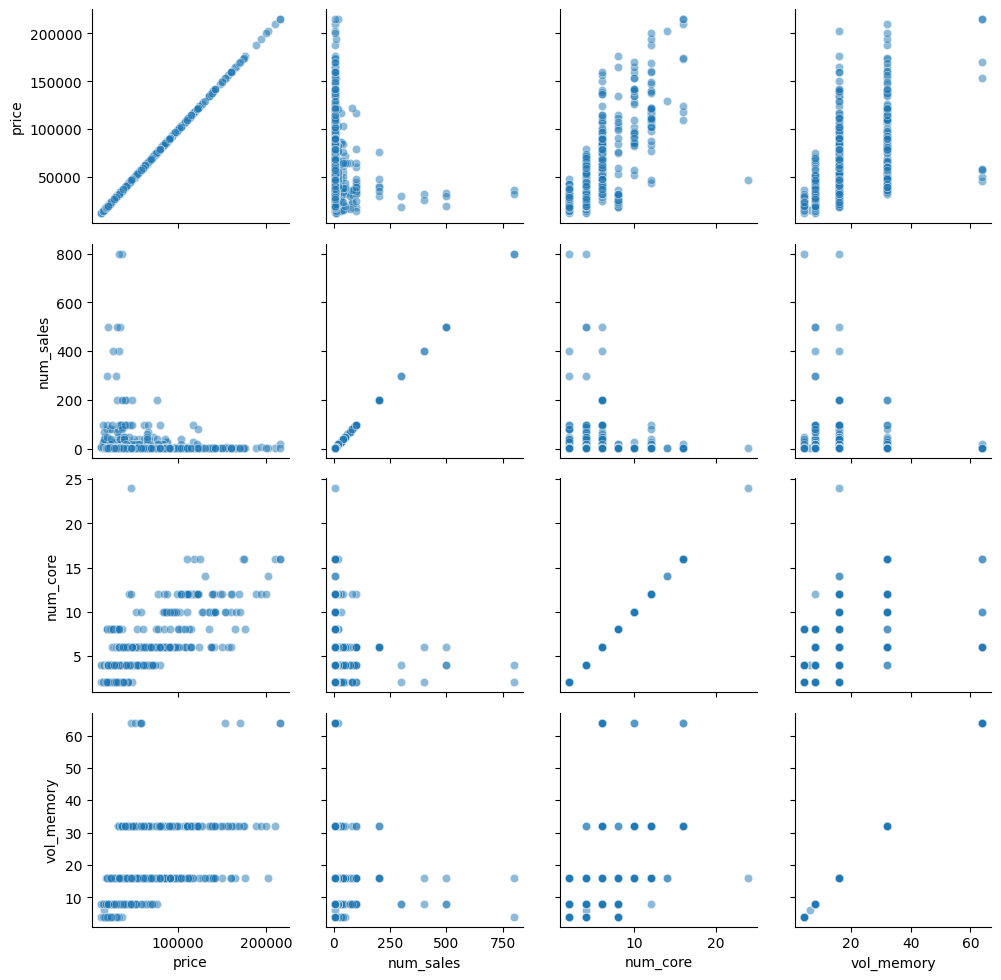

In [ ]:
g = sns.PairGrid(dataset)
g.map(sns.scatterplot, alpha=0.5)

Исключение выбросов, отфильтровав датасет по 99% процентилю. Для этого сохраняется копия исходного датасета в переменную new_ds с помощью метода copy(). Для каждой колонки в columns ограничивается значение 99% процентилем с помощью метода quantile(), сохраняя объект Series в переменную limiter и фильтруя new_dataset по данному ограничению с помощью оператора <=

In [ ]:
dataset.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
columns = ['price', 'num_sales']
new_ds = dataset.copy()
for col in columns:
  limiter = new_ds[col].quantile(0.90)
  new_ds = new_ds[new_ds[col]<=limiter]

Построение диаграммы рассеяния по данным датасета new_ds, используя функции PairGrid(), map() и метод scatterplot, передав параметр alpha для улучшения визуализации

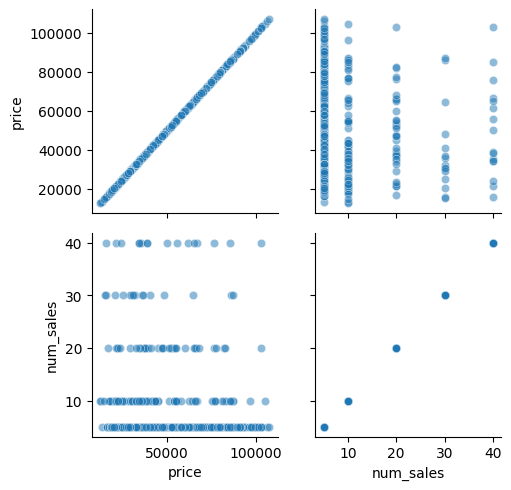

In [ ]:
g = sns.PairGrid(new_ds[['price', 'num_sales']])
g.map(sns.scatterplot, alpha=0.5)

In [ ]:
new_ds.describe()

,price,num_sales,num_core,vol_memory
count,596.000000,596.000000,596.000000,596.000000
mean,48419.365772,8.145973,5.288591,16.372483
std,22755.967521,7.450261,2.094556,8.971412
min,12500.000000,5.000000,2.000000,4.000000
25%,30566.500000,5.000000,4.000000,8.000000
50%,42170.500000,5.000000,6.000000,16.000000
75%,66124.500000,6.250000,6.000000,16.000000
max,107521.000000,40.000000,24.000000,64.000000


### **Выводы по разделу**

***Выводы по анализу признаков раздела:***
1.   На основании графического анализа двух количественных показателей можно констатировать об отсутствии линейной зависимости между ценой компьютеров и количеством продаж. В целом достаточно стабильно (имеют объем реализации с наибольшей концентрацией по значениям от 5 до 10 единиц) продаются компьютеры в ценовом интервале от 25000 до 70000 руб. Цена и количество продаж при этом не имеют взаимосвязи.
2.  Цены выше 75000 руб. с объемом продаж свыше 10 единиц как было отмечено в разделе 2.1 относятся к выбросам.


### 2.4 Анализ взаимосвязи двух категориальных признаков

Выполнение анализа взаимосвязи двух категориальных признаков

#### *2.4.1 Тип процессора - Видеопроцессор*

Просмотр уникальных значений признака type_proc, определенные с помощью метода unique() и определение их количества с помощью функции len()

In [ ]:
len(new_ds['type_proc'].unique())

22

Проведение неграфического структурного анализа признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

Определение топ-5 признаков с помощью метода value_counts() и среза, вывод их списка при помощи атрибута index с сохранением его в переменную.

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Для корректного визуального представления распределения признака 'Видеопроцессор' создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors.

In [ ]:
labels = new_ds['Видеопроцессор'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys(['Intel HD Graphics 2000', 'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7', 'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce GT 1030', 'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce GTX 1660', 'AMD Radeon Vega 3', 'AMD Radeon R5', 'Intel UHD Graphics 630', 'не заполнено', 'NVIDIA GeForce GTX 1050', 'NVIDIA GeForce RTX 2060', 'Intel UHD Graphics 610', 'NVIDIA GeForce GTX 1630', 'Intel HD Graphics 630', 'Intel UHD Graphics 605', 'AMD Radeon Vega 8', 'AMD Radeon RX 580', 'Intel UHD Graphics 600'])

Для каждого значения из топ-5 (type_proc_top_5) строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку t_proc и сохраняется в переменную df; сохраняется топ-5 видеопроцессоров (Видеопроцессор), определенных с помощью метода value_counts() и среза, в переменную video_proc_counts; выведится список уникальных значений топ-5 с помощью атрибута index и сохраняется в переменную labels; в качестве названия диаграммы передается "Тип процессора" с помощью метода title(); строится диаграмма, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'.

In [ ]:
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
df

,title,price,num_sales,type_proc,num_core,type_memory,vol_memory,Диск HDD,Диск SSD,Видеопроцессор
29,Офисный Компьютер Robotcomp Секретарь V1,21355,20,AMD Athlon,2,DDR 4,8,0,240,AMD Radeon Vega 3
30,Офисный Компьютер Robotcomp Секретарь V2,29482,5,AMD Athlon,2,DDR 4,8,0,240,AMD Radeon Vega 3
31,Офисный Компьютер Robotcomp Секретарь V3,34788,10,AMD Athlon,2,DDR 4,8,0,240,AMD Radeon Vega 3
176,Игровой компьютер Roo24 AMD Ryzen 3000G/A320/D...,26999,5,AMD Athlon,2,DDR 4,8,0,480,AMD Radeon Vega 3
...,...,...,...,...,...,...,...,...,...,...
645,Игровой компьютер Системный блок ПК CompDay Ma...,27136,5,AMD Athlon,2,DDR 4,16,0,240,AMD Radeon Vega 3
653,Игровой компьютер Системный блок ПК CompDay Дрон,31901,5,AMD Athlon,2,DDR 4,16,0,480,AMD Radeon Vega 3
663,Игровой Компьютер Robotcomp Star V1,29209,5,AMD Athlon,2,DDR 4,16,0,240,AMD Radeon Vega 3
697,Игровой ПК AMD Athlon X4 860K/8GB/240GB/GTX 16...,45600,5,AMD Athlon,4,DDR 3,8,0,240,NVIDIA GeForce GTX 1660


In [ ]:
video_proc_counts = df['Видеопроцессор'].value_counts()[:5].index
video_proc_counts

Index(['AMD Radeon Vega 3', 'NVIDIA GeForce GT 1030',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce GTX 1660'],
      dtype='object')

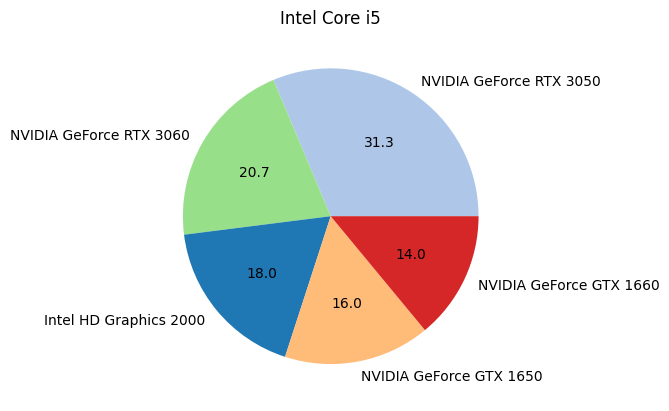

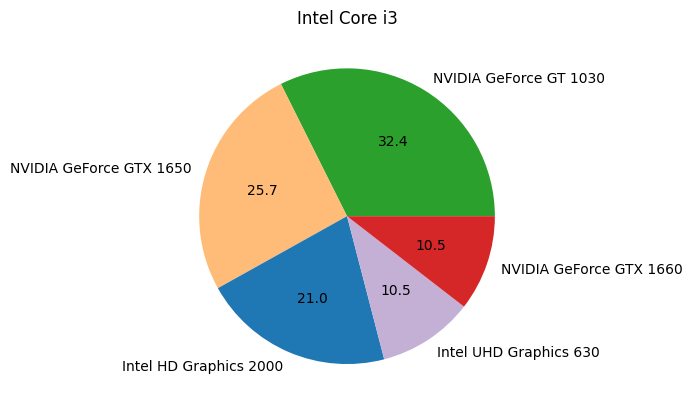

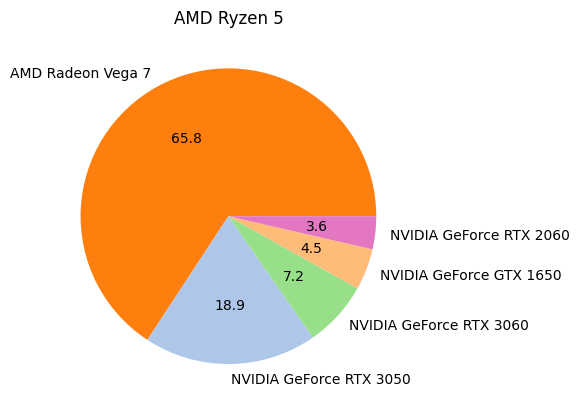

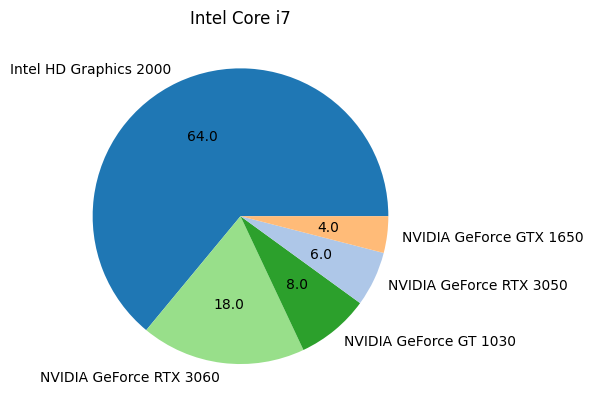

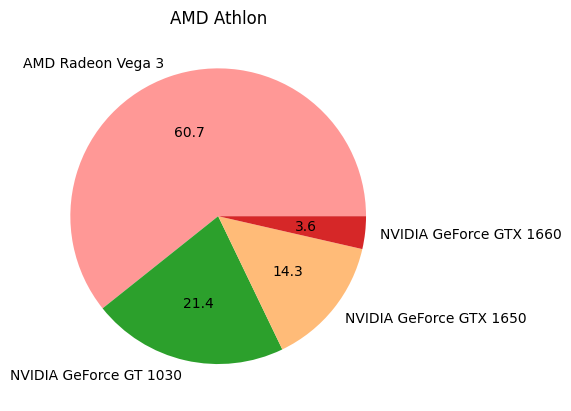

In [ ]:
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  video_proc_counts = df['Видеопроцессор'].value_counts()[:5]
  labels_videoproc = video_proc_counts.index
  plt.title(t_proc)
  plt.pie(video_proc_counts, labels=labels_videoproc, colors=[colors[key] for key in labels_videoproc], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью компьютеров с процессорами intel Core i5, intel Core i3 является то, что они практически в равных долях (порядка от 10 до 30%) укомплектованы такми видеопроцессорами как: NVIDIA GeForce RTX 3050, NVIDIA GeForce RTX 3060, Intel HD Graphics 2000, NVIDIA GeForce GTX 1650, NVIDIA GeForce GTX 1660, Intel UHD Graphics 630, NVIDIA GeForce GT 1030. В компьютерах с другими типами процессоров, преимущественный вес (более 50%) занимают комплектации тем или иным видеопроцессором.
2.  В разделе 2.2 установлено, что в реализуемых компьютерах наиболее часто встречаются процессоры intel Core i5. В настоящем разделе при анализе взаимосвязи наблюдается, что компьютеры с вышеуказанными процессорами на 31,3% укомплектованы видеопроцессором NVIDIA GeForce RTX 3050.
<br>В диапазоне долей от 14 до 20,7% компьютеры с вышеназванным процессором работают с видеопроцессорами: NVIDIA GeForce RTX 3060 (20,7%), Intel HD Graphics 2000 (18,0%), NVIDIA GeForce GTX 1650 (16,0%), NVIDIA GeForce GTX 1660 (14,0%).
3.  Процессоры intel Core i3 на 32,4% укомплектованы видеопроцессором NVIDIA GeForce GT 1030.
<br>В диапазоне долей от 10,5 до 25,7% компьютеры с вышеназванным процессором работают с видеопроцессорами: NVIDIA GeForce GTX 1650 (25,7%), Intel HD Graphics 2000 (21,0%), Intel UHD Graphics 630 (10,5%) , NVIDIA GeForce GTX 1660 (10,5%).
4. Процессоры AMD Ryzen 5 на 65,8% укомплектованы видеопроцессором AMD Radeon Vega 7.
<br>В диапазоне долей от 3,6 до 19,9% компьютеры с вышеназванным процессором работают с видеопроцессорами: NVIDIA GeForce RTX 3050 (18,9%), NVIDIA GeForce RTX 3060 (7,2%), NVIDIA GeForce GTX 1650 (4,5%), NVIDIA GeForce RTX 2060 (3,6%)
5.  Процессоры Intel Core i7 на 64,8% укомплектованы видеопроцессором Intel HD Graphics 2000.
<br>В диапазоне долей от 4,0 до 18,0% компьютеры с вышеназванным процессором укомплектованы видеопроцессорами: NVIDIA GeForce RTX 3060 (18,0%), NVIDIA GeForce GT 1030 (8,0%), NVIDIA GeForce RTX 3050 (6,0%), NVIDIA GeForce GTX 1650 (4,0%).
6.  Процессоры AMD Atlon на 60,7% укомплектованы видеопроцессором AMD Radeon Vega 3.
<br>В диапазоне долей от 3,6 до 21,4% компьютеры с вышеназванным процессором укомплектованы видеопроцессорами: GeForce GT 1030 (21,4%), NVIDIA GeForce GTX 1650 (14,3%), NVIDIA GeForce GTX 1660 (3,6%).


#### *2.4.2 Тип процессора - Кол-во ядер*

Сохранение уникального значения признака, определенного с помощью метода unique(), в переменную и определение их количества с помощью функции len()

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
len(new_ds['type_proc'].unique())

22

In [ ]:
len(new_ds['num_core'].unique())

7

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

In [ ]:
new_ds['num_core'].value_counts()

6     268
4     194
2      65
8      43
10     15
12     10
24      1
Name: num_core, dtype: int64

Определите топ-5 процессоров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную type_proc_top_5

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

In [ ]:
new_ds['num_core'].value_counts()[:5].index

Int64Index([6, 4, 2, 8, 10], dtype='int64')

Для корректного визуального представления распределения признака создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors.

In [ ]:
labels = new_ds['num_core'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys([6, 4, 2, 8, 10, 12, 24])

Для каждого значения топ-5 строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку и сохраняется в переменную df; сохраняется топ-5 классов значений, определенных с помощью метода value_counts() и среза, в переменную certificate_counts; вывод списка уникальных значений топ-5 классов с помощью атрибута index и сохранение его в переменную labels; в качестве названия диаграммы передается признак с помощью метода title(); построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

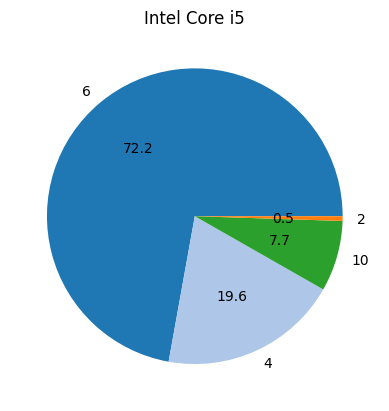

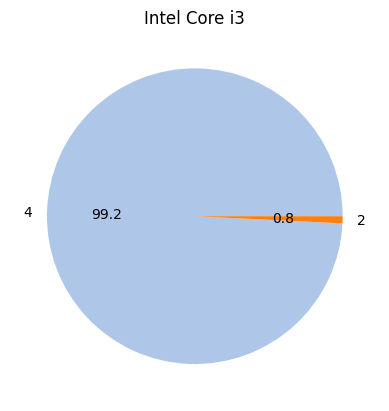

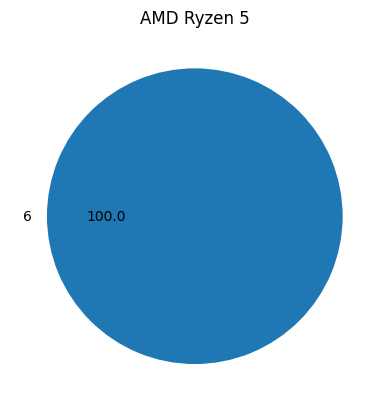

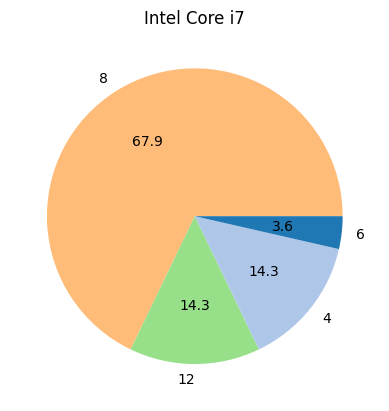

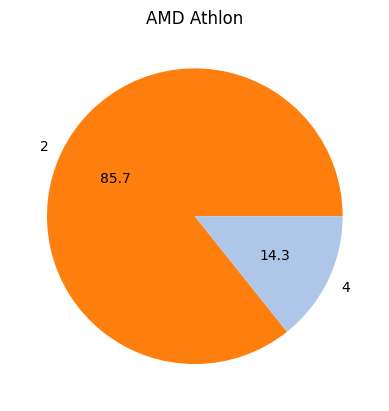

In [ ]:
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  vol_core_counts = df['num_core'].value_counts()[:5]
  labels_volcore = vol_core_counts.index
  plt.title(t_proc)
  plt.pie(vol_core_counts, labels=labels_volcore, colors=[colors[key] for key in labels_volcore], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является наличие у каждого типа процессоров доминирующего количества ядер. Наиболее часто встечающиеся значения того или иного количества ядер наблюдается в диапазоне от 67,9 до 100%.
2.  Подавляющее большинство компьютеров в датасете с процессором Intel Core i5 имеет 6 ядер. Доля их составляет 72,2%. Компьютеры с вышеуказанным процессором с 4 ядрами имеет долю 19,6%. Процессоры с 10 ядрами имеют долю 7,7%. С 2 ядрами - 0,5%.
3.  Компьютеры с процессором Intel Core i3 по количеству ядер реализуются двух видов. Доминирует наличие 4 ядер. Доля их составляет 92,2%. Компьютеры с вышеуказанным процессором с 2 ядрами имеет долю 0,8%.
4.  Компьютеры с процессором AMD Ryzen реализуются безальтернативно исключительно с 6 ядрами.
5.  Компьютеры с процессором Intel Core i7 по количеству ядер реализуются черырех видов. Доминирует наличие 8 ядер. Доля их составляет 67,9%. Компьютеры с вышеуказанным процессором с 12 ядрами имеет долю 14,3%. Процессоры с 4 ядрами имеют долю 14,3%. С 6 ядрами - 3,6%.
6.   Компьютеры с процессором AMD Atlon по количеству ядер реализуются двух видов. Доминирует наличие 2 ядер. Доля их составляет 85,7%. Компьютеры с вышеуказанным процессором с 4 ядрами имеет долю 14,3%.

По аналогии проанализируйте взаимосвязь между рейтингом фильмов и кинорежиссерами

#### *2.4.3 Тип процессора - Тип памяти*

Сохранение уникального значения признака, определенного с помощью метода unique(), в переменную и определение их количества с помощью функции len()

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
len(new_ds['type_proc'].unique())

22

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

Определение топ-5 значений с помощью метода value_counts() и среза, вывод их списка при помощи атрибута index и сохранение его в переменную.

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Для корректного визуального представления распределения признака создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
#labels = new_ds['Видеопроцессор'].unique()
labels = new_ds['type_memory'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys(['DDR 4', 'DDR 3'])

Для каждого значения топ-5 строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку и сохраняется в переменную df; сохраняется топ-5 классов значений, определенных с помощью метода value_counts() и среза, в переменную certificate_counts; вывод списка уникальных значений топ-5 классов с помощью атрибута index и сохранение его в переменную labels; в качестве названия диаграммы передается признак с помощью метода title(); построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

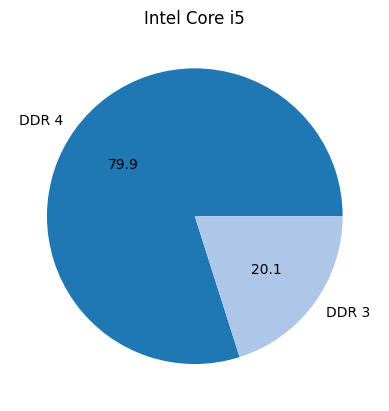

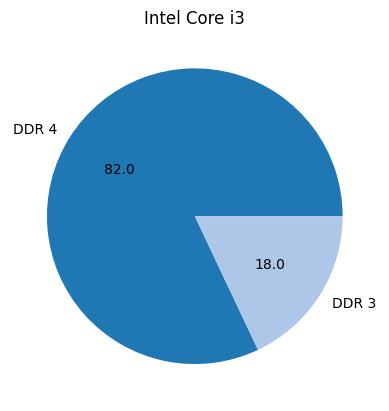

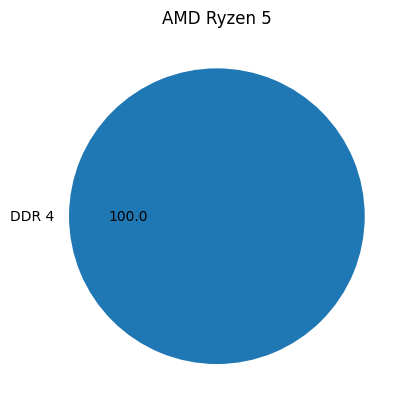

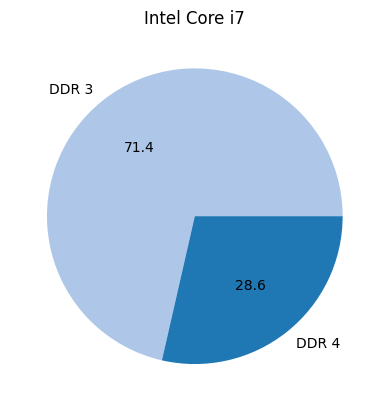

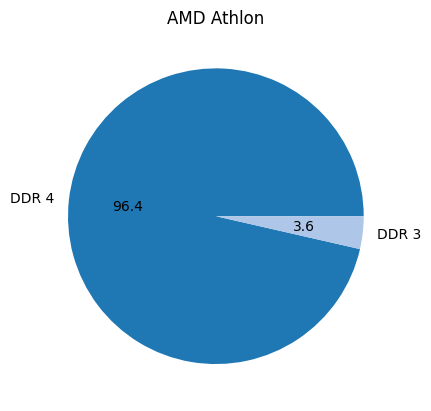

In [ ]:
#labels=labels_videoproc,
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  type_memory_counts = df['type_memory'].value_counts()[:5]
  labels_typememory = type_memory_counts.index
  plt.title(t_proc)
  plt.pie(type_memory_counts, labels=labels_typememory, colors=[colors[key] for key in labels_typememory], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью большинства реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное наличие 2-х типов памяти DDR3 и DDR4. Это вполне логично: при увеличении тактовой частоты процессора должна увеличиваться и частота оперативной памяти.
2.  Подавляющее большинство компьютеров в датасете с процессором Intel Core i5 имеет тип памяти DDR4. Доля её составляет 79,9%. Компьютеры с вышеуказанным процессором и типом памяти DDR3 имеют долю 20,1%.
3.  Компьютеры с процессором Intel Core i3 в 82,0% используют DDR4. Компьютеры с вышеуказанным процессором и типом памяти DDR3 имеют долю 18,0%.
4.  Компьютеры с процессором AMD Ryzen реализуются безальтернативно исключительно c DDR4.
5.  У компьютеров с процессором Intel Core i7 доминирует память DDR3. Это обстоятельство выбивается из общего правила. Компьютеры с процессором Intel Core i7 используют DDR3 в 71,4% случаев. Компьютеры с вышеуказанным процессором и типом памяти DDR4 имеют долю 29,6%.
6.  Компьютеры с процессором AMD Athlon в 96,4% случаев используют DDR4. Компьютеры с вышеуказанным процессором и типом памяти DDR3 имеют долю 3,6%.


#### *2.4.4 Тип процессора - Объем памяти*


Сохранение уникального значения признака, определенного с помощью метода unique(), в переменную и определение их количества с помощью функции len()

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
len(new_ds['type_proc'].unique())

22

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Для корректного визуального представления распределения признака создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
#labels = new_ds['Видеопроцессор'].unique()
labels = new_ds['vol_memory'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys([16, 8, 32, 4, 64, 6])

Для каждого значения топ-5 строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку и сохраняется в переменную df; сохраняется топ-5 классов значений, определенных с помощью метода value_counts() и среза, в переменную certificate_counts; вывод списка уникальных значений топ-5 классов с помощью атрибута index и сохранение его в переменную labels; в качестве названия диаграммы передается признак с помощью метода title(); построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

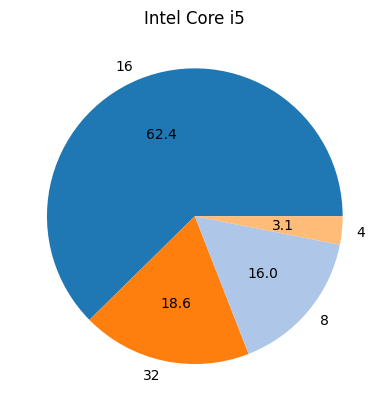

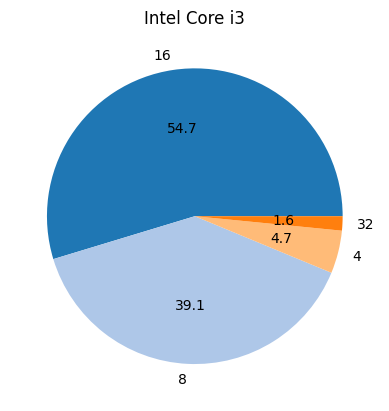

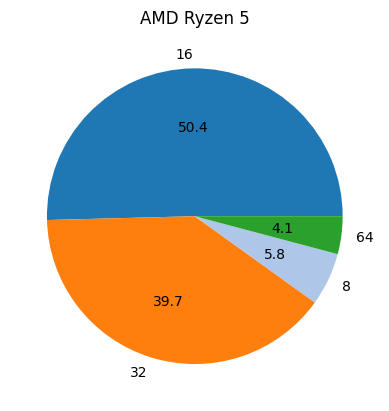

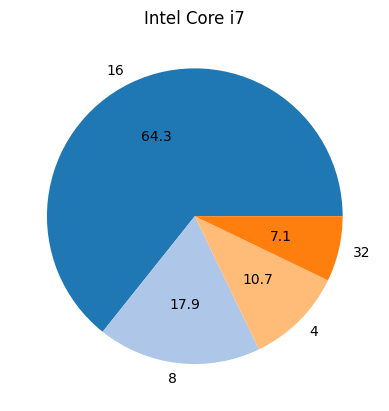

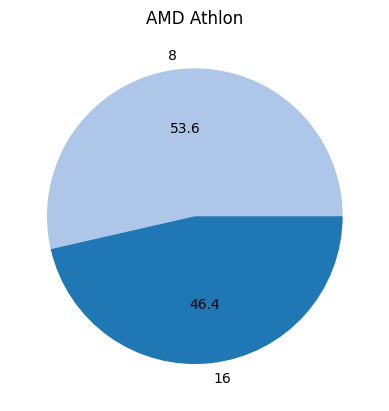

In [ ]:
#labels=labels_videoproc,
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  vol_memory_counts = df['vol_memory'].value_counts()[:5]
  labels_volmemory = vol_memory_counts.index
  plt.title(t_proc)
  plt.pie(vol_memory_counts, labels=labels_volmemory, colors=[colors[key] for key in labels_volmemory], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное преобладание объема памяти в размере 16ГБ. Компьютеры с четырьмя процессорами из 5 имеют оперативную память в 16ГБ.
2.  Подавляющее большинство компьютеров в датасете с процессором Intel Core i5 имеет объем 16ГБ. Доля их составляет 62,4%. Компьютеры с вышеуказанным процессором с 32ГБ памяти имеют долю 18,6%, с 8ГБ  имеют долю 16,0%, с 4ГБ - 3,1%.
3.  Компьютеры с процессором Intel Core i3 и оперативной памятью 16ГБ имеют  долю 54,7%. Компьютеры с вышеуказанным процессором с 8ГБ имеет долю 39,1%, с 4ГБ  имеют долю 4,7%, с 32ГБ - 1,6%.
4.  Компьютеры с процессором AMD Ryzen 5 и оперативной памятью 16ГБ имеют  долю 50,4%. Компьютеры с вышеуказанным процессором с 32ГБ имеет долю 39,7%, с 8ГБ  имеют долю 5,8%, с 64ГБ - 4,1%.
5.  Компьютеры с процессором Intel Core i7 и оперативной памятью 16ГБ имеют  долю 64,3%. Компьютеры с вышеуказанным процессором с 8ГБ имеет долю 17,9%, с 4ГБ  имеют долю 10,7%, с 32ГБ - 7,1%.
6.  Компьютеры с процессором AMD Athlon и оперативной памятью 8ГБ имеют  долю 53,6%. Компьютеры с вышеуказанным процессором с 16ГБ имеет долю 46,4%.


#### *2.4.5 Тип процессора - Диск HDD*


Сохранение уникального значения признака, определенного с помощью метода unique(), в переменную и определение их количества с помощью функции len()

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
len(new_ds['type_proc'].unique())

22

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Для корректного визуального представления распределения признака создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
#labels = new_ds['Видеопроцессор'].unique()
labels = new_ds['Диск HDD'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys(['0', '1000', '500', '2000', '512', '250'])

Для каждого значения топ-5 строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку и сохраняется в переменную df; сохраняется топ-5 классов значений, определенных с помощью метода value_counts() и среза, в переменную certificate_counts; вывод списка уникальных значений топ-5 классов с помощью атрибута index и сохранение его в переменную labels; в качестве названия диаграммы передается признак с помощью метода title(); построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

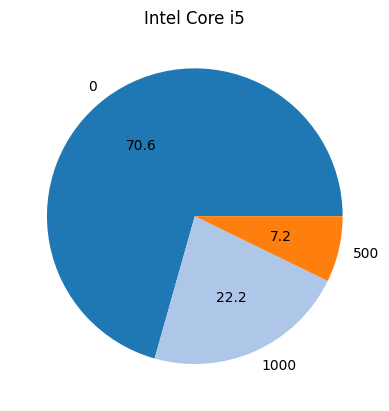

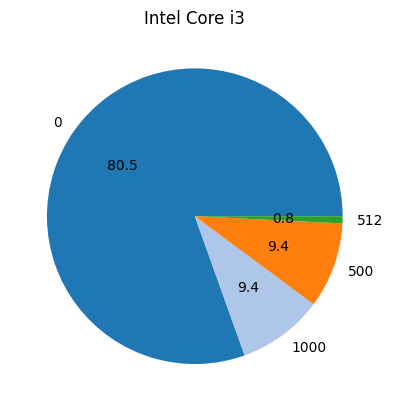

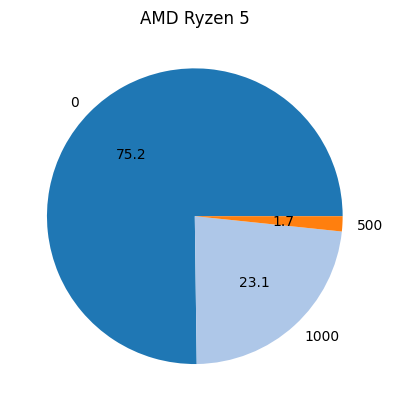

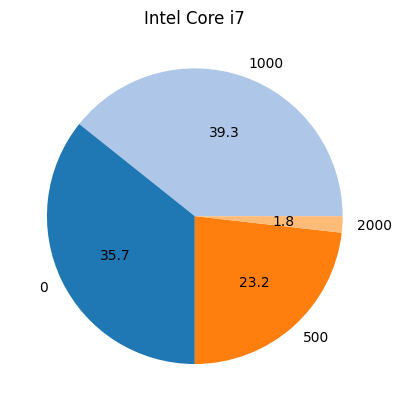

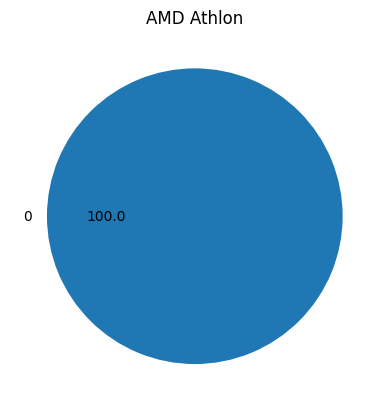

In [ ]:
#labels=labels_videoproc,
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  disk_hdd_counts = df['Диск HDD'].value_counts()[:5]
  labels_diskhdd = disk_hdd_counts.index
  plt.title(t_proc)
  plt.pie(disk_hdd_counts, labels=labels_diskhdd, colors=[colors[key] for key in labels_diskhdd], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное отсутствие дисков HDD.
2.  Подавляющее большинство компьютеров в датасете с процессором Intel Core i5 не имеет диска HDD. Доля таких компьютеров составляет 70,6%. Компьютеры с вышеуказанным процессором и с 1000ГБ памяти имеют долю 22,2%, с 500ГБ - 7,2%.
3.  Компьютеры с процессором Intel Core i3 и отсутствием диска HDD имеют  долю 80,5%. Компьютеры с вышеуказанным процессором с 1000ГБ имеет долю 9,4%, с 500ГБ  имеют долю 9,4%, с 512ГБ - 0,8%.
4.  Компьютеры с процессором AMD Ryzen 5 и отсутствием диска HDD имеют  долю 75,2%. Компьютеры с вышеуказанным процессором с 1000ГБ имеет долю 23,1%, с 500ГБ  имеют долю 1,7%
5.  Компьютеры с процессором Intel Core i7 и отсутствием диска HDD имеют  долю 35,7%. Компьютеры с вышеуказанным процессором с 1000ГБ имеет долю 39,3%, с 500ГБ  имеют долю 23,2%, с 2000ГБ - 1,8%.
6.  Компьютеры с процессором AMD Athlon безальтернативно не имеют жеского диска типа HDD.


#### *2.4.6 Тип процессора - Диск SSD*


Сохранение уникального значения признака, определенного с помощью метода unique(), в переменную и определение их количества с помощью функции len()

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
len(new_ds['type_proc'].unique())

22

Проведите неграфический структурный анализ признака с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()

Intel Core i5                194
Intel Core i3                128
AMD Ryzen 5                  121
Intel Core i7                 56
                            ... 
Intel J3455                    1
Intel Core 12400F              1
Gemini Lake Refresh J4115      1
AMD Radeon RX 570              1
Name: type_proc, Length: 22, dtype: int64

Определите топ-5 кинорежиссеров с помощью метода value_counts() и среза, выведите их список при помощи атрибута index и сохраните его в переменную directors_top_5

In [ ]:
type_proc_top_5 = new_ds['type_proc'].value_counts()[:5].index
type_proc_top_5

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Для корректного визуального представления распределения признака создется словарь, в котором каждому классу будет присвоен соответствующий цвет из выбранной цветовой палитры tab20. Для этого в переменную labels сохраняются уникальные значения признака, затем в переменную colors сохраняется словарь, сформированный с помощью функции dict() из объединенных (с помощью функции zip()) попарно значения классов, сохраненных в переменной labels, и цветов из палитры tab20, выбранных по длине (len()) labels, с помощью выражения plt.cm.tab20.colors

In [ ]:
labels = new_ds['Диск SSD'].value_counts()[:20].index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))
colors.keys()

dict_keys(['480', '240', '512', '960', '120', '256', '500', '0', '1000', '128', '250', '1480', '1024', '2000', '1240'])

Для каждого значения топ-5 строятся круговые диаграммы с помощью метода pie(). Для этого фильтруется исходный датасет по признаку и сохраняется в переменную df; сохраняется топ-5 классов значений, определенных с помощью метода value_counts() и среза, в переменную certificate_counts; вывод списка уникальных значений топ-5 классов с помощью атрибута index и сохранение его в переменную labels; в качестве названия диаграммы передается признак с помощью метода title(); построение диаграммы, передав в нее в качестве параметров значения (values), подписи (labels), цвета (colors) и подписи значения в виде процентов autopct='%.1f'

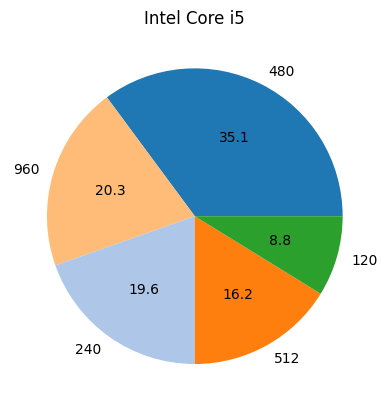

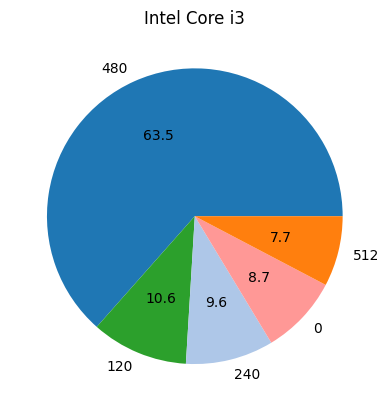

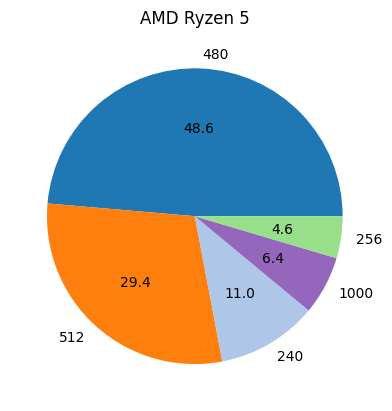

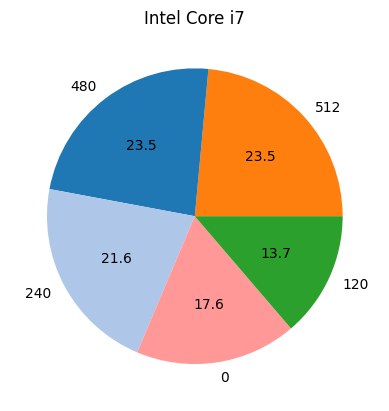

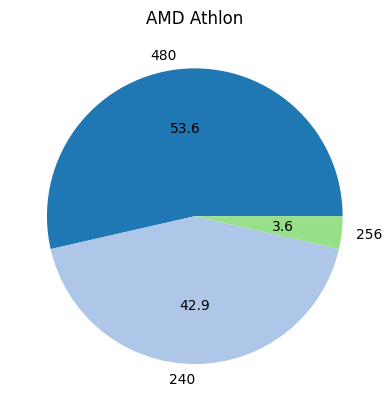

In [ ]:
#labels=labels_videoproc,
for t_proc in type_proc_top_5:
  df = new_ds[new_ds['type_proc']==t_proc]
  disk_ssd_counts = df['Диск SSD'].value_counts()[:5]
  labels_diskssd = disk_ssd_counts.index
  plt.title(t_proc)
  plt.pie(disk_ssd_counts, labels=labels_diskssd, colors=[colors[key] for key in labels_diskssd], autopct='%.1f')
  plt.show()

**Выводы:**

####***Выводы по связи признаков:***
1.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное наличие дисков SSD.
2.  С точки зрения связи рассматриваемых признаков, следует отметить наблюдающееся преобладание дисков с объемом 480ГБ в сочетании с топ-5 процессоров.
3.  Совершенно парадоксальным являются наблюдаемые факты  несоизмеримости долей дисков с приблизительно равным объемом дискового пространства.
4. Также имеют место случаи равенства долей дисков с неравным объемом дискового пространства.
5.  Встречаются случаи превышения долей дисков с меньшим объемом над дисками большего объема.
6.  Компьютеры в датасете с процессором Intel Core i5 имеют только диски SSD. Доля компьютеров с дисковым пространством 480 ГБ составляет 35,1%. Компьютеры с вышеуказанным процессором и с 960ГБ памяти имеют долю 20,3%, с 240ГБ - 19,6%, с 512ГБ - 16,2%, с 120ГБ - 8,8%,.
7.  Компьютеры с процессором Intel Core i3 имеют диски HDD. Доля этих дисков составляет 8,7%. Доля компьютеров с дисковым пространством 480 ГБ составляет 63,5%. Компьютеры с вышеуказанным процессором с 120ГБ имеет долю 10,6%, с 240ГБ  имеют долю 9,6%, с 512ГБ - 7,7%.
8.  Компьютеры с процессором AMD Ryzen 5, в них доля компьютеров с дисковым пространством 480 ГБ составляет 48,6%. Компьютеры с вышеуказанным процессором с 512ГБ имеет долю 29,4%, с 240ГБ  имеют долю 11,0%, с 1000ГБ - 6,4%, с 256ГБ - 4,6%.
9.  Компьютеры с процессором Intel Core i7 и отсутствием диска HDD имеют долю 17,6%. Компьютеры с вышеуказанным процессором и с дисковым пространством 480ГБ и 512ГБ имеют равные доли, которые составляют 23,5%. Компьютеры с вышеуказанным процессором с 240ГБ имеет долю 21,6%, с 120ГБ  имеют долю 13,7%.
10.  Компьютеры с процессором AMD Athlon в них доля компьютеров с дисковым пространством 480 ГБ составляет 53,6%. Компьютеры с вышеуказанным процессором с 240ГБ имеет долю 42,9%, с 256ГБ  имеют долю 3,6%.


### Выводы по разделу
1.  Характерной особенностью компьютеров с процессорами intel Core i5, intel Core i3 является то, что они практически в равных долях (порядка от 10 до 30%) укомплектованы такми видеопроцессорами как: NVIDIA GeForce RTX 3050, NVIDIA GeForce RTX 3060, Intel HD Graphics 2000, NVIDIA GeForce GTX 1650, NVIDIA GeForce GTX 1660, Intel UHD Graphics 630, NVIDIA GeForce GT 1030. В компьютерах с другими типами процессоров, преимущественный вес (более 50%) занимают комплектации тем или иным видеопроцессором.
2.  В разделе 2.2 установлено, что в реализуемых компьютерах наиболее часто встречаются процессоры intel Core i5. В настоящем разделе при анализе взаимосвязи наблюдается, что компьютеры с вышеуказанными процессорами на 31,3% укомплектованы видеопроцессором NVIDIA GeForce RTX 3050.
3.  Отсуствует повторяемость видеопроцессоров в сочетании с признаком "Тип процессора". Таким образом, не наблюдается преоритезации типа видеопроцессора для всех процессоров.
4.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является наличие у каждого типа процессоров доминирующего количества ядер. Наиболее часто встечающиеся значения того или иного количества ядер наблюдается в диапазоне от 67,9 до 100%. Наиболее часто встречающиеся компьютеры имеют от 2 до 8 ядер процессора.
5.   Характерной особенностью большинства реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное наличие 2-х типов памяти DDR3 и DDR4. Причем, наблюдается подавляющее доминирование оперативной памяти типа DDR4.
6.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное преобладание объема памяти в размере 16ГБ. Компьютеры с четырьмя процессорами из 5 имеют оперативную память в 16ГБ.
7.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное отсутствие дисков HDD.
8.  Характерной особенностью реализуемых компьютеров, отраженных в рассматриваемом датасете, является преимущественное наличие дисков SSD.
9.  С точки зрения связи рассматриваемых признаков, следует отметить наблюдающееся преобладание дисков с объемом 480ГБ в сочетании с топ-5 процессоров.
10.  Совершенно парадоксальным являются наблюдаемые факты  несоизмеримости долей дисков с приблизительно равным объемом дискового пространства.
11. Также имеют место случаи равенства долей дисков с неравным объемом дискового пространства.
12.  Встречаются случаи превышения долей дисков с меньшим объемом над дисками большего объема.


### 2.5 Анализ взаимосвязи количественного и категориального признаков

Выполнение анализа взаимосвязи категориального и количественного признаков

#### *2.5.1 Тип процессора - price*


Оценка медианных значений. Группировка датасета по признаку с помощью метода groupby и к Series применяется метод median().

In [ ]:
new_ds.groupby('type_proc')['price'].median().sort_values(ascending=False)

type_proc
AMD Ryzen 7                  92656.0
Intel Core 12400F            85177.0
Intel Core i5                65115.0
Intel Xeon                   44160.0
                              ...   
Gemini Lake Refresh J4115    16005.0
Intel J3455                  16005.0
Intel J4125                  13179.5
AMD E1-6010                  12500.0
Name: price, Length: 22, dtype: float64

Оценка описательных статистик значений с методом describe()

In [ ]:
new_ds.groupby('type_proc')['price'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
type_proc,,,,,,,,
AMD Ryzen 7,2.0,92656.000000,11913.335049,84232.0,88444.00,92656.0,96868.00,101080.0
Intel Core 12400F,1.0,85177.000000,NaN,85177.0,85177.00,85177.0,85177.00,85177.0
Intel Core i5,194.0,61268.536082,22993.856668,17553.0,46105.75,65115.0,79191.00,102703.0
Intel Xeon,7.0,41427.428571,12395.149022,20794.0,35534.00,44160.0,47085.50,59799.0
...,...,...,...,...,...,...,...,...
Gemini Lake Refresh J4115,1.0,16005.000000,NaN,16005.0,16005.00,16005.0,16005.00,16005.0
Intel J3455,1.0,16005.000000,NaN,16005.0,16005.00,16005.0,16005.00,16005.0
Intel J4125,2.0,13179.500000,211.424928,13030.0,13104.75,13179.5,13254.25,13329.0
AMD E1-6010,1.0,12500.000000,NaN,12500.0,12500.00,12500.0,12500.00,12500.0


Построение диаграммы "ящик с усами" с помощью метода boxplot()

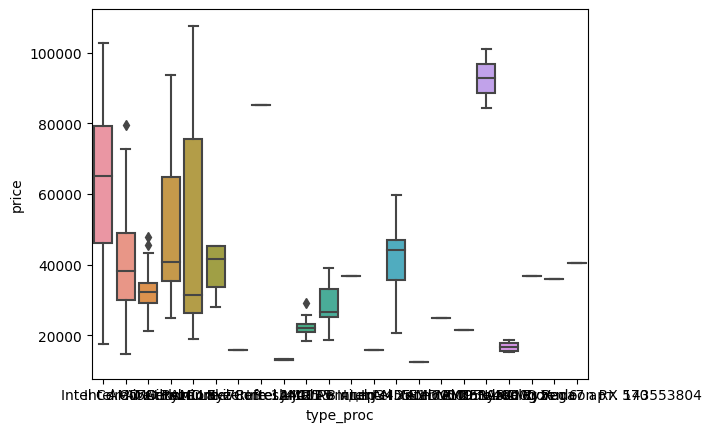

In [ ]:
sns.boxplot(x=new_ds['type_proc'], y=new_ds['price'], data=new_ds)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов и ее нагруженностью по количеству значений типов процессоров. Оценка количества значений типов процессоров с помощью метода value_counts()

In [ ]:
new_ds['type_proc'].value_counts()[:7]

Intel Core i5    194
Intel Core i3    128
AMD Ryzen 5      121
Intel Core i7     56
AMD Athlon        28
AMD A6            19
Intel Pentium     15
Name: type_proc, dtype: int64

По итогу оценки видно, что крупных типов - 5, поэтому ограничим диаграмму топ-5 типов. Для этого сохраняется список топ-5 типов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную.

In [ ]:
typeProc_list = new_ds['type_proc'].value_counts()[:5].index
typeProc_list

Index(['Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7',
       'AMD Athlon'],
      dtype='object')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape

In [ ]:
ds_typeProc_top_5 = new_ds[new_ds['type_proc'].isin(typeProc_list)]
ds_typeProc_top_5.shape

(527, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения price, а в качестве y - тип процессора, при этом ограничив значение оси х на отметке 110000 с помощью функции plt.axis() и параметров хmin и хmax

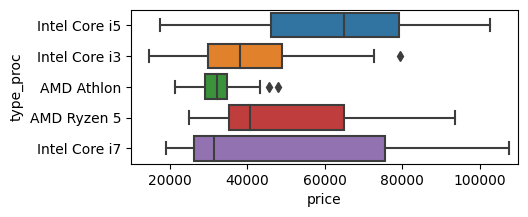

In [ ]:
f, ax = plt.subplots(figsize=(5, 2))
sns.boxplot(x='price', y='type_proc', data=ds_typeProc_top_5)
plt.axis(xmin=10000, xmax=110000)
plt.show()

In [ ]:
new_ds.groupby('type_proc')['price'].describe().sort_values('count', ascending=False)[:5]

,count,mean,std,min,25%,50%,75%,max
type_proc,,,,,,,,
Intel Core i5,194.0,61268.536082,22993.856668,17553.0,46105.75,65115.0,79191.00,102703.0
Intel Core i3,128.0,40191.992188,14622.606455,14800.0,29944.00,38105.5,48984.75,79539.0
AMD Ryzen 5,121.0,49635.752066,18003.353678,24995.0,35369.00,40694.0,64909.00,93592.0
Intel Core i7,56.0,49311.375000,30741.977817,19060.0,26334.25,31564.5,75535.75,107521.0
AMD Athlon,28.0,32890.250000,6855.130145,21355.0,29173.25,32355.5,34909.75,47899.0


**Выводы:**

#### *Выводы по связи признаков*
1.   Наблюдается некоторая зависимость цены от типа процессора. Средние значения расположены в интервале от 32890,3 до 61268,5 руб., медианные от 31564,3 до 65115,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам процессоров. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 17553,0 до 102703,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 6855,1 до 30742,0 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы любым из типов процессоров.

#### *2.5.2 Кол-во ядер - price*


Анализ взаимосвязи между количеством ядер процессора и ценой

Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median()

In [ ]:
new_ds.groupby('num_core')['price'].median().sort_values(ascending=False)

num_core
12    93114.5
10    86946.0
6     59836.0
24    47211.0
4     35389.0
8     28786.0
2     26999.0
Name: price, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe()

In [ ]:
new_ds.groupby('num_core')['price'].describe().sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
num_core,,,,,,,,
6,268.0,59552.914179,19648.842145,24995.0,39387.0,59836.0,76203.25,107521.0
8,43.0,38565.767442,24719.488685,19060.0,24695.5,28786.0,32876.00,104840.0
12,10.0,85074.200000,22830.723105,44160.0,78678.0,93114.5,102989.00,103671.0
10,15.0,86335.133333,13991.629032,52041.0,85060.0,86946.0,94886.00,102703.0
4,194.0,37505.886598,15015.393837,13030.0,24843.0,35389.0,46797.00,79539.0
2,65.0,27235.553846,7651.297127,12500.0,21386.0,26999.0,32426.00,47899.0
24,1.0,47211.000000,NaN,47211.0,47211.0,47211.0,47211.00,47211.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с параметрами в качестве x - значения категориального признака, а в качестве y - количественного.

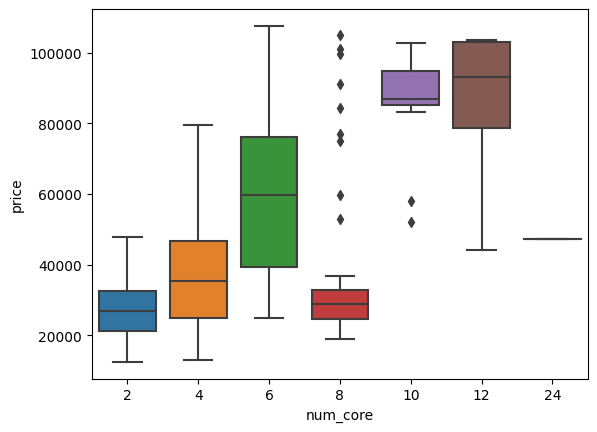

In [ ]:
sns.boxplot(x=new_ds['num_core'], y=new_ds['price'], data=new_ds)
plt.show()

На диаграмме присутствуют некритичные выбросы. Оценка количества значений категориального признака с помощью метода value_counts().

In [ ]:
new_ds['num_core'].value_counts()

6     268
4     194
2      65
8      43
10     15
12     10
24      1
Name: num_core, dtype: int64

По итогу оценки видно, что крупных классов - 5, поэтому ограничим диаграмму топ-5 классов. Для этого сохраняется список топ-5 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную.

In [ ]:
numCore_list = new_ds['num_core'].value_counts()[:5].index
numCore_list

Int64Index([6, 4, 2, 8, 10], dtype='int64')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape.

In [ ]:
numCore_list_top_5 = new_ds[new_ds['num_core'].isin(numCore_list)]
numCore_list_top_5.shape

(585, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), при этом ограничив значение оси y с помощью функции plt.axis() и параметров ymin и ymax.

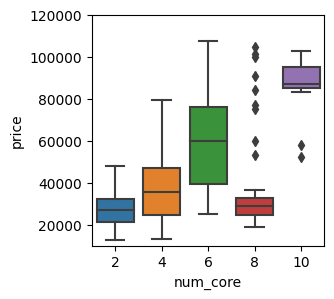

In [ ]:
f, ax = plt.subplots(figsize=(3, 3))
sns.boxplot(x='num_core', y='price', data=numCore_list_top_5)
plt.axis(ymin=10000, ymax=120000)
plt.show()

In [ ]:
new_ds.groupby('num_core')['price'].describe().sort_values('count', ascending=False)[:5]

,count,mean,std,min,25%,50%,75%,max
num_core,,,,,,,,
6,268.0,59552.914179,19648.842145,24995.0,39387.0,59836.0,76203.25,107521.0
4,194.0,37505.886598,15015.393837,13030.0,24843.0,35389.0,46797.00,79539.0
2,65.0,27235.553846,7651.297127,12500.0,21386.0,26999.0,32426.00,47899.0
8,43.0,38565.767442,24719.488685,19060.0,24695.5,28786.0,32876.00,104840.0
10,15.0,86335.133333,13991.629032,52041.0,85060.0,86946.0,94886.00,102703.0


**Выводы:**

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от количества ядер процессора. Средние значения расположены в интервале от 27235,6 до 86335,1 руб., медианные от 26999,0 до 86946,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 12500,0 до 107521,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 7651,3 до 24719,5 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы процессоррм с любым количеством ядер.

#### *2.5.3 Тип памяти - price*

Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median().

In [ ]:
new_ds.groupby('type_memory')['price'].median().sort_values(ascending=False)

type_memory
DDR 4    47984.0
DDR 3    24786.0
Name: price, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe().

In [ ]:
new_ds.groupby('type_memory')['price'].describe().sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
type_memory,,,,,,,,
DDR 4,487.0,52978.577002,22098.763064,13030.0,35256.5,47984.0,70110.0,107521.0
DDR 3,109.0,28049.311927,11948.668410,12500.0,20794.0,24786.0,30360.0,73950.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с параметрами в качестве x - значения категориального признака, а в качестве y - количественного.

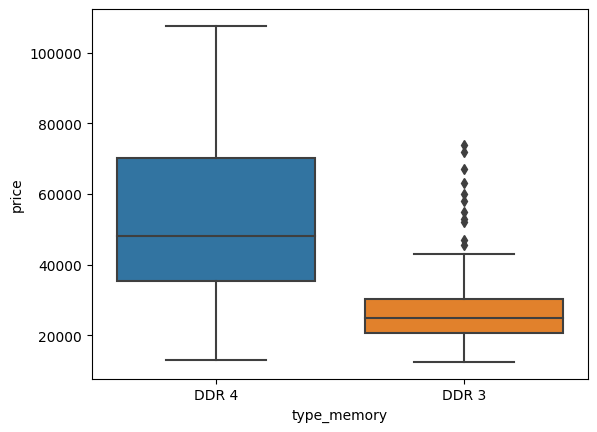

In [ ]:
sns.boxplot(x=new_ds['type_memory'], y=new_ds['price'], data=new_ds)
plt.show()

На диаграмме присутсвуют некритичные выбросы. Оценка количества значений классов с помощью метода value_counts().

In [ ]:
new_ds['type_memory'].value_counts()

DDR 4    487
DDR 3    109
Name: type_memory, dtype: int64

По итогу оценки видно, что классов - 2. Сохраняется список топ-2 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную certificate_list

In [ ]:
typeMemory_list = new_ds['type_memory'].value_counts()[:2].index
typeMemory_list

Index(['DDR 4', 'DDR 3'], dtype='object')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape

In [ ]:
typeMemory_top_2 = new_ds[new_ds['type_memory'].isin(typeMemory_list)]
typeMemory_top_2.shape

(596, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения price, а в качестве y - type_memory, при этом ограничив значение оси х на отметке 110000 с помощью функции plt.axis() и параметров хmin и хmax

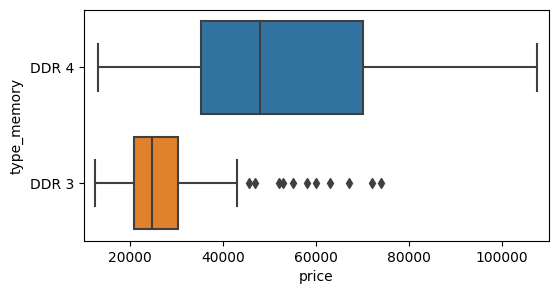

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='price', y='type_memory', data=typeMemory_top_2)
plt.axis(xmin=10000, xmax=110000)
plt.show()

**Выводы:**

Напишите выводы по разделу:
1.   О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2.   Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3.   О средних величинах (как распределена медиана).

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от количества ядер процессора. Средние значения расположены в интервале от 27235,6 до 86335,1 руб., медианные от 26999,0 до 86946,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 12500,0 до 107521,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 7651,3 до 24719,5 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы процессором с любым количеством ядер.

#### *2.5.4 Объем памяти - price*


Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median().

In [ ]:
new_ds.groupby('vol_memory')['price'].median().sort_values(ascending=False)

vol_memory
32    58047.0
64    57201.0
16    50238.5
8     31237.0
4     20457.5
6     16005.0
Name: price, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe().

In [ ]:
new_ds.groupby('vol_memory')['price'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
vol_memory,,,,,,,,
32,91.0,61051.065934,21926.979684,32146.0,40047.00,58047.0,81055.00,107521.0
64,5.0,54152.600000,5294.457319,46532.0,50671.00,57201.0,57859.00,58500.0
16,330.0,53906.127273,22183.198062,18759.0,35052.00,50238.5,72605.00,104840.0
8,141.0,32838.588652,12442.481776,13030.0,23616.00,31237.0,38186.00,75729.0
4,28.0,21295.142857,4927.851013,12500.0,17543.25,20457.5,24496.25,32544.0
6,1.0,16005.000000,NaN,16005.0,16005.00,16005.0,16005.00,16005.0


Построение диаграммы "ящик с усами" с помощью метода boxplot()

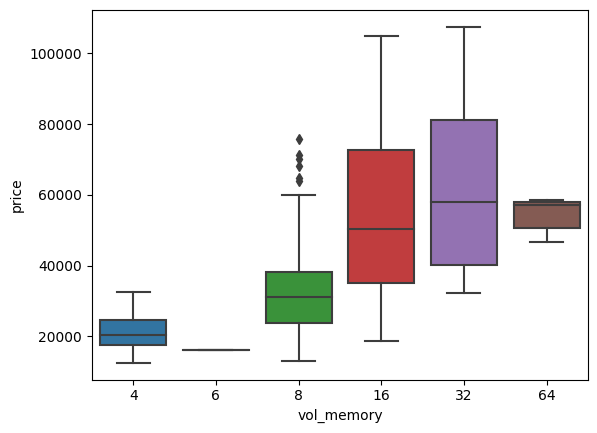

In [ ]:
sns.boxplot(x=new_ds['vol_memory'], y=new_ds['price'], data=new_ds)
plt.show()

На диаграмме присутствуют некритичные выбросы. Оценка количества значений категориального признака с помощью метода value_counts().

In [ ]:
new_ds['vol_memory'].value_counts()

16    330
8     141
32     91
4      28
64      5
6       1
Name: vol_memory, dtype: int64

По итогу оценки видно, что крупных классов - 3, поэтому ограничим диаграмму топ-3 классов. Для этого сохраняется список топ-3 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную.

In [ ]:
volMemory_list = new_ds['vol_memory'].value_counts()[:3].index
volMemory_list

Int64Index([16, 8, 32], dtype='int64')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape.

In [ ]:
volMemory_list_top_3 = new_ds[new_ds['vol_memory'].isin(volMemory_list)]
volMemory_list_top_3.shape

(562, 10)

Постройте диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения классов, а в качестве y - доход с фильмов, при этом ограничив значение оси y на отметке 120000 с помощью функции plt.axis() и параметров ymin и ymax

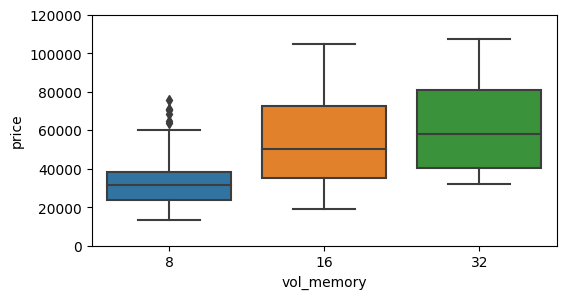

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='vol_memory', y='price', data=volMemory_list_top_3)
plt.axis(ymin=0, ymax=120000)
plt.show()

In [ ]:
new_ds.groupby('vol_memory')['price'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
vol_memory,,,,,,,,
16,330.0,53906.127273,22183.198062,18759.0,35052.00,50238.5,72605.00,104840.0
8,141.0,32838.588652,12442.481776,13030.0,23616.00,31237.0,38186.00,75729.0
32,91.0,61051.065934,21926.979684,32146.0,40047.00,58047.0,81055.00,107521.0
4,28.0,21295.142857,4927.851013,12500.0,17543.25,20457.5,24496.25,32544.0
64,5.0,54152.600000,5294.457319,46532.0,50671.00,57201.0,57859.00,58500.0
6,1.0,16005.000000,NaN,16005.0,16005.00,16005.0,16005.00,16005.0


**Выводы:**

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от объема оперативной памяти. Средние значения расположены в интервале от 16005,0 до 61051,1 руб., медианные от 16005,0 до 58047,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 12500,0 до 107521,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 0 до 22183,2 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы оперативной памятью любого объема в интервале от 4 до 64ГБ.

#### *2.5.5 Диск HDD - price*


Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median().

In [ ]:
new_ds.groupby('Диск HDD')['price'].median().sort_values(ascending=False)

Диск HDD
2000    104840.0
1000     63136.0
512      54000.0
250      46960.0
0        40998.0
500      24092.0
Name: price, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe().

In [ ]:
new_ds.groupby('Диск HDD')['price'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Диск HDD,,,,,,,,
2000,1.0,104840.000000,NaN,104840.0,104840.00,104840.0,104840.00,104840.0
1000,108.0,60683.925926,24644.254329,20868.0,35479.75,63136.0,80484.00,107521.0
512,1.0,54000.000000,NaN,54000.0,54000.00,54000.0,54000.00,54000.0
250,1.0,46960.000000,NaN,46960.0,46960.00,46960.0,46960.00,46960.0
0,443.0,47228.422122,21124.526735,12500.0,32532.00,40998.0,63521.00,106496.0
500,42.0,28002.071429,14216.820996,15594.0,20151.75,24092.0,28536.75,79539.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с параметрами в качестве x - значения категориального признака, а в качестве y - количественного.

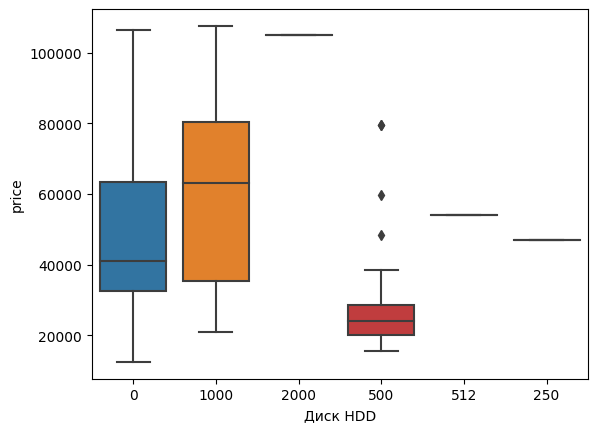

In [ ]:
sns.boxplot(x=new_ds['Диск HDD'], y=new_ds['price'], data=new_ds)
plt.show()

На диаграмме присутсвуют некритичные выбросы. Оценка количества значений классов с помощью метода value_counts().

In [ ]:
new_ds[['Диск HDD', 'Диск SSD']].value_counts()

Диск HDD  Диск SSD
0         480         173
          512          60
          240          56
          960          43
                     ... 
1000      500           1
0         2000          1
          1240          1
512       512           1
Length: 31, dtype: int64

In [ ]:
new_ds['Диск HDD'].value_counts()

0       443
1000    108
500      42
2000      1
512       1
250       1
Name: Диск HDD, dtype: int64

По итогу оценки видно, что крупных классов - 3, поэтому ограничим диаграмму топ-3 классов. Для этого сохраняется список топ-3 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную.

In [ ]:
diskHDD_list = new_ds['Диск HDD'].value_counts()[:3].index
diskHDD_list

Index(['0', '1000', '500'], dtype='object')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape.

In [ ]:
diskHDD_top_3 = new_ds[new_ds['Диск HDD'].isin(diskHDD_list)]
diskHDD_top_3.shape

(593, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), при этом ограничив значение оси y на отметке 120000 с помощью функции plt.axis() и параметров ymin и ymax

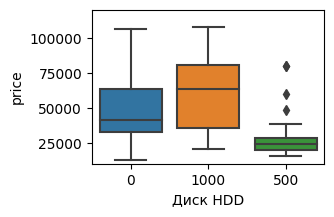

In [ ]:
f, ax = plt.subplots(figsize=(3, 2))
sns.boxplot(x='Диск HDD', y='price', data=diskHDD_top_3)
plt.axis(ymin=10000, ymax=120000)
plt.show()

In [ ]:
new_ds.groupby('Диск HDD')['price'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Диск HDD,,,,,,,,
0,443.0,47228.422122,21124.526735,12500.0,32532.00,40998.0,63521.00,106496.0
1000,108.0,60683.925926,24644.254329,20868.0,35479.75,63136.0,80484.00,107521.0
500,42.0,28002.071429,14216.820996,15594.0,20151.75,24092.0,28536.75,79539.0
2000,1.0,104840.000000,NaN,104840.0,104840.00,104840.0,104840.00,104840.0
250,1.0,46960.000000,NaN,46960.0,46960.00,46960.0,46960.00,46960.0
512,1.0,54000.000000,NaN,54000.0,54000.00,54000.0,54000.00,54000.0


**Выводы:**

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от диска HDD. Средние значения расположены в интервале от 28002,1 до 104840,0 руб., медианные от 24092,0 до 104840,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 15594,0 (12500 руб. - диск SSD) до 107521,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 0 до 24644,3 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы жесткими дисками HDD любого объема в интервале от 500 до 2000ГБ.

#### *2.5.6 Диск SSD - price*

Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median().

In [ ]:
new_ds.groupby('Диск SSD')['price'].median().sort_values(ascending=False)

Диск SSD
1024    100327.5
1480     95659.5
2000     86549.0
1240     86104.0
          ...   
240      29712.0
120      27358.0
0        22299.5
128      18052.0
Name: price, Length: 15, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe().

In [ ]:
new_ds.groupby('Диск SSD')['price'].describe().sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Диск SSD,,,,,,,,
1024,2.0,100327.500000,1516.744046,99255.0,99791.25,100327.5,100863.75,101400.0
1480,2.0,95659.500000,4247.590435,92656.0,94157.75,95659.5,97161.25,98663.0
2000,1.0,86549.000000,NaN,86549.0,86549.00,86549.0,86549.00,86549.0
1240,1.0,86104.000000,NaN,86104.0,86104.00,86104.0,86104.00,86104.0
...,...,...,...,...,...,...,...,...
240,89.0,39711.415730,20929.821564,17101.0,23279.00,29712.0,52000.00,103671.0
120,42.0,29524.214286,11651.520725,12500.0,20850.25,27358.0,33318.25,63749.0
0,24.0,23656.750000,6475.558027,15594.0,20044.00,22299.5,26488.50,47168.0
128,12.0,24885.000000,16171.167558,13030.0,15589.00,18052.0,26292.75,64827.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с параметрами в качестве x - значения категориального признака, а в качестве y - количественного.

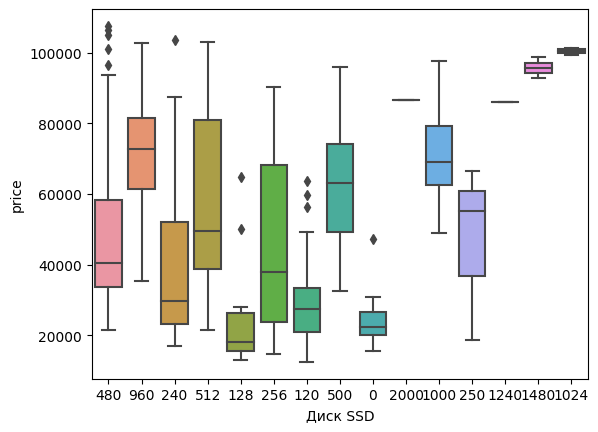

In [ ]:
sns.boxplot(x=new_ds['Диск SSD'], y=new_ds['price'], data=new_ds)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оценка количества значений классов с помощью метода value_counts().

In [ ]:
new_ds[['Диск HDD', 'Диск SSD']].value_counts()

Диск HDD  Диск SSD
0         480         173
          512          60
          240          56
          960          43
                     ... 
1000      500           1
0         2000          1
          1240          1
512       512           1
Length: 31, dtype: int64

In [ ]:
new_ds['Диск SSD'].value_counts()[:8]

480    211
240     89
512     84
960     43
120     42
256     37
500     28
0       24
Name: Диск SSD, dtype: int64

По итогу оценки видно, что крупных классов - 7 (0 - отсутствие диска), поэтому ограничим диаграмму топ-7 классов. Для этого сохраняется список топ-7 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную.

In [ ]:
diskSSD_list = new_ds['Диск SSD'].value_counts()[:7].index
diskSSD_list

Index(['480', '240', '512', '960', '120', '256', '500'], dtype='object')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape

In [ ]:
diskSSD_top_7 = new_ds[new_ds['Диск SSD'].isin(diskSSD_list)].sort_values('price', ascending=True)
diskSSD_top_7.shape

(534, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), при этом ограничив значение оси y на отметке 120000 с помощью функции plt.axis() и параметров ymin и ymax

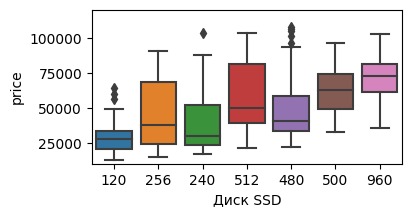

In [ ]:
f, ax = plt.subplots(figsize=(4, 2))
sns.boxplot(x='Диск SSD', y='price', data=diskSSD_top_7)
plt.axis(ymin=10000, ymax=120000)
plt.show()

In [ ]:
new_ds.groupby('Диск SSD')['price'].describe().sort_values('count', ascending=False)[:7]

,count,mean,std,min,25%,50%,75%,max
Диск SSD,,,,,,,,
480,211.0,47645.146919,18983.406701,21621.0,33701.50,40504.0,58199.50,107521.0
240,89.0,39711.415730,20929.821564,17101.0,23279.00,29712.0,52000.00,103671.0
512,84.0,57681.238095,22217.728678,21511.0,38900.75,49546.5,80980.75,103062.0
960,43.0,70057.116279,17962.709696,35476.0,61351.50,72672.0,81422.00,102703.0
120,42.0,29524.214286,11651.520725,12500.0,20850.25,27358.0,33318.25,63749.0
256,37.0,44835.351351,23605.817911,14800.0,23789.00,37998.0,68139.00,90380.0
500,28.0,61616.821429,16257.875929,32568.0,49239.25,63000.0,74212.50,95909.0


**Выводы:**

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от диска SSD. Средние значения расположены в интервале от 29524,2 до 70057,1 руб., медианные от 27358,0 до 72672,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 17101,0 до 107521,0 руб. при достаточно высоких величинах стандартного отклонения в диапазоне от 11651,5 до 23605,8 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы жесткими дисками SSD любого объема в интервале от 120 до 960ГБ.

#### *2.5.7 Видеопроцессор - price*


Оценка медианных значений количественного признака в разрезе категориального признака.  Выполняется группировка датасета по рассматриваемому признаку с помощью метода groupby и к Series метод median().

In [ ]:
new_ds.groupby('Видеопроцессор')['price'].median().sort_values(ascending=False)

Видеопроцессор
NVIDIA GeForce RTX 3060    87141.0
NVIDIA                     80000.0
AMD Radeon RX 6600         79539.0
NVIDIA GeForce RTX 3050    75314.0
                            ...   
Intel HD Graphics 6000     16005.0
Intel HD Graphics 500      16005.0
Intel UHD Graphics 600     15665.0
AMD                        12500.0
Name: price, Length: 39, dtype: float64

Оценка описательных статистик количественного признака в разрезе категориального признака, также группировка таблицы и применение метода describe().

In [ ]:
new_ds.groupby('Видеопроцессор')['price'].describe().sort_values('max', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Видеопроцессор,,,,,,,,
NVIDIA GeForce RTX 3060,49.0,89388.897959,9055.980541,72443.0,83232.0,87141.0,93592.0,107521.0
NVIDIA GeForce RTX 3050,78.0,76457.987179,9008.216031,62388.0,69681.0,75314.0,81055.0,102703.0
NVIDIA GeForce GTX 1660,39.0,65091.230769,11231.174020,43000.0,59855.5,64632.0,67218.0,97679.0
NVIDIA,3.0,71225.000000,31105.094036,36675.0,58337.5,80000.0,88500.0,97000.0
...,...,...,...,...,...,...,...,...
Intel UHD Graphics 600,3.0,16180.000000,1165.234311,15361.0,15513.0,15665.0,16589.5,17514.0
Intel HD Graphics 6000,1.0,16005.000000,NaN,16005.0,16005.0,16005.0,16005.0,16005.0
Intel HD Graphics 500,1.0,16005.000000,NaN,16005.0,16005.0,16005.0,16005.0,16005.0
AMD,1.0,12500.000000,NaN,12500.0,12500.0,12500.0,12500.0,12500.0


Построение диаграммы "ящик с усами" с помощью метода boxplot() с параметрами в качестве x - значения категориального признака, а в качестве y - количественного.

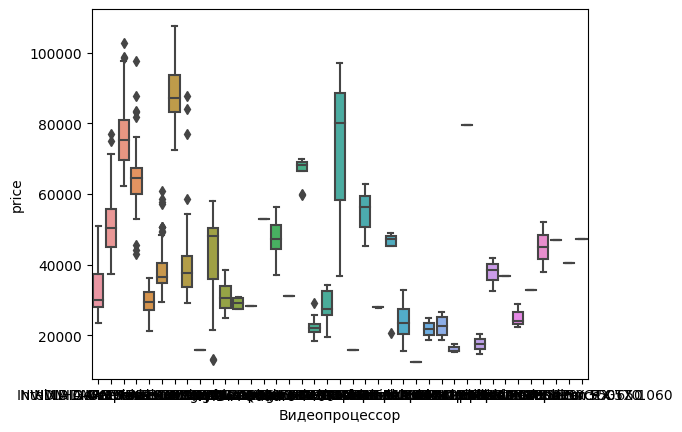

In [ ]:
sns.boxplot(x=new_ds['Видеопроцессор'], y=new_ds['price'], data=new_ds)
plt.show()

Диаграмма получилась малоинформативна в связи с наличием выбросов, а также ее нагруженностью по количеству значений классов. Оценка количества значений классов с помощью метода value_counts()

In [ ]:
new_ds['Видеопроцессор'].value_counts().head(8)

Intel HD Graphics 2000     81
NVIDIA GeForce RTX 3050    78
AMD Radeon Vega 7          75
NVIDIA GeForce GTX 1650    64
NVIDIA GeForce GT 1030     63
NVIDIA GeForce RTX 3060    49
NVIDIA GeForce GTX 1660    39
AMD Radeon Vega 3          20
Name: Видеопроцессор, dtype: int64

По итогу оценки видно, что крупных классов - 8, поэтому ограничим диаграмму топ-8 классов. Для этого сохраняется список топ-8 классов, определенный с помощью метода value_counts(), среза и атрибута index, в переменную videoProc_list.

In [ ]:
videoProc_list = new_ds['Видеопроцессор'].value_counts()[:8].index
videoProc_list.sort_values()

Index(['AMD Radeon Vega 3', 'AMD Radeon Vega 7', 'Intel HD Graphics 2000',
       'NVIDIA GeForce GT 1030', 'NVIDIA GeForce GTX 1650',
       'NVIDIA GeForce GTX 1660', 'NVIDIA GeForce RTX 3050',
       'NVIDIA GeForce RTX 3060'],
      dtype='object')

Фильтрация исходного датасета по признаку с помощью метода isin() и сохранение его в переменную. Оценка размеров датасета с помощью атрибута shape.

In [ ]:
ds_typeProc_top_8 = new_ds[new_ds['Видеопроцессор'].isin(videoProc_list)].sort_values('price', ascending=False)
ds_typeProc_top_8.shape

(469, 10)

Построение диаграммы "ящик с усами" с помощью метода boxplot(), передав в качестве x - значения price, а в качестве y - тип видеопроцессора, при этом ограничив значение оси х на отметке 110000 с помощью функции plt.axis() и параметров хmin и хmax

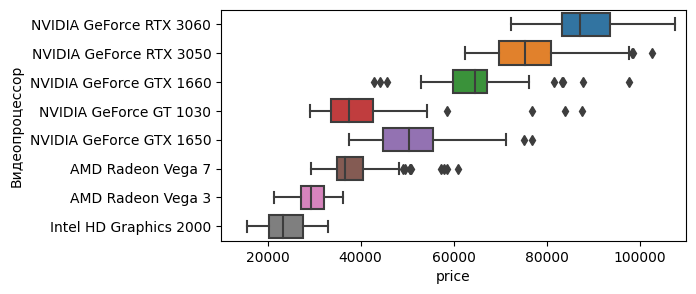

In [ ]:
f, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(x='price', y='Видеопроцессор', data=ds_typeProc_top_8)
plt.axis(xmin=10000, xmax=110000)
plt.show()

In [ ]:
new_ds.groupby('Видеопроцессор')['price'].describe().sort_values('count', ascending=False)[:8]

,count,mean,std,min,25%,50%,75%,max
Видеопроцессор,,,,,,,,
Intel HD Graphics 2000,81.0,23998.753086,4474.611320,15594.0,20265.0,23384.0,27551.00,32953.0
NVIDIA GeForce RTX 3050,78.0,76457.987179,9008.216031,62388.0,69681.0,75314.0,81055.00,102703.0
AMD Radeon Vega 7,75.0,38867.080000,6873.599953,29354.0,34873.0,36589.0,40444.00,60869.0
NVIDIA GeForce GTX 1650,64.0,51602.640625,8813.633271,37423.0,44927.5,50398.5,55625.00,76822.0
NVIDIA GeForce GT 1030,63.0,40857.857143,11504.165128,29200.0,33609.0,37616.0,42581.50,87566.0
NVIDIA GeForce RTX 3060,49.0,89388.897959,9055.980541,72443.0,83232.0,87141.0,93592.00,107521.0
NVIDIA GeForce GTX 1660,39.0,65091.230769,11231.174020,43000.0,59855.5,64632.0,67218.00,97679.0
AMD Radeon Vega 3,20.0,29460.950000,4136.656920,21355.0,27157.0,29345.5,32204.75,36185.0


**Выводы:**

#### *Выводы по связи признаков*:
1.   Наблюдается некоторая зависимость цены от видеопроцессора. Средние значения расположены в интервале от 23998,8 до 89388,9 руб., медианные от 23384,0 до 87141,0 руб.
2.  Диаграмма свидетельствует о широком разбросе цен практически по всем типам признака. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в интервале от 15594,0 до 107521,0 руб. при величинах стандартного отклонения в диапазоне от 4136,7 до 11504,2 руб.
3.  Основной вывод заключается в том, что компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут быть укомплектованы видеопроцессорами любого типа.

### Выводы по разделу
1.   Наблюдается некоторая зависимость цены от всех технических хаарктеристик компьютера. Об этом свидетельствуют средние и медианные значения признаков.
2.  На всех диаграммах признаков наблюдается широкий разброс цен. Согласно описательным статистикам интервал разброса от минимального значения цены до максимального находится в широких пределах при достаточно высоких величинах стандартных отклонений.
3.  Основной вывод заключается в том, что в целом компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут иметь различную комплектацию, т.е. включать элементы как с лучшими так и худшими техническими характеристиками, вне зависимости от конечной цены.

### 2.6 Кодирование отдельных признаков

In [ ]:
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 722
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           596 non-null    object
 1   price           596 non-null    int64 
 2   num_sales       596 non-null    int64 
 3   type_proc       596 non-null    object
 4   num_core        596 non-null    int64 
 5   type_memory     596 non-null    object
 6   vol_memory      596 non-null    int64 
 7   Диск HDD        596 non-null    object
 8   Диск SSD        596 non-null    object
 9   Видеопроцессор  596 non-null    object
dtypes: int64(4), object(6)
memory usage: 51.2+ KB


Имеются пропуски индекса. Необходимо сбросить индекс

In [ ]:
new_ds.reset_index(drop=True, inplace=True)

In [ ]:
new_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           596 non-null    object
 1   price           596 non-null    int64 
 2   num_sales       596 non-null    int64 
 3   type_proc       596 non-null    object
 4   num_core        596 non-null    int64 
 5   type_memory     596 non-null    object
 6   vol_memory      596 non-null    int64 
 7   Диск HDD        596 non-null    object
 8   Диск SSD        596 non-null    object
 9   Видеопроцессор  596 non-null    object
dtypes: int64(4), object(6)
memory usage: 46.7+ KB


С целью дальнейшего проведения статистического анализа необходимо отобрать признаки, наблюдения и привести порядковые величины к числовому значению. Согласно условия кейса, клиент занимается сборкой и последующей реализаций компьютеров, отсюда следует, что фокус исследования направлен на установление связи цены с техническими характеристиками. Учитывая вышеуказанное обстоятельство, из датасета подледит исключению признак title, поскольку он никаик не связан с техническими характеристиками компьютеров.

In [ ]:
new_ds.columns

Index(['title', 'price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор'],
      dtype='object')

In [ ]:
df = new_ds.copy()

In [ ]:
df[['price', 'num_sales', 'type_proc', 'num_core', 'type_memory', 'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор']].value_counts()[:5]

price  num_sales  type_proc      num_core  type_memory  vol_memory  Диск HDD  Диск SSD  Видеопроцессор         
74872  5          Intel Core i5  6         DDR 4        16          1000      480       NVIDIA GeForce RTX 3050    4
39436  5          Intel Core i3  4         DDR 4        8           0         480       NVIDIA GeForce GTX 1650    2
42217  5          Intel Core i3  4         DDR 4        8           0         480       NVIDIA GeForce GTX 1650    2
43190  5          AMD Athlon     2         DDR 4        16          0         480       NVIDIA GeForce GTX 1650    2
23169  5          AMD A6         2         DDR 4        16          0         240       AMD Radeon R5              2
dtype: int64

In [ ]:
df[:3]

,title,price,num_sales,type_proc,num_core,type_memory,vol_memory,Диск HDD,Диск SSD,Видеопроцессор
0,Офисный Компьютер Robotcomp Казначей V1,39237,10,Intel Core i5,6,DDR 4,8,0,480,Intel UHD Graphics 630
1,Игровой Компьютер Robotcomp M-16 V1,55625,40,Intel Core i5,6,DDR 4,16,0,480,NVIDIA GeForce GTX 1650
2,Игровой Компьютер Robotcomp F22 Raptor V1,48386,30,Intel Core i3,4,DDR 4,16,0,480,NVIDIA GeForce GTX 1650


#### *2.6.1 Процессор*

In [ ]:
df = df[['price', 'num_sales', 'type_proc', 'num_core', 'type_memory', 'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор']]

In [ ]:
proc_list = list(df['type_proc'].value_counts()[:5].index)

In [ ]:
df = df[df['type_proc'].isin(proc_list)]

In [ ]:
dict_proc = {'Intel Core i5':0, 'Intel Core i3':1, 'AMD Ryzen 5':2, 'Intel Core i7':3, 'AMD Athlon':4}
df['processor'] = df['type_proc'].apply(lambda x: dict_proc[x])

#### *2.6.2 Тип памяти*

С целью приведения к числовой порядковой величине необходимо выполнить кодирование признаков "DDR3", "DDR4". Так, значениям, связанным с признаком "DDR4" присваивается код 0, значениям, связанным с признаком "DDR3" присваивается код 1.

In [ ]:
df['type_memory'].value_counts()

DDR 4    424
DDR 3    103
Name: type_memory, dtype: int64

In [ ]:
dict_type_memory = {'DDR 4':0, 'DDR 3':1}

In [ ]:
df['type_memory'] = df['type_memory'].apply(lambda x: dict_type_memory[x])

In [ ]:
df['type_memory'].value_counts()

0    424
1    103
Name: type_memory, dtype: int64

#### *2.6.3 Видеопроцессор*

In [ ]:
videoproc_list = list(df['Видеопроцессор'].value_counts()[:8].index)
df = df[df['Видеопроцессор'].isin(videoproc_list)]

In [ ]:
df.shape

(454, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 1 to 593
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   price           454 non-null    int64 
 1   num_sales       454 non-null    int64 
 2   type_proc       454 non-null    object
 3   num_core        454 non-null    int64 
 4   type_memory     454 non-null    int64 
 5   vol_memory      454 non-null    int64 
 6   Диск HDD        454 non-null    object
 7   Диск SSD        454 non-null    object
 8   Видеопроцессор  454 non-null    object
 9   processor       454 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 39.0+ KB


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
dict_videoproc = {'NVIDIA GeForce RTX 3050':0, 'Intel HD Graphics 2000':1, 'AMD Radeon Vega 7':2,
                  'NVIDIA GeForce GT 1030':3, 'NVIDIA GeForce GTX 1650':4, 'NVIDIA GeForce RTX 3060':5,
                  'NVIDIA GeForce GTX 1660':6, 'AMD Radeon Vega 3':7}

In [ ]:
df['videoprocessor'] = df['Видеопроцессор'].apply(lambda x: dict_videoproc[x])

#### *2.6.4 Диск*

С целью приведения к числовой порядковой величине необходимо выполнить кодирование признаков "Диск HDD", "Диск SSD". Так, значениям, связанным с признаком "Диск HDD" присваивается код 0, значениям, связанным с признаком "Диск SSD" присваивается код 1, значениям, связанным и с признаком "Диск HDD"
 и с признаком "Диск SSD" (в том случае, когда у компьютера имеется 2 типа диска) присваивается код 2.

In [ ]:
index_list_HDD = df[(df['Диск HDD']!='0')&(df['Диск SSD']=='0')].index
index_list_SSD = df[(df['Диск HDD']=='0')&(df['Диск SSD']!='0')].index
index_list_ALL_DISC = df[(df['Диск HDD']!='0')&(df['Диск SSD']!='0')].index

In [ ]:
print(index_list_HDD.nunique(), '\t', index_list_SSD.nunique(), '\t', index_list_ALL_DISC.nunique())

22 	 321 	 111


In [ ]:
df.loc[index_list_HDD, ['disc']]=0

In [ ]:
df.loc[index_list_SSD, ['disc']]=1

In [ ]:
df.loc[index_list_ALL_DISC, ['disc']]=2

In [ ]:
df['disc'].unique()

array([1., 2., 0.])

In [ ]:
df['disc'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 454 entries, 0 to 453
Series name: disc
Non-Null Count  Dtype  
--------------  -----  
454 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


In [ ]:
df['disc'] = df['disc'].astype(int)

In [ ]:
df['disc'].value_counts()

1    321
2    111
0     22
Name: disc, dtype: int64

In [ ]:
df.columns

Index(['price', 'num_sales', 'type_proc', 'num_core', 'type_memory',
       'vol_memory', 'Диск HDD', 'Диск SSD', 'Видеопроцессор', 'processor',
       'videoprocessor', 'disc'],
      dtype='object')

In [ ]:
col = ['price', 'num_sales', 'processor', 'num_core', 'type_memory', 'vol_memory', 'disc', 'videoprocessor']
df = df[col]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.to_csv('df2.csv', index=False)

#### Выводы по разделу
1.  Осуществлен сброс индекса.
2.  С целью дальнейшего проведения статистического анализа отобраны признаки, наблюдения и порядковые величины приведены к числовому значению.
3.  Из датасета исключен признак title, поскольку он никаик не связан с техническими характеристиками компьютеров.
4.  С целью приведения к числовой порядковой величине выполнено кодирование признаков "Диск HDD", "Диск SSD".
5.  С целью приведения к числовой порядковой величине выполнено кодирование признаков "DDR3", "DDR4".


## 3. Часть 3. Выполнение неграфического и графического статистического анализа количественных, категориальных признаков, выполнение анализа взаимосвязи двух количественных признаков, двух категориальных признаков, количественного и категориального признаков.

Выполняется копирование датасета для проведения статистического анализа.

In [ ]:
dfs = df.copy()

Просмотр информации о датасете.

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           454 non-null    int64
 1   num_sales       454 non-null    int64
 2   processor       454 non-null    int64
 3   num_core        454 non-null    int64
 4   type_memory     454 non-null    int64
 5   vol_memory      454 non-null    int64
 6   disc            454 non-null    int64
 7   videoprocessor  454 non-null    int64
dtypes: int64(8)
memory usage: 28.5 KB


Просмотр уникальных значений признака.

In [ ]:
dfs['processor'].unique()


array([0, 1, 4, 2, 3])

Просмотр уникальных значений признака.

In [ ]:
dfs['num_core'].unique()

array([ 6,  4, 10,  2, 12,  8])

Просмотр уникальных значений признака.

In [ ]:
dfs['vol_memory'].unique()

array([16,  8, 32, 64,  4])

Просмотр уникальных значений признака.

In [ ]:
dfs['disc'].unique()

array([1, 2, 0])

Просмотр уникальных значений признака.

In [ ]:
dfs['videoprocessor'].unique()

array([4, 0, 6, 7, 2, 5, 3, 1])

Просмотр уникальных значений признака.

In [ ]:
dfs['type_memory'].unique()

array([0, 1])

### 3.1 Предварительная обработка

#### *3.1.1 Гистограммы*

<Axes: >

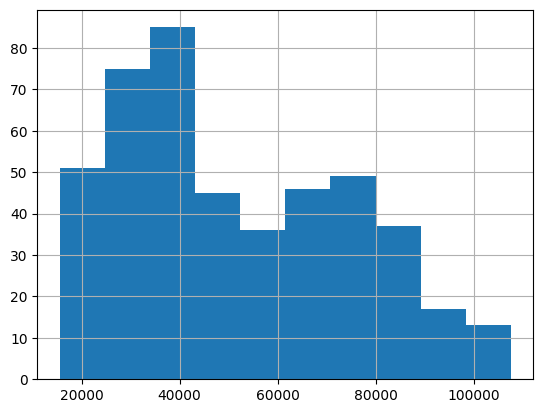

In [ ]:
dfs['price'].hist()

Увеличение количества интервалов до 20.

<Axes: >

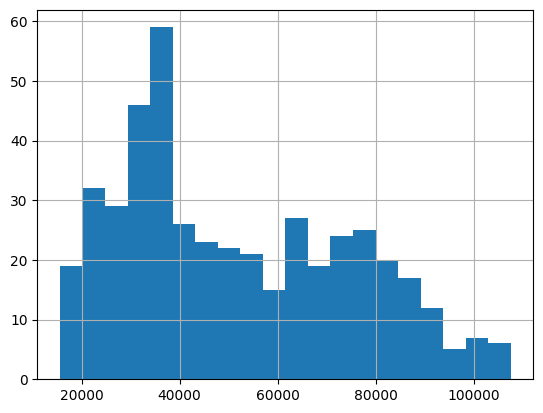

In [ ]:
dfs['price'].hist(bins=20)

<Axes: >

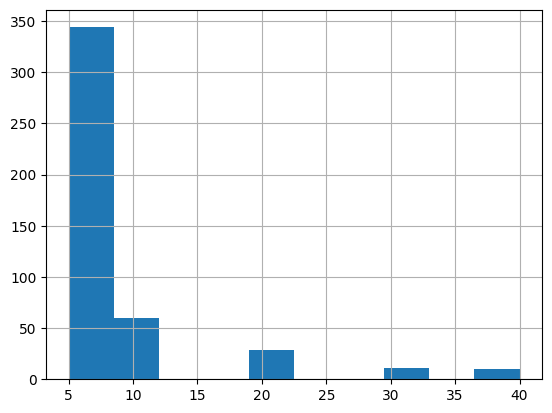

In [ ]:
dfs['num_sales'].hist()

<Axes: >

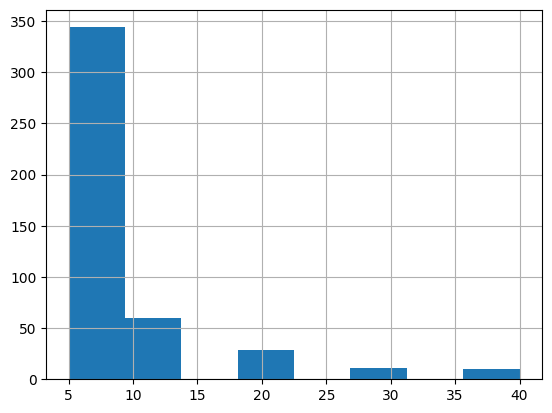

In [ ]:
dfs['num_sales'].hist(bins=8)

#### *3.1.2 Описательные статистики*

In [ ]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           454 non-null    int64
 1   num_sales       454 non-null    int64
 2   processor       454 non-null    int64
 3   num_core        454 non-null    int64
 4   type_memory     454 non-null    int64
 5   vol_memory      454 non-null    int64
 6   disc            454 non-null    int64
 7   videoprocessor  454 non-null    int64
dtypes: int64(8)
memory usage: 28.5 KB


In [ ]:
dfs[:2]

,price,num_sales,processor,num_core,type_memory,vol_memory,disc,videoprocessor
0,55625,40,0,6,0,16,1,4
1,48386,30,1,4,0,16,1,4


In [ ]:
dfs.describe()

,price,num_sales,processor,num_core,type_memory,vol_memory,disc,videoprocessor
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.00000,454.000000,454.000000
mean,51683.114537,7.995595,1.292952,5.550661,0.204846,17.54185,1.196035,2.722467
std,23138.061505,7.137253,1.239559,1.819889,0.404034,9.42224,0.505058,2.050699
min,15594.000000,5.000000,0.000000,2.000000,0.000000,4.00000,0.000000,0.000000
25%,33023.750000,5.000000,0.000000,4.000000,0.000000,16.00000,1.000000,1.000000
50%,46582.000000,5.000000,1.000000,6.000000,0.000000,16.00000,1.000000,2.000000
75%,71668.750000,5.000000,2.000000,6.000000,0.000000,16.00000,1.000000,4.000000
max,107521.000000,40.000000,4.000000,12.000000,1.000000,64.00000,2.000000,7.000000


In [ ]:
dfs[['price', 'num_sales']].describe()

,price,num_sales
count,454.000000,454.000000
mean,51683.114537,7.995595
std,23138.061505,7.137253
min,15594.000000,5.000000
25%,33023.750000,5.000000
50%,46582.000000,5.000000
75%,71668.750000,5.000000
max,107521.000000,40.000000


In [ ]:
dfs.value_counts()[:8]

price  num_sales  processor  num_core  type_memory  vol_memory  disc  videoprocessor
74872  5          0          6         0            16          2     0                 4
46852  5          1          4         0            16          1     4                 2
43190  5          4          2         0            16          1     4                 2
81162  5          0          6         0            32          1     0                 2
39436  5          1          4         0            8           1     4                 2
42217  5          1          4         0            8           1     4                 2
46632  5          1          4         0            8           1     4                 2
48300  5          2          6         0            16          2     2                 1
dtype: int64

In [ ]:
dfs['price'].value_counts()

74872    4
23279    3
20114    3
18608    2
        ..
43469    1
49989    1
39974    1
29200    1
Name: price, Length: 398, dtype: int64

In [ ]:
dfs['price'].describe()

count       454.000000
mean      51683.114537
std       23138.061505
min       15594.000000
25%       33023.750000
50%       46582.000000
75%       71668.750000
max      107521.000000
Name: price, dtype: float64

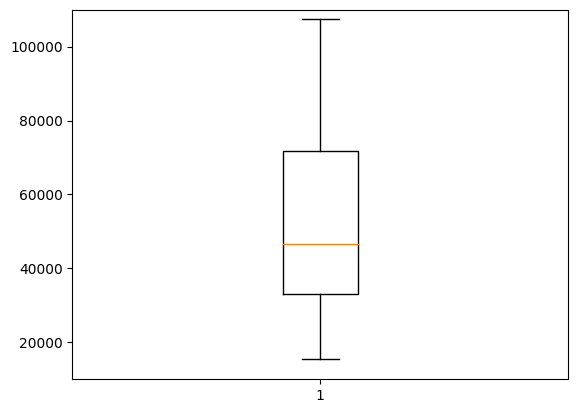

In [ ]:
plt.boxplot(dfs['price'])
plt.ylim((10000, 110000))
plt.show()

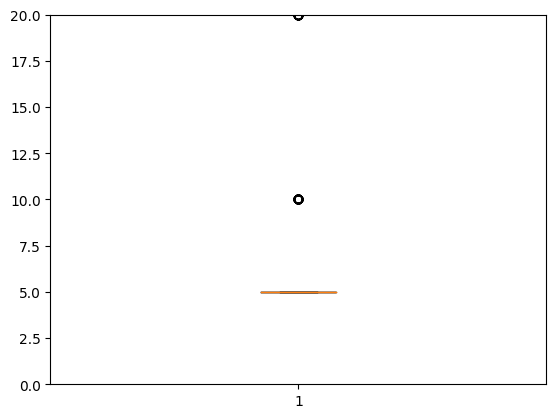

In [ ]:
plt.boxplot(dfs['num_sales'])
plt.ylim((0, 20))
plt.show()

In [ ]:
dfs[['price','num_sales']].mean() # среднее

price        51683.114537
num_sales        7.995595
dtype: float64

In [ ]:
dfs[['price','num_sales']].std()  # средне квадратическое отклонение

price        23138.061505
num_sales        7.137253
dtype: float64

In [ ]:
dfs[['price','num_sales']].skew() # коэффициент асимметрии

price        0.449923
num_sales    2.966434
dtype: float64

In [ ]:
dfs[['price','num_sales']].kurtosis() # коэффициент эксцесса

price       -0.927151
num_sales    8.791172
dtype: float64

#### *3.1.3 Проверка нормальности по критерию Шапиро-Уилка*

In [ ]:
stats.shapiro(dfs['price'])
#выборка противоречит нормальному закону распределения

ShapiroResult(statistic=0.9425963163375854, pvalue=3.034856871017566e-12)

In [ ]:
stats.shapiro(dfs['num_sales'])
#выборка противоречит нормальному закону распределения

ShapiroResult(statistic=0.47980356216430664, pvalue=2.7583904776443576e-34)

### Выводы по разделу.
1.  Датасет, подготовленный для проведения статистического анализа содержит 8 признаков и 454 наблюдений. Тип значений "int". Пропуски отсутствуют.
2.  В датасете имееется 2 количественных ("price", "num_sales"), 2  категориальных ("disc", "type_memory"), 4 порядковых признаков ("processor", "num_core", "vol_memory", "videoprocessor").
3.  Согласно гистограмме значения цены распределены по интервалу от 15000 до 110000 руб., наиболее часто встречаются значения в интервале от 30000 до 40000 руб. При этом структура распределения следующая: меньшие значения представлены большим числом наблюдений, а компьютеры, которые стоят дороже представлены меньшим количеством наблюдений.
4.  Согласно гистограмме значения количества продаж распределены по интервалу от 5 до 40 ед., наиболее часто встречаются значения в интервале от 5 до 10 ед. При этом структура распределения следующая: меньшие значения представлены большим числом наблюдений, а компьютеры, у которых количество продаж выше представлены меньшим количеством наблюдений.
5.  Описательные статистики по признакам выполнены в разделах 2.1-2.5. Отклонений от ранее полученных результатов по рассматриваемым признакам не имеется.
6.  Согласно коэффициентам эксцесса и ассиметрии рассмотренных признаков имеет место положительная левосторонная ассиметричность (положительные значения признаков) и плосковершинный эксцесс (отрицательное значение признака "price") набора признаков. Таким образом, вышеуказанные коэффициенты показывают отклонения от нормального закона Гауссовского распределения.
7.  Проверка гипотезы о нормальности по критерию Шапиро-Уилка (Шапиро-тест)свидетельствует, что выборки ("price", "num_sales") поротиворечат нормальному закону распределения (pvalue много меньше уровеня значимости - 0,05).


### 3.2 Анализ влияния категориальных признаков на количественный факторный целевой показатель "Цена". Критерии сравнения групп

Влияние на целевой показатель "Price" (цена компьютера)

#### *3.2.3 type_memory-price*

In [ ]:
dfs.groupby('type_memory')[['price']].mean()

,price
type_memory,
0,57874.085873
1,27651.494624


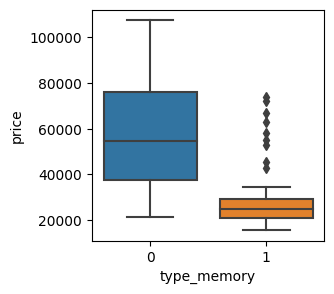

In [ ]:
f, ax = plt.subplots(figsize=(3, 3))
fig = sns.boxplot(x='type_memory', y='price', data=dfs)

Выполнение Шапиро-теста

In [ ]:
df_m0 = dfs[dfs['type_memory']==0]
df_m1 = dfs[dfs['type_memory']==1]
print(stats.shapiro(df_m0['price']))
print(stats.shapiro(df_m1['price']))

ShapiroResult(statistic=0.939200758934021, pvalue=5.3982016773312935e-11)
ShapiroResult(statistic=0.7114431858062744, pvalue=3.1580350313975547e-12)


In [ ]:
scipy.stats.mannwhitneyu(df_m0['price'],df_m1['price'])

MannwhitneyuResult(statistic=31368.0, pvalue=3.3196630171626616e-38)

pvalue=1.485538300426858e-38, т.е. много < 0,05, следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей являются статистически значимыми.

#### *Вывод по влиянию признаков*
1.  Проверка гипотезы о нормальности по критерию Шапиро-Уилка свидетельствует, что выборка не имеет нормального распределения. Соответственно, мы не попадаем в группу параметрических параметров и для выполнения дальнейших действий выполняем непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением критерия сравнения групп Манна-Уитни для двух независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue много меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей признаются статистически значимыми, т.е. установлено влияние категориального показателя "Тип памяти" ("type_memory") на факторный показатель "Цена" ("price").


#### *3.2.5 disc-price*

Связь показателей "disc" и "price"

In [ ]:
dfs.groupby('disc')[['price']].mean()

,price
disc,
0,22327.909091
1,51755.096573
2,57293.099099


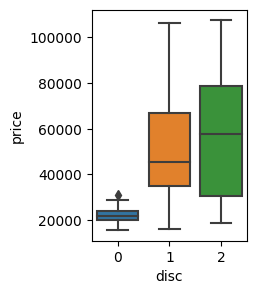

In [ ]:
f, ax = plt.subplots(figsize=(2, 3))
fig = sns.boxplot(x='disc', y='price', data=dfs)

Выполнение Шапиро-теста о проверке нормальности распределения совокупностей.

In [ ]:
df_d1 = np.array(dfs[dfs['disc']==0]['price'])
df_d2 = np.array(dfs[dfs['disc']==1]['price'])
df_d3 = np.array(dfs[dfs['disc']==2]['price'])

print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=0.9613533020019531, pvalue=0.5171144604682922)
ShapiroResult(statistic=0.9421278238296509, pvalue=6.930618856593185e-10)
ShapiroResult(statistic=0.9282298684120178, pvalue=1.5591107512591407e-05)


In [ ]:
#stats.f_oneway(df_d1,df_d2,df_d3) # One way ANOVA
stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)

KruskalResult(statistic=51.593064517983294, pvalue=6.2619325838755975e-12)

In [ ]:
df[:2]

,price,num_sales,processor,num_core,type_memory,vol_memory,disc,videoprocessor
0,55625,40,0,6,0,16,1,4
1,48386,30,1,4,0,16,1,4


#### *Вывод по влиянию признаков*
1.  Проверка гипотезы о нормальности по критерию Шапиро-Уилка свидетельствует, что выборка не имеет нормального распределения. Соответственно, для выполнения дальнейших действий необходимо выполнить непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением непараметрического критерия сравнения групп Краскала-Уолиса для трех независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue много меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей признаются статистически значимыми, т.е. установлено влияние категориального показателя "Диск" ("disc") на факторный показатель "Цена" ("price").

### Выводы по разделу.
1. Выполнена проверка гипотезы о нормальности по критерию Шапиро-Уилка (Шапиро-тест), которая свидетельствует, что выборки не имеют нормального распределения. Соответственно, для выполнения дальнейших действий выполнен непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением критерия сравнения групп Манна-Уитни для двух независимых совокупностей и Краскала-Уолиса для трех и более независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue и в том и другом случае много меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклонена и различия показателей признаны статистически значимыми, т.е. установлено влияние категориальных показателей "Тип памяти" и "Диск"("type_memory","disc") на факторный целевой показатель "Цена" ("price").

### 3.3 Влияние категориальных признаков на факторный показатель num_sales (количество продаж)

#### *3.3.3 type_memory-num_sales*

Расчет средних значений показателей.

In [ ]:
dfs.groupby('type_memory')[['num_sales']].mean()

,num_sales
type_memory,
0,8.407202
1,6.397849


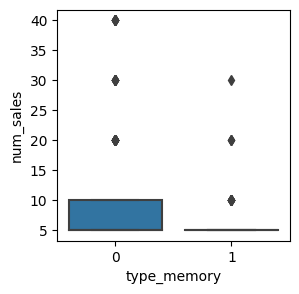

In [ ]:
f, ax = plt.subplots(figsize=(3, 3))
fig = sns.boxplot(x='type_memory', y='num_sales', data=dfs)

In [ ]:
df_m0 = dfs[dfs['type_memory']==0]
df_m1 = dfs[dfs['type_memory']==1]
print(stats.shapiro(df_m0['num_sales']))
print(stats.shapiro(df_m1['num_sales']))

ShapiroResult(statistic=0.5046644806861877, pvalue=1.6083728726594888e-30)
ShapiroResult(statistic=0.40424078702926636, pvalue=1.1842756410450273e-17)


Проверка гипотезы о нормальности по критерию Шапиро-Уилка свидетельствует, что выборка не имеет нормального распределения.

 Анализ влияния признаков выполнен с применением критерия сравнения групп Манна-Уитни для двух независимых совокупностей.

In [ ]:
scipy.stats.mannwhitneyu(df_m0['num_sales'],df_m1['num_sales'])

MannwhitneyuResult(statistic=18471.5, pvalue=0.046495674125244975)

pvalue=0.046495674125244975 < 0,05, следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей являются статистически значимыми.

#### *Вывод по влиянию признаков*
1.  Проверка гипотезы о нормальности по критерию Шапиро-Уилка свидетельствует, что выборка не имеет нормального распределения. Соответственно, мы не попадаем в группу параметрическмх параметров и для выполнения дальнейших действий выполняем непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением критерия сравнения групп Манна-Уитни для двух независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue хоть и не на много, но меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей признаются статистически значимыми, т.е. установлено незначительное влияние категориального показателя "Тип памяти" ("type_memory") на факторный показатель "Количество продаж" ("num_sales").


#### *3.3.5 disc-num_sales*

Анализ связи показателей "disc" и "num_sales"

Расчет средних значений показателей.

In [ ]:
dfs.groupby('disc')[['num_sales']].mean()

,num_sales
disc,
0,8.863636
1,8.380062
2,6.711712


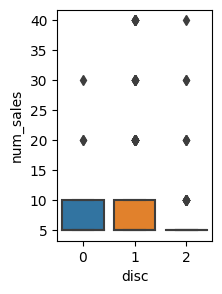

In [ ]:
f, ax = plt.subplots(figsize=(2, 3))
fig = sns.boxplot(x='disc', y='num_sales', data=dfs)

Проверка нормальности распределения по Шапиро-тесту.

In [ ]:
df_d1 = np.array(dfs[dfs['disc']==0]['num_sales'])
df_d2 = np.array(dfs[dfs['disc']==1]['num_sales'])
df_d3 = np.array(dfs[dfs['disc']==2]['num_sales'])

print(stats.shapiro(df_d1))
print(stats.shapiro(df_d2))
print(stats.shapiro(df_d3))

ShapiroResult(statistic=0.6459469199180603, pvalue=4.3252694013062865e-06)
ShapiroResult(statistic=0.5031086802482605, pvalue=4.9816594451802954e-29)
ShapiroResult(statistic=0.364452064037323, pvalue=8.541299630395492e-20)


Анализ влияния признаков выполняется с применением непараметрического критерия сравнения групп Краскала-Уолиса для трех независимых совокупностей.

In [ ]:
#stats.f_oneway(df_d1,df_d2,df_d3) # One way ANOVA
stats.mstats.kruskalwallis(df_d1, df_d2, df_d3)

KruskalResult(statistic=7.554515893466771, pvalue=0.022885358339411355)

In [ ]:
df[:2]

,price,num_sales,processor,num_core,type_memory,vol_memory,disc,videoprocessor
0,55625,40,0,6,0,16,1,4
1,48386,30,1,4,0,16,1,4


#### *Вывод по влиянию признаков*
1.  Проверка гипотезы о нормальности по критерию Шапиро-Уилка свидетельствует, что выборка не имеет нормального распределения. Соответственно, для выполнения дальнейших действий необходимо выполнить непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением непараметрического критерия сравнения групп Краскала-Уолиса для трех независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклоняется и различия показателей признаются статистически значимыми, т.е. установлено влияние категориального показателя "Диск" ("disc") на факторный показатель "Количество продаж" ("num_sales").

### Выводы по разделу.
1. Выполнена проверка гипотезы о нормальности по критерию Шапиро-Уилка (Шапиро-тест), которая свидетельствует, что выборки не имеют нормального распределения. Соответственно, для выполнения дальнейших действий выполнен непараметрический анализ.
2.  Анализ влияния признаков выполнен с применением критерия сравнения групп Манна-Уитни для двух независимых совокупностей и Краскала-Уолиса для трех и более независимых совокупностей.
3.  В результате выполненых расчетов установлено, что pvalue и в том и другом случае много меньше уровня значимости (0,05), следовательно, нулевая гипотеза о равенстве отклонена и различия показателей признаны статистически значимыми, т.е. установлено влияние категориальных показателей ("type_memory", "disc") на факторный показатель "Количество продаж" ("num_sales").

### 3.4 Корреляционный анализ

#### *3.4.1 Анализ связи количественных и порядковых признаков*

**Построение визуализации и вычисление коэффициентов корреляции**

Визуализация связи двух количественных показателей.

<Axes: xlabel='num_sales', ylabel='price'>

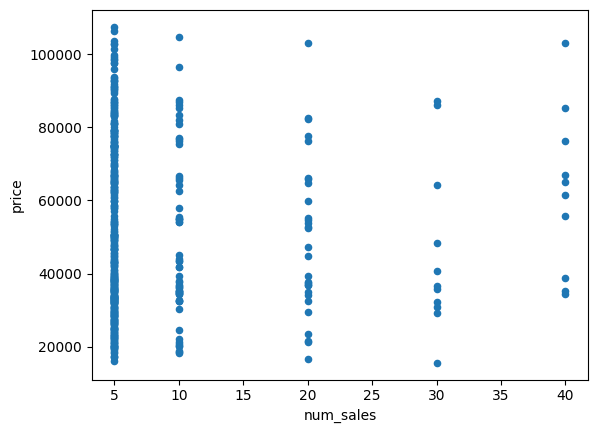

In [ ]:
dfs.plot("num_sales",'price',kind="scatter")

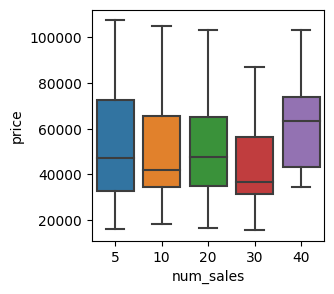

In [ ]:
f, ax = plt.subplots(figsize=(3, 3))
fig = sns.boxplot(x='num_sales', y='price', data=dfs)

In [ ]:
dfs[['price', 'num_sales', 'processor', 'num_core', 'vol_memory', 'videoprocessor']].corr(method='spearman') # ранговая корреляция Спирмена

,price,num_sales,processor,num_core,vol_memory,videoprocessor
price,1.000000,-0.017848,-0.327616,0.400327,0.457358,0.168868
num_sales,-0.017848,1.000000,0.010488,0.030995,0.022203,0.073010
processor,-0.327616,0.010488,1.000000,0.031868,-0.016261,0.032041
num_core,0.400327,0.030995,0.031868,1.000000,0.339092,-0.211606
vol_memory,0.457358,0.022203,-0.016261,0.339092,1.000000,-0.004824
videoprocessor,0.168868,0.073010,0.032041,-0.211606,-0.004824,1.000000


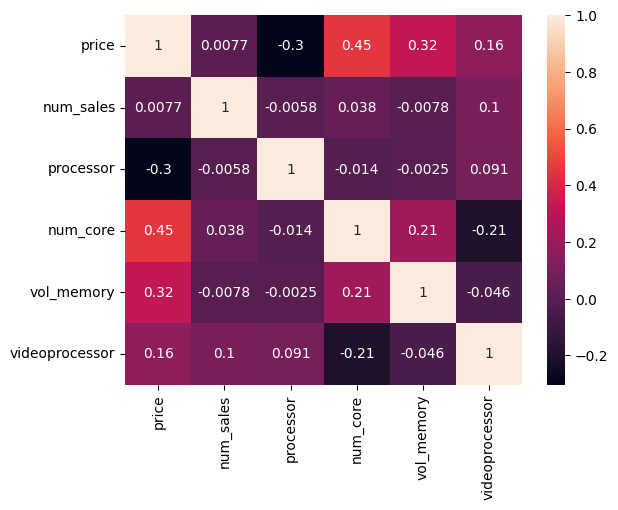

In [ ]:
num = ['price', 'num_sales', 'processor', 'num_core', 'vol_memory', 'videoprocessor']
hm = sns.heatmap(df[num].corr(),annot=True)

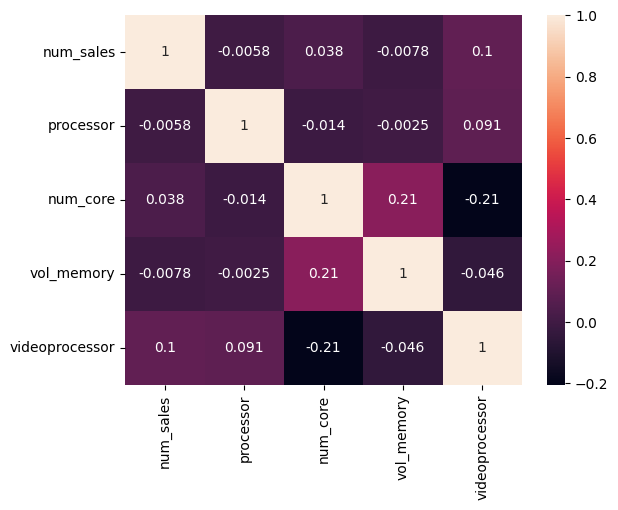

In [ ]:
num = ['num_sales', 'processor', 'num_core', 'vol_memory', 'videoprocessor']
hm = sns.heatmap(df[num].corr(),annot=True)

***Проверка гипотез о значимости найденных коэффициентов корреляции***

Проверяется гипотеза о том, что теоретическое значение оцениваемого корреляционного коэффициента (Пирсона или Спирмена) равно нулю.

Вычисляется значение соответствующего корреляционного коэффициента (количественные признаки - коэффициент Пирсона, порядковые - Спирмена) и проверяется по Стъюденту равенство его нулю при нахождении связи между ценой и количеством продаж.

In [ ]:
scipy.stats.pearsonr(dfs.price, dfs.num_sales)

PearsonRResult(statistic=0.00766693917670709, pvalue=0.8705864415890182)

При pvalue=0.8705864415890182, т.е. pvalue > 0,05, поэтому гипотеза о незначимости коэффициента не отклоняется. Значение связи показателей статистически незначимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между ценой и типом процессора.

In [ ]:
scipy.stats.spearmanr(dfs.price, dfs.processor)

SignificanceResult(statistic=-0.32761606713254926, pvalue=8.073168925623672e-13)

При pvalue=8.073168925623672e-13, т.е. pvalue < 0,05 гипотеза о незначимости отклоняется. Значение связи показателей статистически значимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между ценой и количеством ядер процессора.

In [ ]:
scipy.stats.spearmanr(dfs.price, dfs.num_core)

SignificanceResult(statistic=0.40032686138145185, pvalue=6.658668034364642e-19)

При pvalue=6.658668034364642e-19, т.е. pvalue < 0,05 гипотеза о незначимости отклоняется. Значение связи показателей статистически значимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между ценой и объемом памяти.

In [ ]:
scipy.stats.spearmanr(dfs.price, dfs.vol_memory)

SignificanceResult(statistic=0.45735832317750874, pvalue=7.521329876919732e-25)

При pvalue=7.521329876919732e-25, т.е. pvalue < 0,05 гипотеза о незначимости отклоняется. Значение связи показателей статистически значимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между ценой и типом видеопроцессора.

In [ ]:
scipy.stats.spearmanr(dfs.price, dfs.videoprocessor)

SignificanceResult(statistic=0.1688678674317814, pvalue=0.0003012959688553748)

При pvalue=0.0003012959688553748, т.е. pvalue < 0,05 гипотеза о незначимости отклоняется. Значение связи показателей статистически значимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между количеством продаж и типом процессора.

In [ ]:
scipy.stats.spearmanr(dfs.num_sales, dfs.processor)

SignificanceResult(statistic=0.010488086006556329, pvalue=0.8236424437923676)

При pvalue=0.8236424437923676, т.е. pvalue > 0,05 гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между количеством продаж и количеством ядер процессора.

In [ ]:
scipy.stats.spearmanr(dfs.num_sales, dfs.num_core)

SignificanceResult(statistic=0.030995420224184153, pvalue=0.5100463044191188)

При pvalue=0.5100463044191188, т.е. pvalue > 0,05 гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между количеством продаж и объемом оперативной памяти.

In [ ]:
scipy.stats.spearmanr(dfs.num_sales, dfs.vol_memory)

SignificanceResult(statistic=0.022202513427384257, pvalue=0.6370487999983178)

При pvalue=0.6370487999983178, т.е. pvalue > 0,05 гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.

Вычисляется значение соответствующего корреляционного коэффициента и проверяется равенство его нулю при нахождении связи между количеством продаж и типом видеопроцессора.

In [ ]:
scipy.stats.spearmanr(dfs.num_sales, dfs.videoprocessor)

SignificanceResult(statistic=0.07300972165968905, pvalue=0.12032201621125511)

При pvalue=0.12032201621125511, т.е. pvalue > 0,05 гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.



При расчете статистики Спирмена по показателю "num_sales" pvalue > 0,05 получается во всех случаях, т.е.  гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.

#### *Вывод о связи признаков*
1.  Осуществлена проверка гипотезы о том, что теоретическое значение оцениваемого корреляционного коэффициента (Пирсона или Спирмена) равно нулю.
2.  Вычислены значения соответствующего корреляционного коэффициента.
3.  Корреляционным анализом установлено следующее.
<br> -Связь между ценой и количеством продаж положительная, незначительная (0,0077)
<br> -Связь между ценой и типом процессора отрицательная, весомая (-0,3)
<br> -Связь между ценой и количеством ядер процессора положительная, весомая (0,45)
<br> -Связь между ценой и объемом оперативной памяти положительная, весомая (0,32)
<br> -Связь между ценой и видеопроцессором положительная, весомая (0,16)
4.  Имеют место парные зависимости анализируемых порядковых признаков и количественного факторного признака.
5.  При расчете статистики Спирмена по показателю "price" во всех случаях получается pvalue < 0,05, т.е. гипотеза о незначимости отклоняется. Значение связи показателей статистически значимо.
6. При расчете статистики Спирмена по показателю "num_sales" во всех случаях получается pvalue > 0,05, т.е. гипотеза о незначимости не отклоняется. Значение связи показателей статистически незначимо.

#### 3.4.2 Анализ связи категориальных признаков

disc-type_memory

Построение таблицы сопряженности признаков (crosstab), с тем чтобы сравнить частоты и пропорции (доли) и затем установить наличие связи признаков. Если пропорции признаков примерно одинаковы, то признаки не зависят друг от друга. Если доли не одинаковы, то признаки имеют связь. Для проверки наличия связи применяется критерий "хи-квадрат" с условием, что все частоты > 5.

In [ ]:
DM=pd.crosstab(dfs['disc'],dfs['type_memory']); DM

type_memory,0,1
disc,,
0,0,22
1,286,35
2,75,36


В датасете отсутствуют наблюдения (компьютеры) с признаками наличия "Диска HDD" и типом памяти "DDR4". С целью применения критерия "хи-квадрат" выполним корректировку таблицы сопряженности исключив значения, несоответствующие условию применения критерия (< 5).

In [ ]:
dd = dfs[dfs['disc']!=0]['disc']
DM=pd.crosstab(dd, dfs['type_memory']); DM

type_memory,0,1
disc,,
1,286,35
2,75,36


Визуализация таблицы сопряженности признаков.

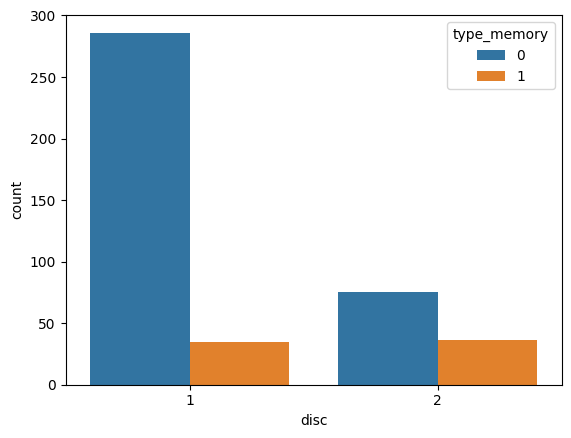

In [ ]:
sns.countplot(x=dd, hue=dfs['type_memory']);

In [ ]:
chi2, prob, f, expected = scipy.stats.chi2_contingency(DM)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"

print(output.format(chi2, f, prob))

test Statistics: 26.28969093877059
degrees of freedom: 1
p-value: 2.938530521848211e-07



p-value: 2.938530521848211e-07 < 0,05 в таком случае имеется основание отклонить нулевую гипотезу о том, что частоты примерно равны и, следует вывод о том, что связь между этими показателями существует. Пропорция между типами дисков и памяти компьютеров неодинакова.

#### *Вывод о связи признаков*
1.  Осуществлено построение таблицы сопряженности признаков (crosstab), с тем чтобы сравнить частоты и пропорции (доли) и установить связи признаков. Для проверки наличия связи применялся критерий "хи-квадрат" с условием, что все частоты > 5.
2.  Получено p-value ниже уровня значимости, следовательно, имеется основание отклонить нулевую гипотезу о том, что частоты примерно равны и, следует вывод о том, что связь между этими показателями существует. Пропорция между типами дисков и памяти компьютеров неодинакова.




### Выводы по разделу.
1.  Вычислены значения соответствующих корреляционных коэффициентов.
2.  Корреляционным анализом установлено следующее.
<br> -Связь между ценой и количеством продаж положительная, незначительная
<br> -Связь между ценой и типом процессора отрицательная, весомая
<br> -Связь между ценой и количеством ядер процессора положительная, весомая
<br> -Связь между ценой и объемом оперативной памяти положительная, весомая
<br> -Связь между ценой и видеопроцессором положительная, весомая
3.  Имеют место парные зависимости анализируемых порядковых признаков и количественного факторного признака.
4.  Получено p-value ниже уровня значимости, следовательно, имеется основание отклонить нулевую гипотезу о том, что частоты примерно равны и, следует вывод о том, что связь между показателями "Тип диска"("disc") (HDD и SSD) и "Тип памяти" ("type_memory")(DDR3 и DDR4) существует. Пропорция между типами дисков и памяти компьютеров неодинакова.

### Итоговый вывод  по кейсу.

1.  Для целей исследования представлены данные по продажам компьютеров на ведущих интернет площадках. Вышеуказанный датасет содержит 4500 наблюдений по 16 признакам.
2.  После предварительной подготовки данных на этапах очистки и разведочного анализа для целей исследования сформирован датасет, данные которого приведены к метрической и неметрической шкалам, отдельные признаки кодифицированы.
Таким образом, к началу проведения статистического анализа датасет содержит 454 наблюдений и 8 признаков, из которых 2 количественных признака, 2 категориальных и 4 порядковых.
3.  В ходе выполнения кейса выполнены неграфический и графический статистический анализ взаимосвязи количественных, порядковых и категориальных признаков, а также их влияние на факторный целевой количественный показатель "Цена".
4.  Исследование проведено с применением инструментов языка программирования Python, с подключением и иcпользованием библиотек numpy, pandas, scipy.
5.  В ходе исследования ко всем наборам значений применены методы описатальных статистик, проверки нормальности данных по критерию Шапиро-Уилка, вместе с тем, для выполнения анализа влияния категориальных признаков на количественные показатели применен метод сравнения групп, для анализа связи количественных и порядковых признаков, а также анализа категориальных признаков между собой, применен корреляционный анализ.
6.  На всех этапах исследования применялись методы графической визуализации с применением соответствующих методов библиотек matplotlib, seaborn.
7.  Анализ взаимного влияния показателей между собой и на факторный целевой показатель проводился методом постановки и проверки статистических гипотез.
<br>В результате выполненных расчетов влияния категориальных признаков на факторный целевой показатель, нулевая гипотеза о равенстве отклонена и различия показателей "Тип памяти", "Диск" признаны статистически значимыми, т.е. установлено влияние категориальных показателей ("type_memory", "disc") на факторный целевой показатель "Цена" ("price").
<br>Корреляционным анализом  связи количественных и порядковых признаков, а также категориальных признаков между собой установлено следующее.
<br> -Связь между ценой и количеством продаж положительная, незначительная
<br> -Связь между ценой и типом процессора отрицательная, весомая
<br> -Связь между ценой и количеством ядер процессора положительная, весомая
<br> -Связь между ценой и объемом оперативной памяти положительная, весомая
<br> -Связь между ценой и видеопроцессором положительная, весомая
<br>Имеют место парные зависимости анализируемых порядковых признаков и количественного факторного признака. Получено p-value ниже уровня значимости, следовательно, нулевая гипотеза о том, что частоты примерно равны - отклонена, и, следует вывод о том, что связь между показателями "Тип диска"("disc") (HDD и SSD) и "Тип памяти" ("type_memory")(DDR3 и DDR4) существует. Пропорция между типами дисков и памяти компьютеров неодинакова.
<br>При расчете статистики Спирмена по показателю "Количество продаж" ("num_sales") во всех случаях получается pvalue > 0,05, т.е. гипотеза о незначимости не отклоняется. Значение связи порядковых показателей статистически незначимо.
8.  Основой вывод исследования влияния технических характеристик компьютеров на цену и их популярность сводится к следующему. Среди имеющихся технических характеристик: наименование процессора, количество ядер, объем оперативной памяти, тип жесткого диска, объем жеского диска, тип памяти, видеопроцессор, не имеют связи с количеством продаж, т.е. не оказывают никакого влияния на популярность и, и как следствие объем реализации компьютеров. Между тем, цена компьютера, напротив, связана с техническими характеристиками компьютеров и  наиболее чувствительна к таким как: количество ядер процессора, объем оперативной памяти, тип диска и тип видеопроцессора. Согласно результатам полученного анализа наиболее устойчивые продажи компьютеров находятся в ценовом диапазоне от 23169 до 74872 руб., а в пятерку лидеров по продажам входят компьютеры с такими наиболее часто встречающимися техническими характеристиками: тип процессора: 'Intel Core i5', 'Intel Core i3', 'AMD Ryzen 5', 'Intel Core i7', 'AMD Athlon', с количеством ядер от 2 до 6, тип памяти DDR4, объем оперативной памяти от 8 до 16 ГБ, преимущественно с жестким диском SSD, объемом дискового пространства от 240 до 480 ГБ, видеопроцессорами: 'AMD Radeon Vega 7', 'NVIDIA GeForce RTX 3050', 'NVIDIA GeForce GT 1030', 'Intel HD Graphics 2000', 'NVIDIA GeForce RTX 3060'.
<br>Вместе с тем, на основании результатов, полученных в разделе 2.5, следует добавить, что в целом компьютеры любой ценовой категории (как с низкой так и высокой стоимостью) могут иметь различную комплектацию, т.е. включать элементы как с лучшими так и худшими техническими характеристиками, вне зависимости от конечной цены.
9.  Следует отметить, что наличие связи показателей, полученной в настоящем исследовании с применением методов проверки статистических гипотез, не является причино-следственной связью между ценой компьютера и его характеристиками. На цену компьютеров в значительной степени оказывают влияние маркетинговые факторы, такие как ценовая политика продавцов, объем продаж конкретного продавца, а также продаваемый бренд, место реализации,  дата сборки, период продажи, цены на комплектующие и изначальная комплектация производителя, на которую покупатель не в силах повлиять и т.д. Таким образом, множество информационных данных для того, чтобы сделать корректный вывод о влиянии тех или иных технических характеристик на цену продаваемого компьютера, на момент исследования не принята во внимание по причине их отсутствия.



